# Project Five
# Game of Thrones - Season Comparisons

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Importing Seasons

In [3]:
season_one = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_one.pkl')

In [4]:
season_five = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_five.pkl')

In [5]:
season_six = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_six.pkl')

In [6]:
season_seven = pd.read_pickle('/Users/zoemarkovits/Metis/project_five_got/PKLs/season_seven.pkl')

## Sentiment Analysis Function

In [7]:
def sentiment_analysis(x):
    blob = TextBlob(x).sentiment
    return blob   

In [8]:
def sentiment_runavg(data, runavg=10, color_pos='yellow', color_neg='red'):
    y = np.array(data)    
    
    y_runavg = np.convolve(y, np.ones((runavg,))/runavg, mode='valid')
    x = np.array(range(0, len(y_runavg)))
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x, y_runavg);
    d = np.zeros(len(y_runavg))
    ax.fill_between(x, y_runavg, where=y_runavg >= d, interpolate=True, color=color_pos)
    ax.fill_between(x, y_runavg, where=y_runavg <= d, interpolate=True, color=color_neg)
    plt.xlim(0, x.max())
    

### Sentiment by Season

In [9]:
season_one.columns = range(len(season_one.columns))

season_one_sentiment = pd.DataFrame()

In [10]:
for i in range(len(season_one.columns)):
    season_one_sentiment['sentiment' + str(i) ] = season_one[i].apply(sentiment_analysis)
    
season_one_sentiment.head()    

,sentiment0,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,sentiment11,sentiment12,sentiment13,sentiment14,sentiment15,sentiment16,sentiment17,sentiment18,sentiment19,sentiment20,sentiment21,sentiment22,sentiment23,sentiment24,sentiment25,sentiment26,sentiment27,sentiment28,sentiment29,sentiment30,sentiment31,sentiment32,sentiment33,sentiment34,sentiment35,sentiment36,sentiment37,sentiment38,sentiment39,sentiment40,sentiment41,sentiment42,sentiment43,sentiment44,sentiment45,sentiment46,sentiment47,sentiment48,sentiment49,sentiment50,sentiment51,sentiment52,sentiment53,sentiment54,sentiment55,sentiment56,sentiment57,sentiment58,sentiment59,sentiment60,sentiment61,sentiment62,sentiment63,sentiment64,sentiment65,sentiment66,sentiment67,sentiment68,sentiment69,sentiment70,sentiment71,sentiment72,sentiment73,sentiment74,...,sentiment270,sentiment271,sentiment272,sentiment273,sentiment274,sentiment275,sentiment276,sentiment277,sentiment278,sentiment279,sentiment280,sentiment281,sentiment282,sentiment283,sentiment284,sentiment285,sentiment286,sentiment287,sentiment288,sentiment289,sentiment290,sentiment291,sentiment292,sentiment293,sentiment294,sentiment295,sentiment296,sentiment297,sentiment298,sentiment299,sentiment300,sentiment301,sentiment302,sentiment303,sentiment304,sentiment305,sentiment306,sentiment307,sentiment308,sentiment309,sentiment310,sentiment311,sentiment312,sentiment313,sentiment314,sentiment315,sentiment316,sentiment317,sentiment318,sentiment319,sentiment320,sentiment321,sentiment322,sentiment323,sentiment324,sentiment325,sentiment326,sentiment327,sentiment328,sentiment329,sentiment330,sentiment331,sentiment332,sentiment333,sentiment334,sentiment335,sentiment336,sentiment337,sentiment338,sentiment339,sentiment340,sentiment341,sentiment342,sentiment343,sentiment344
Arya Stark,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.35, 0.65)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(-0.8, 0.9)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
Assassin,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0

In [11]:
season_one_sentiment.shape

(115, 345)

In [12]:
season_five.columns = range(len(season_five.columns))

season_five_sentiment = pd.DataFrame()

In [13]:
for i in range(len(season_five.columns)):
    season_five_sentiment['sentiment' + str(i) ] = season_five[i].apply(sentiment_analysis)
    
season_five_sentiment.head()    

,sentiment0,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,sentiment11,sentiment12,sentiment13,sentiment14,sentiment15,sentiment16,sentiment17,sentiment18,sentiment19,sentiment20,sentiment21,sentiment22,sentiment23,sentiment24,sentiment25,sentiment26,sentiment27,sentiment28,sentiment29,sentiment30,sentiment31,sentiment32,sentiment33,sentiment34,sentiment35,sentiment36,sentiment37,sentiment38,sentiment39,sentiment40,sentiment41,sentiment42,sentiment43,sentiment44,sentiment45,sentiment46,sentiment47,sentiment48,sentiment49,sentiment50,sentiment51,sentiment52,sentiment53,sentiment54,sentiment55,sentiment56,sentiment57,sentiment58,sentiment59,sentiment60,sentiment61,sentiment62,sentiment63,sentiment64,sentiment65,sentiment66,sentiment67,sentiment68,sentiment69,sentiment70,sentiment71,sentiment72,sentiment73,sentiment74,...,sentiment160,sentiment161,sentiment162,sentiment163,sentiment164,sentiment165,sentiment166,sentiment167,sentiment168,sentiment169,sentiment170,sentiment171,sentiment172,sentiment173,sentiment174,sentiment175,sentiment176,sentiment177,sentiment178,sentiment179,sentiment180,sentiment181,sentiment182,sentiment183,sentiment184,sentiment185,sentiment186,sentiment187,sentiment188,sentiment189,sentiment190,sentiment191,sentiment192,sentiment193,sentiment194,sentiment195,sentiment196,sentiment197,sentiment198,sentiment199,sentiment200,sentiment201,sentiment202,sentiment203,sentiment204,sentiment205,sentiment206,sentiment207,sentiment208,sentiment209,sentiment210,sentiment211,sentiment212,sentiment213,sentiment214,sentiment215,sentiment216,sentiment217,sentiment218,sentiment219,sentiment220,sentiment221,sentiment222,sentiment223,sentiment224,sentiment225,sentiment226,sentiment227,sentiment228,sentiment229,sentiment230,sentiment231,sentiment232,sentiment233,sentiment234
Aemon,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
Alliser,"(-0.2, 0.4)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0

In [14]:
season_six.columns = range(len(season_six.columns))

season_six_sentiment = pd.DataFrame()

In [15]:
for i in range(len(season_six.columns)):
    season_six_sentiment['sentiment' + str(i) ] = season_six[i].apply(sentiment_analysis)
    
season_six_sentiment.head()    

,sentiment0,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,sentiment11,sentiment12,sentiment13,sentiment14,sentiment15,sentiment16,sentiment17,sentiment18,sentiment19,sentiment20,sentiment21,sentiment22,sentiment23,sentiment24,sentiment25,sentiment26,sentiment27,sentiment28,sentiment29,sentiment30,sentiment31,sentiment32,sentiment33,sentiment34,sentiment35,sentiment36,sentiment37,sentiment38,sentiment39,sentiment40,sentiment41,sentiment42,sentiment43,sentiment44,sentiment45,sentiment46,sentiment47,sentiment48,sentiment49,sentiment50,sentiment51,sentiment52,sentiment53,sentiment54,sentiment55,sentiment56,sentiment57,sentiment58,sentiment59,sentiment60,sentiment61,sentiment62,sentiment63,sentiment64,sentiment65,sentiment66,sentiment67,sentiment68,sentiment69,sentiment70,sentiment71,sentiment72,sentiment73,sentiment74,...,sentiment129,sentiment130,sentiment131,sentiment132,sentiment133,sentiment134,sentiment135,sentiment136,sentiment137,sentiment138,sentiment139,sentiment140,sentiment141,sentiment142,sentiment143,sentiment144,sentiment145,sentiment146,sentiment147,sentiment148,sentiment149,sentiment150,sentiment151,sentiment152,sentiment153,sentiment154,sentiment155,sentiment156,sentiment157,sentiment158,sentiment159,sentiment160,sentiment161,sentiment162,sentiment163,sentiment164,sentiment165,sentiment166,sentiment167,sentiment168,sentiment169,sentiment170,sentiment171,sentiment172,sentiment173,sentiment174,sentiment175,sentiment176,sentiment177,sentiment178,sentiment179,sentiment180,sentiment181,sentiment182,sentiment183,sentiment184,sentiment185,sentiment186,sentiment187,sentiment188,sentiment189,sentiment190,sentiment191,sentiment192,sentiment193,sentiment194,sentiment195,sentiment196,sentiment197,sentiment198,sentiment199,sentiment200,sentiment201,sentiment202,sentiment203
Aeron,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
Aeron,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0

In [16]:
season_seven.columns = range(len(season_seven.columns))

season_seven_sentiment = pd.DataFrame()

In [17]:
for i in range(len(season_seven.columns)):
    season_seven_sentiment['sentiment' + str(i) ] = season_seven[i].apply(sentiment_analysis)
    
season_seven_sentiment.head()    

,sentiment0,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,sentiment11,sentiment12,sentiment13,sentiment14,sentiment15,sentiment16,sentiment17,sentiment18,sentiment19,sentiment20,sentiment21,sentiment22,sentiment23,sentiment24,sentiment25,sentiment26,sentiment27,sentiment28,sentiment29,sentiment30,sentiment31,sentiment32,sentiment33,sentiment34,sentiment35,sentiment36,sentiment37,sentiment38,sentiment39,sentiment40,sentiment41,sentiment42,sentiment43,sentiment44,sentiment45,sentiment46,sentiment47,sentiment48,sentiment49,sentiment50,sentiment51,sentiment52,sentiment53,sentiment54,sentiment55,sentiment56,sentiment57,sentiment58,sentiment59,sentiment60,sentiment61,sentiment62,sentiment63,sentiment64,sentiment65,sentiment66,sentiment67,sentiment68,sentiment69,sentiment70,sentiment71,sentiment72,sentiment73,sentiment74,...,sentiment159,sentiment160,sentiment161,sentiment162,sentiment163,sentiment164,sentiment165,sentiment166,sentiment167,sentiment168,sentiment169,sentiment170,sentiment171,sentiment172,sentiment173,sentiment174,sentiment175,sentiment176,sentiment177,sentiment178,sentiment179,sentiment180,sentiment181,sentiment182,sentiment183,sentiment184,sentiment185,sentiment186,sentiment187,sentiment188,sentiment189,sentiment190,sentiment191,sentiment192,sentiment193,sentiment194,sentiment195,sentiment196,sentiment197,sentiment198,sentiment199,sentiment200,sentiment201,sentiment202,sentiment203,sentiment204,sentiment205,sentiment206,sentiment207,sentiment208,sentiment209,sentiment210,sentiment211,sentiment212,sentiment213,sentiment214,sentiment215,sentiment216,sentiment217,sentiment218,sentiment219,sentiment220,sentiment221,sentiment222,sentiment223,sentiment224,sentiment225,sentiment226,sentiment227,sentiment228,sentiment229,sentiment230,sentiment231,sentiment232,sentiment233
All,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
Arya,"(0.0, 0.0)","(0.25, 1.0)","(0.0, 0.0)","(0.0, 0.0)","(-0.7, 0.666666666667)","(0.0, 0.0)","(0.0, 0.0)","(-0.05, 0.4)","(0.0, 0.0)","(0.0, 0.0)","(0.7, 0.6)","(0.0, 0.

### Sentiment by Character

In [18]:
# Pulling out Polarity for each Character within Dataframe
def polarity(sentiment):
    character_polarity = []
    for item in sentiment:
        character_polarity.append(item[0])
    return character_polarity    

### Arya

In [19]:
AryaS1 = season_one_sentiment.loc['Arya Stark']

Arya_Sentiment_S1 = AryaS1.values.tolist()

In [20]:
AryaS5 = season_five_sentiment.loc['Arya']

Arya_Sentiment_S5 = AryaS5.values.tolist()

In [21]:
AryaS6 = season_six_sentiment.loc['Arya']

Arya_Sentiment_S6 = AryaS6.values.tolist()

In [22]:
AryaS7 = season_seven_sentiment.loc['Arya']

Arya_Sentiment_S7 = AryaS7.values.tolist()

In [23]:
Arya_Polarity_S1 = polarity(Arya_Sentiment_S1)
Arya_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.8,
 0.0,
 0.0,
 0.0,
 -0.8,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.13636363636363635,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [24]:
Arya_Polarity_S5 = polarity(Arya_Sentiment_S5)

In [25]:
Arya_Polarity_S6= polarity(Arya_Sentiment_S6)

In [26]:
Arya_Polarity_S7 = polarity(Arya_Sentiment_S7)

(array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 9 Text yticklabel objects>)

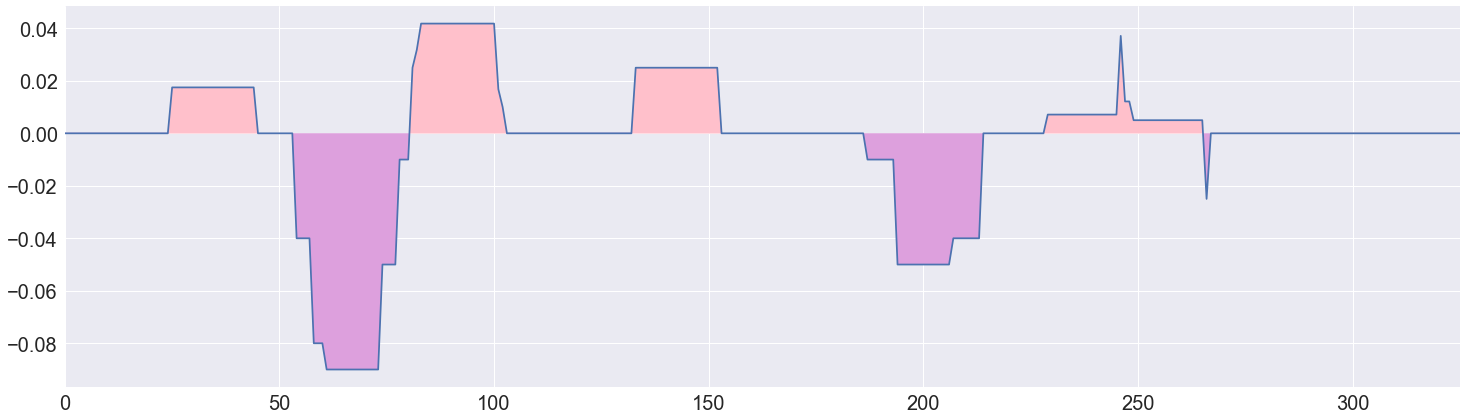

In [27]:
plt.figure(figsize=(16,14))
sentiment_runavg(Arya_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Text yticklabel objects>)

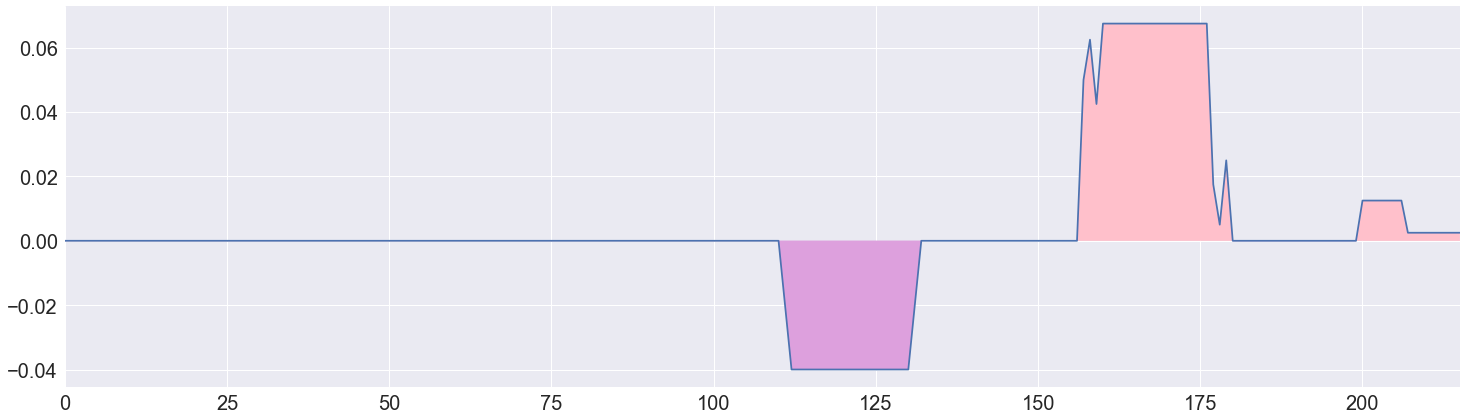

In [28]:
plt.figure(figsize=(16,14))
sentiment_runavg(Arya_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07]),
 <a list of 10 Text yticklabel objects>)

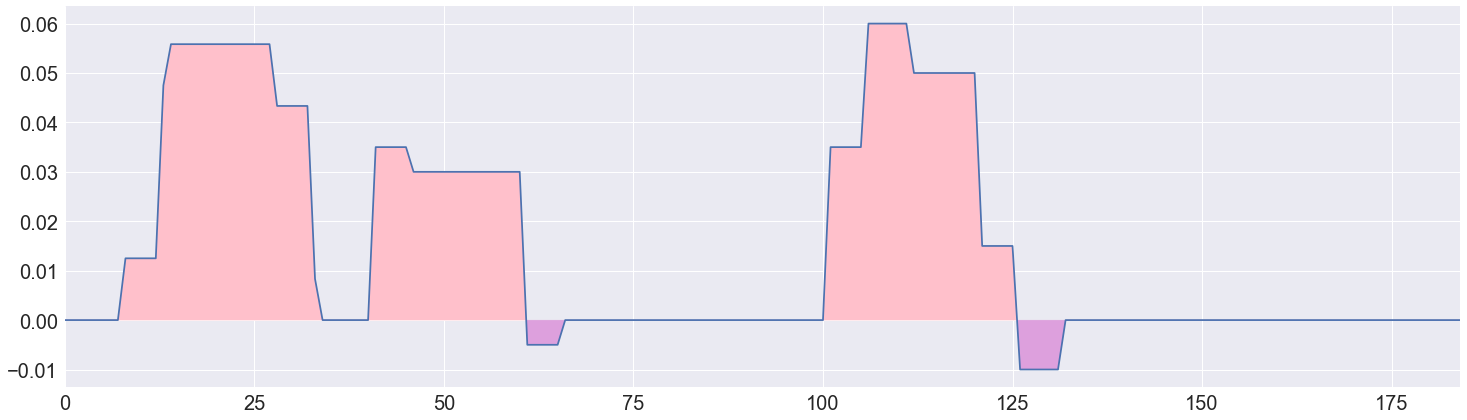

In [29]:
plt.figure(figsize=(16,14))
sentiment_runavg(Arya_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 9 Text yticklabel objects>)

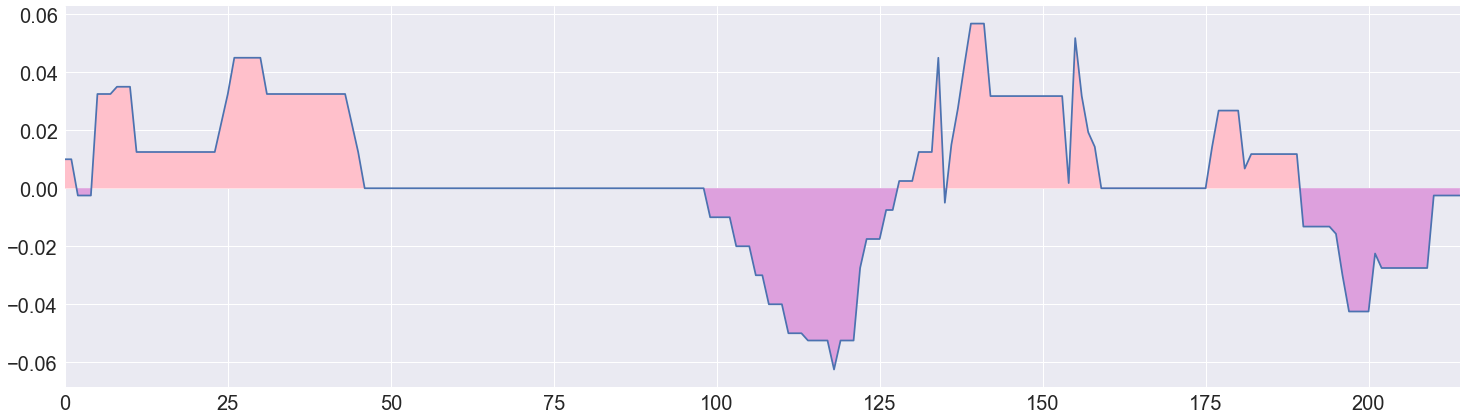

In [30]:
plt.figure(figsize=(16,14))
sentiment_runavg(Arya_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 9 Text yticklabel objects>)

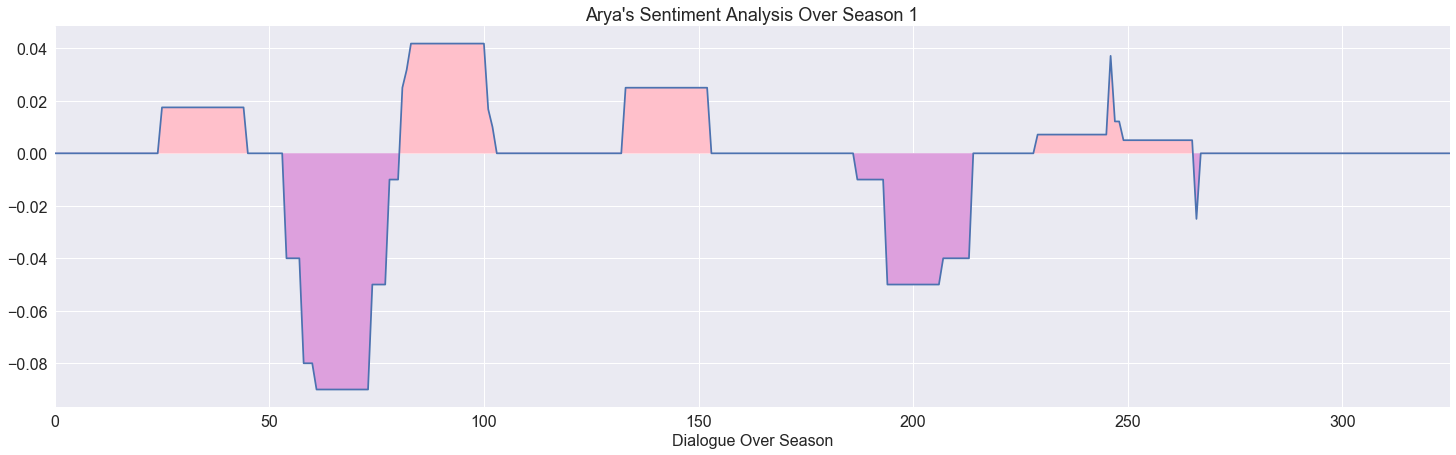

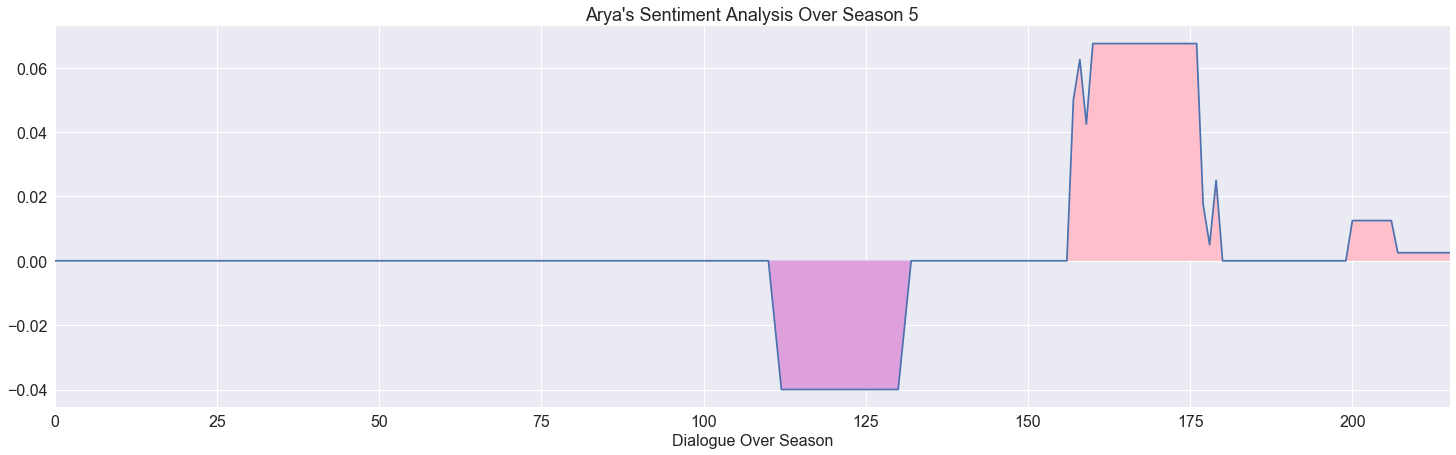

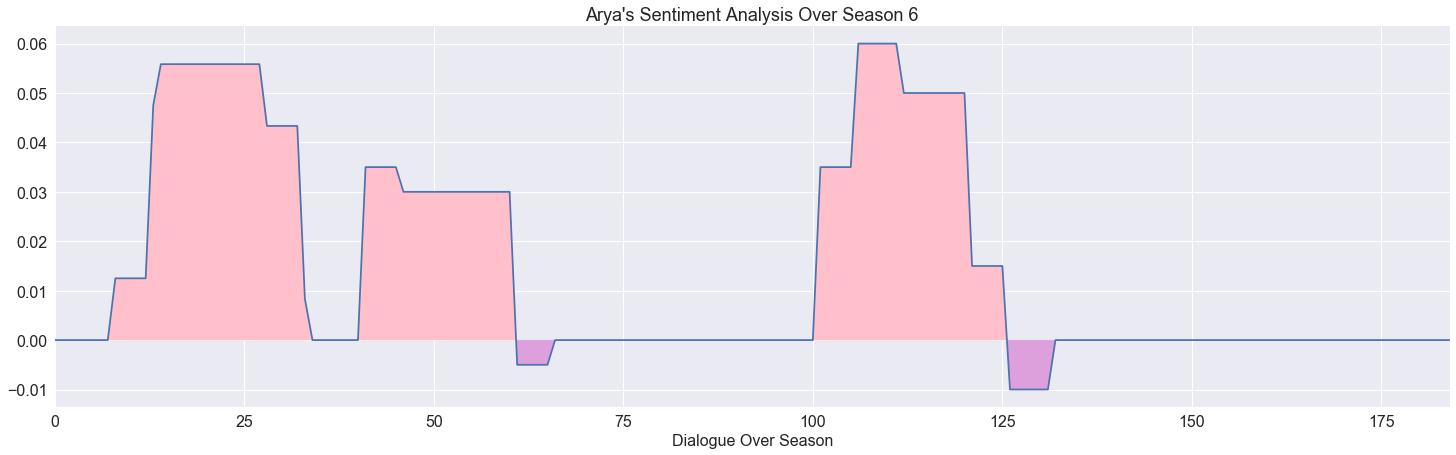

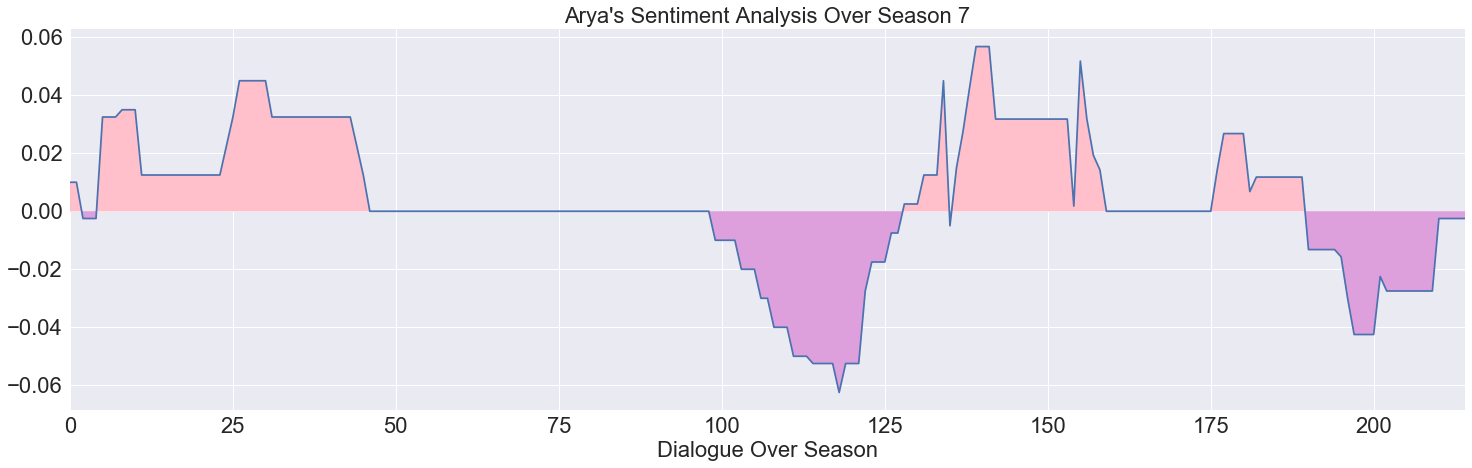

In [33]:
plt.figure(figsize=(16,14))

sentiment_runavg(Arya_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Arya's Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Arya_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Arya's Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Arya_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Arya's Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Arya_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Arya's Sentiment Analysis Over Season 7", fontsize=22)
plt.xlabel("Dialogue Over Season", fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

### Baelish

In [36]:
BaelishS1 = season_one_sentiment.loc['Petyr Baelish']

Baelish_Sentiment_S1 = BaelishS1.values.tolist()

In [37]:
BaelishS5 = season_five_sentiment.loc['Baelish']

Baelish_Sentiment_S5 = BaelishS5.values.tolist()

In [38]:
BaelishS6 = season_six_sentiment.loc['Littlefinger']

Baelish_Sentiment_S6= BaelishS6.values.tolist()

In [39]:
BaelishS7 = season_seven_sentiment.loc['Baelish']

Baelish_Sentiment_S7 = BaelishS7.values.tolist()

In [40]:
Baelish_Polarity_S1 = polarity(Baelish_Sentiment_S1)
Baelish_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 -0.6999999999999998,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.09999999999999998,
 0.0,
 0.4,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,

In [41]:
Baelish_Polarity_S5 = polarity(Baelish_Sentiment_S5)

In [42]:
Baelish_Polarity_S6= polarity(Baelish_Sentiment_S6)

In [43]:
Baelish_Polarity_S7 = polarity(Baelish_Sentiment_S7)

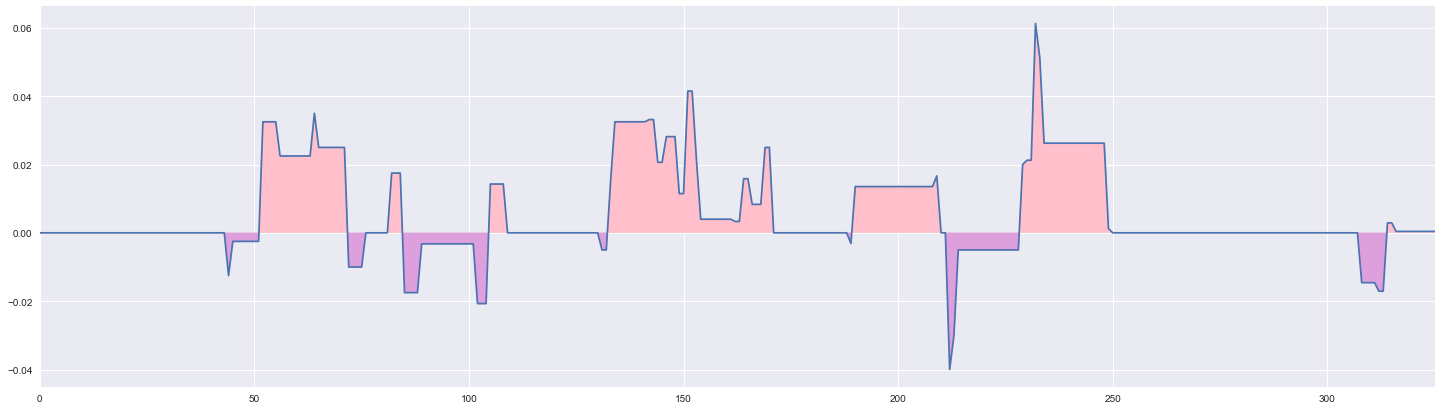

In [44]:
sentiment_runavg(Baelish_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

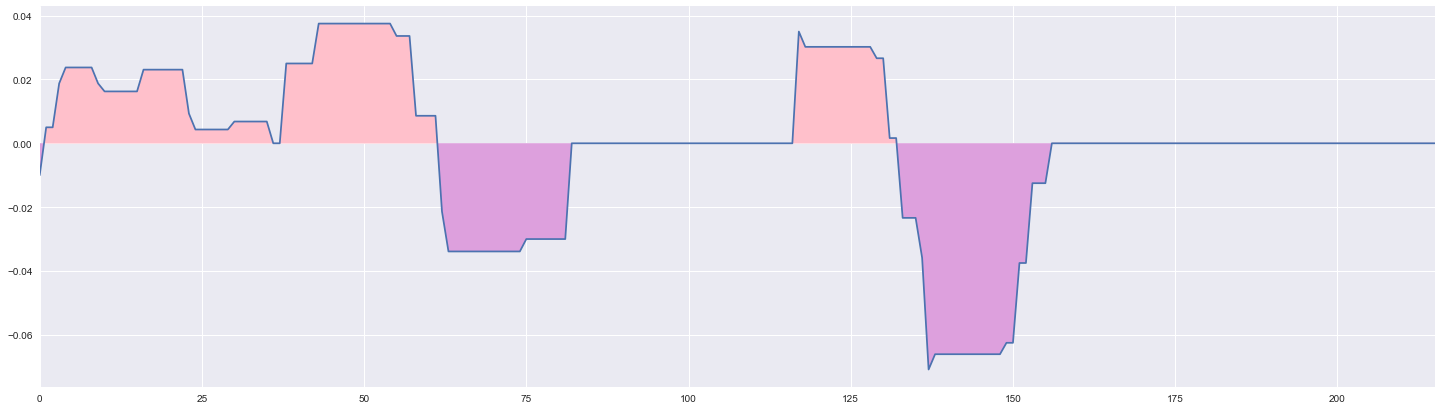

In [45]:
sentiment_runavg(Baelish_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

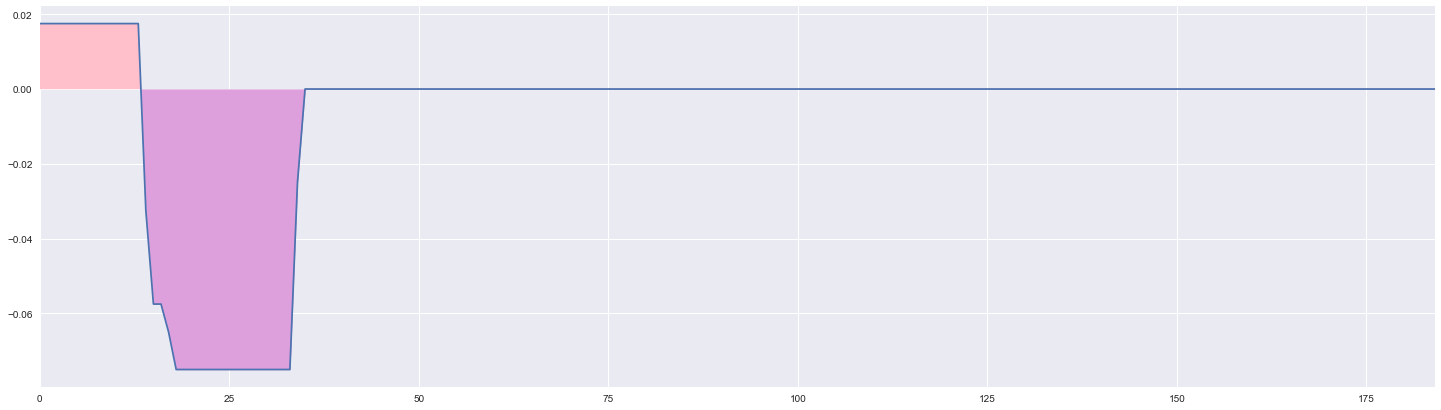

In [46]:
sentiment_runavg(Baelish_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

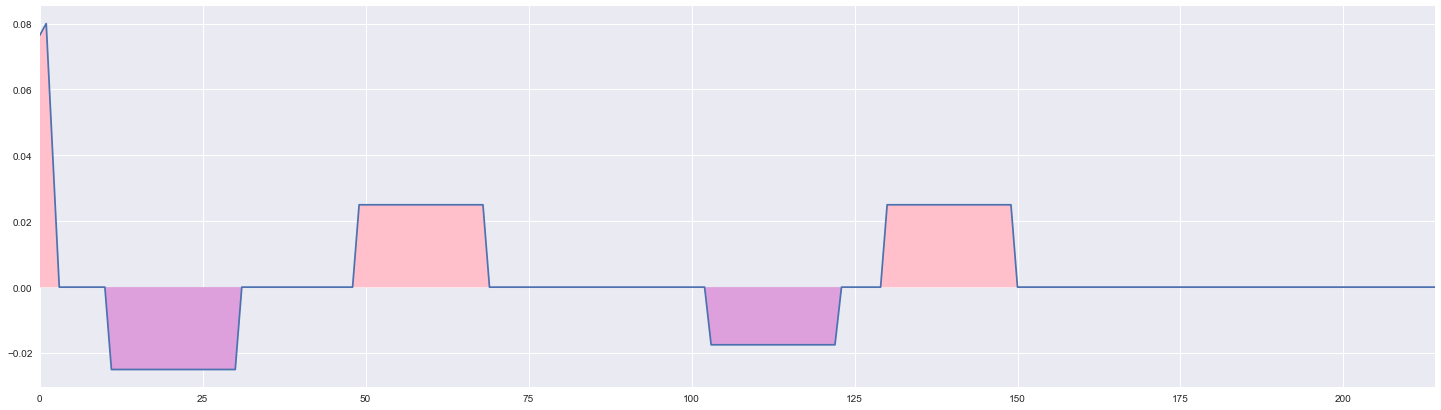

In [47]:
sentiment_runavg(Baelish_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Brienne

In [48]:
BrienneS5 = season_five_sentiment.loc['Brienne']

Brienne_Sentiment_S5 = BrienneS5.values.tolist()

In [49]:
BrienneS6 = season_six_sentiment.loc['Brienne']

Brienne_Sentiment_S6= BrienneS6.values.tolist()

In [50]:
BrienneS7 = season_seven_sentiment.loc['Brienne']

Brienne_Sentiment_S7 = BrienneS7.values.tolist()

In [51]:
Brienne_Polarity_S5 = polarity(Brienne_Sentiment_S5)
Brienne_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [52]:
Brienne_Polarity_S6= polarity(Brienne_Sentiment_S6)

In [53]:
Brienne_Polarity_S7 = polarity(Brienne_Sentiment_S7)

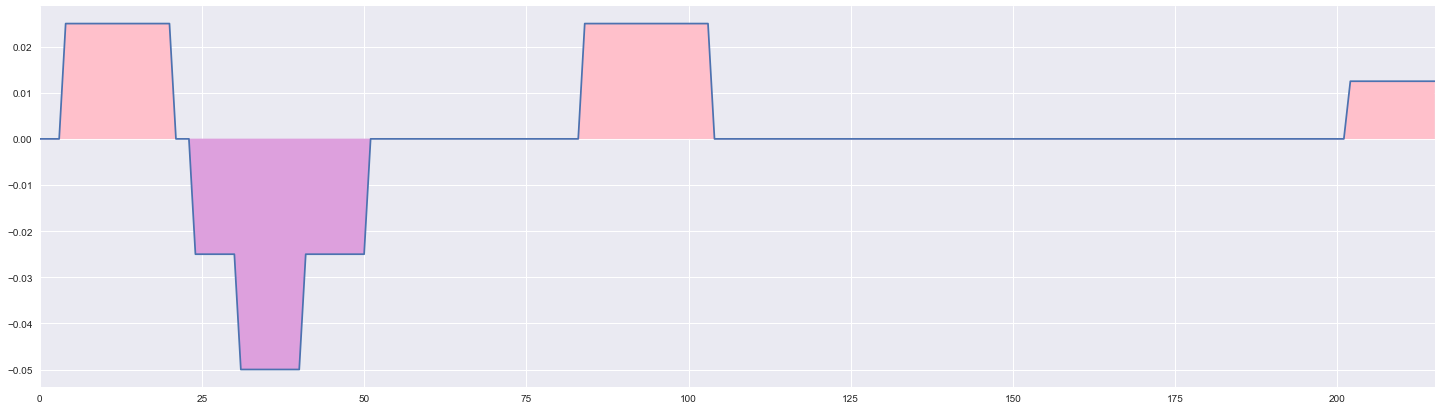

In [54]:
sentiment_runavg(Brienne_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')

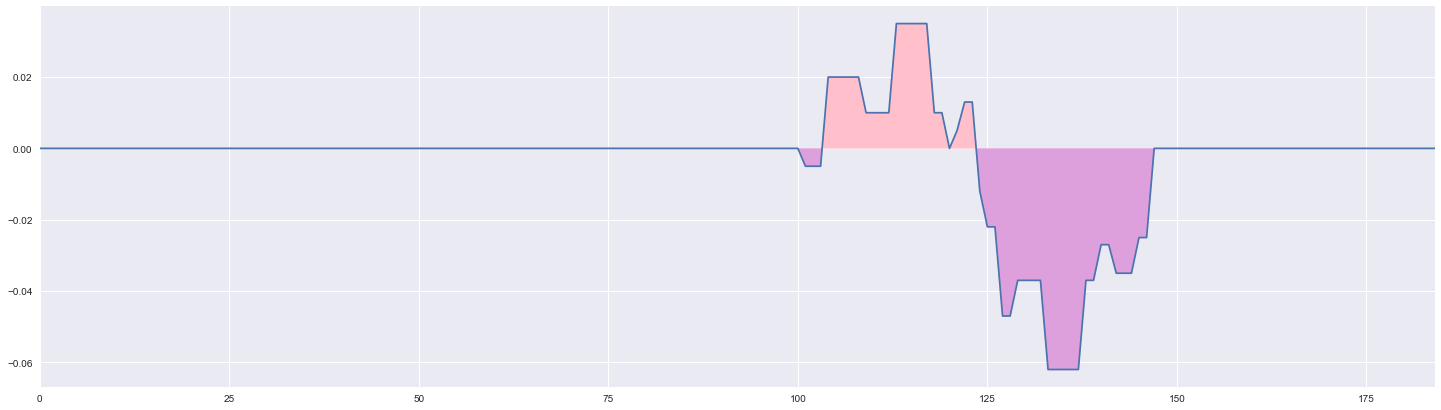

In [55]:
sentiment_runavg(Brienne_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')

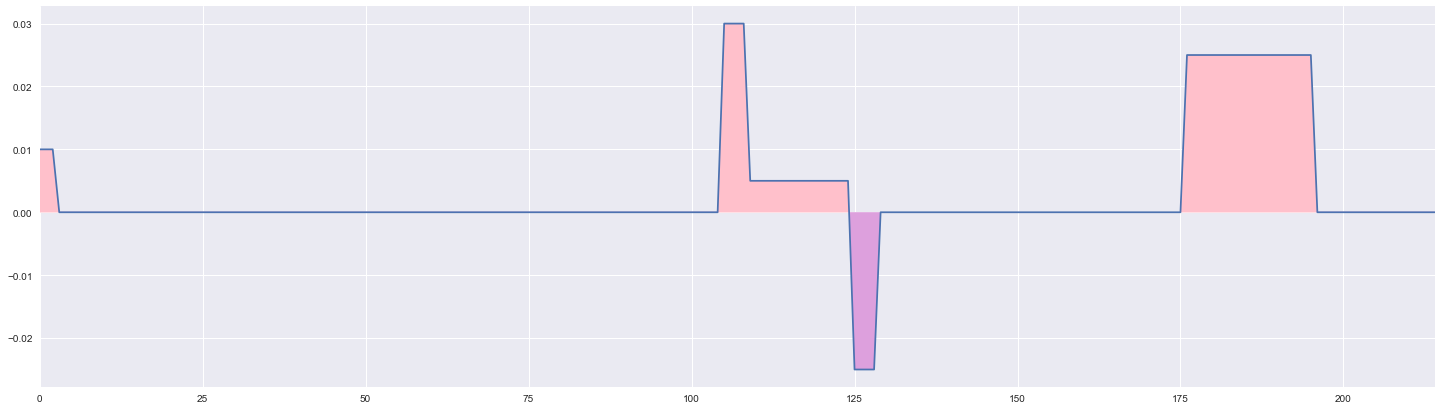

In [56]:
sentiment_runavg(Brienne_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')

### Catelyn

In [57]:
CatelynS1 = season_one_sentiment.loc['Catelyn Stark']

Catelyn_Sentiment_S1 = CatelynS1.values.tolist()

In [58]:
Catelyn_Polarity_S1 = polarity(Catelyn_Sentiment_S1)
Catelyn_Polarity_S1

[0.2,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.10714285714285715,
 0.0,
 -0.13333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21428571428571427,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.475,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

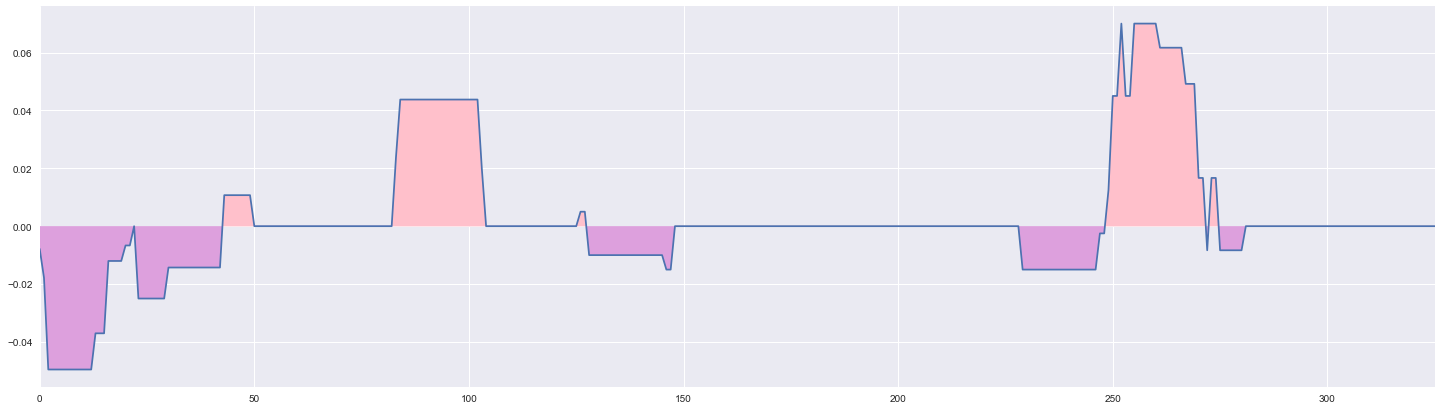

In [59]:
sentiment_runavg(Catelyn_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')

### Cersei

In [60]:
CerseiS1 = season_one_sentiment.loc['Cersei Baratheon']

Cersei_Sentiment_S1 = CerseiS1.values.tolist()

In [61]:
CerseiS5 = season_five_sentiment.loc['Cersei']

Cersei_Sentiment_S5 = CerseiS5.values.tolist()

In [62]:
CerseiS6 = season_six_sentiment.loc['Cersei']

Cersei_Sentiment_S6 = CerseiS6.values.tolist()

In [63]:
CerseiS7 = season_seven_sentiment.loc['Cersei']

Cersei_Sentiment_S7 = CerseiS7.values.tolist()

In [64]:
Cersei_Polarity_S1 = polarity(Cersei_Sentiment_S1)
Cersei_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 -0.1875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.3125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 -0.35,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.0,
 0.08333333333333333,
 0.0,
 0.0,
 0.125,
 0.0,


In [65]:
Cersei_Polarity_S5 = polarity(Cersei_Sentiment_S5)

In [66]:
Cersei_Polarity_S6= polarity(Cersei_Sentiment_S6)

In [67]:
Cersei_Polarity_S7 = polarity(Cersei_Sentiment_S7)

(array([-0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,
         0.15 ,  0.175]), <a list of 10 Text yticklabel objects>)

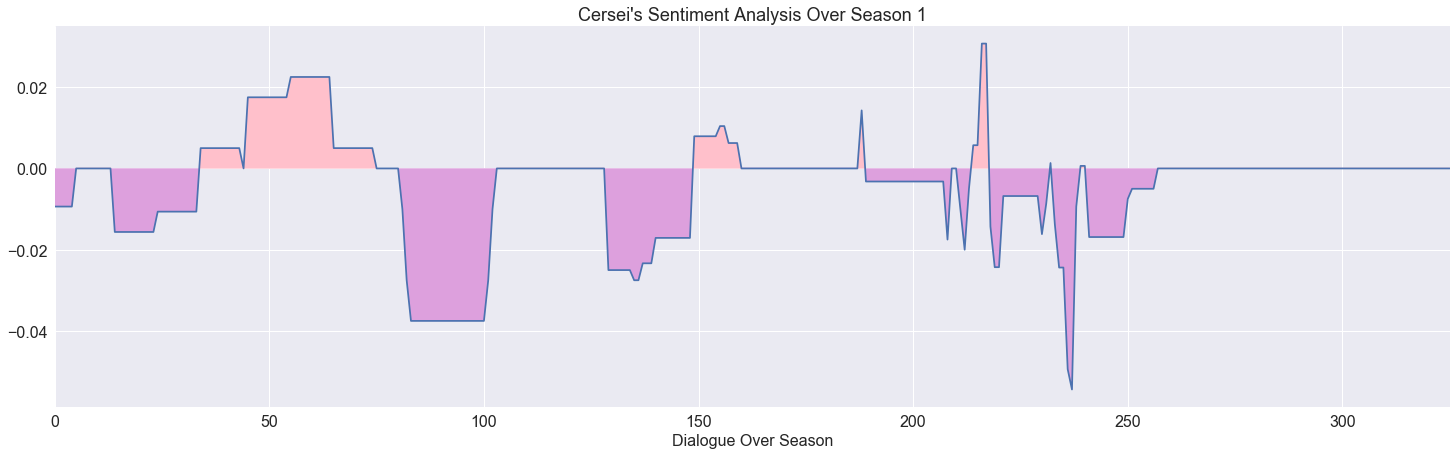

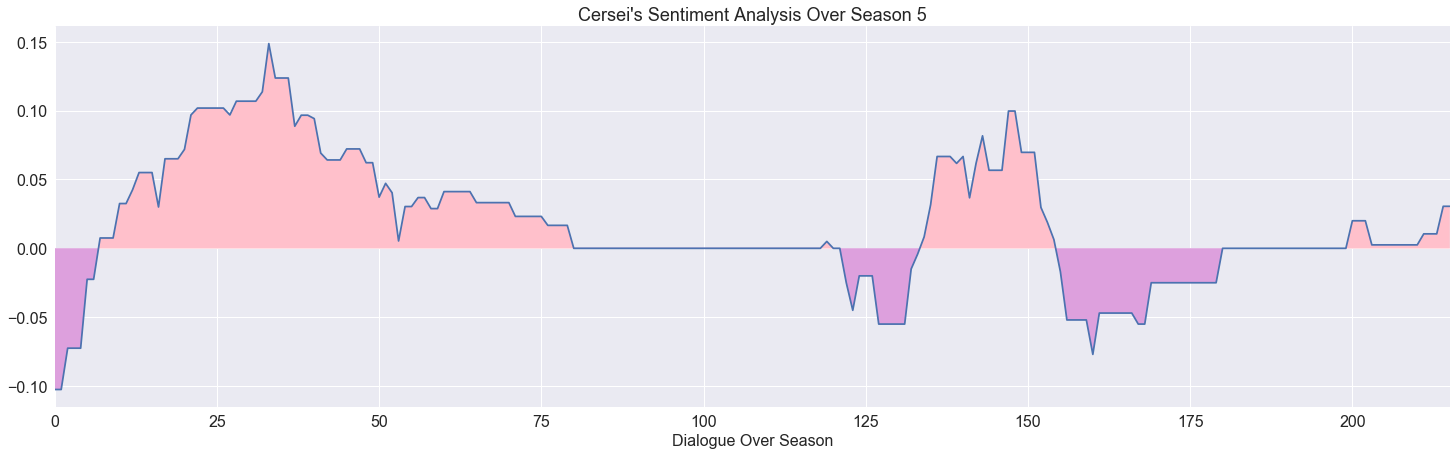

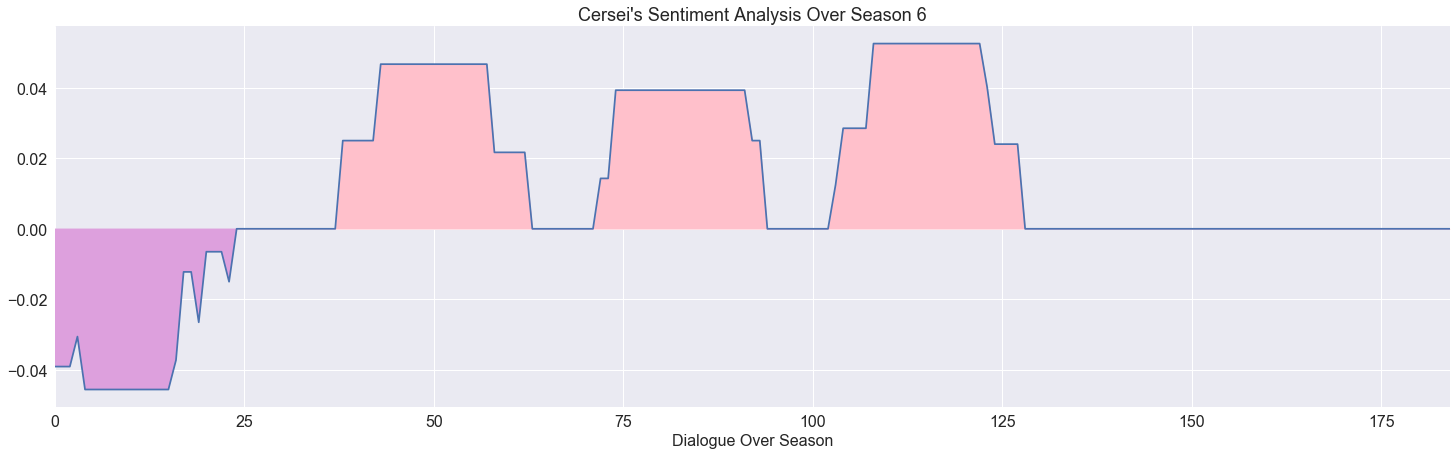

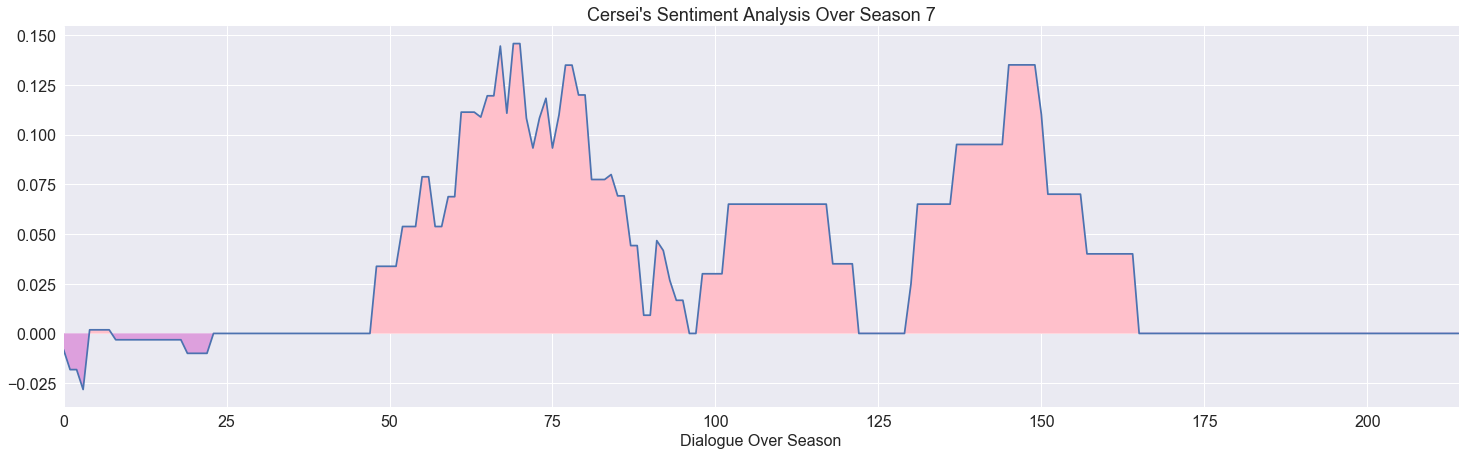

In [68]:
plt.figure(figsize=(16,14))

sentiment_runavg(Cersei_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Cersei's Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Cersei_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Cersei's Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Cersei_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Cersei's Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Cersei_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Cersei's Sentiment Analysis Over Season 7", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

### Daenerys

In [69]:
DaenerysS1 = season_one_sentiment.loc['Daenerys Targaryen']

Daenerys_Sentiment_S1 = DaenerysS1.values.tolist()

In [70]:
DaenerysS5 = season_five_sentiment.loc['Daenerys']

Daenerys_Sentiment_S5 = DaenerysS5.values.tolist()

In [71]:
DaenerysS6 = season_six_sentiment.loc['Daenerys']

Daenerys_Sentiment_S6 = DaenerysS6.values.tolist()

In [72]:
DaenerysS7 = season_seven_sentiment.loc['Daenerys']

Daenerys_Sentiment_S7 = DaenerysS7.values.tolist()

In [73]:
Daenerys_Polarity_S1 = polarity(Daenerys_Sentiment_S1)
Daenerys_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.85,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.8,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.35,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [74]:
Daenerys_Polarity_S5 = polarity(Daenerys_Sentiment_S5)

In [75]:
Daenerys_Polarity_S6= polarity(Daenerys_Sentiment_S6)

In [76]:
Daenerys_Polarity_S7 = polarity(Daenerys_Sentiment_S7)

(array([-0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,
         0.15 ,  0.175]), <a list of 10 Text yticklabel objects>)

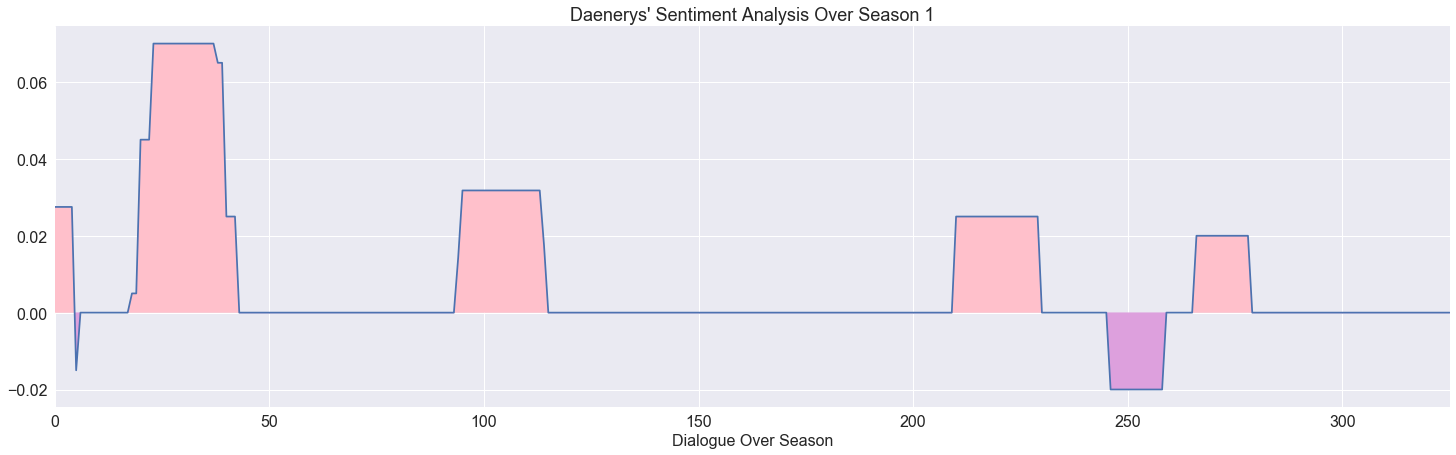

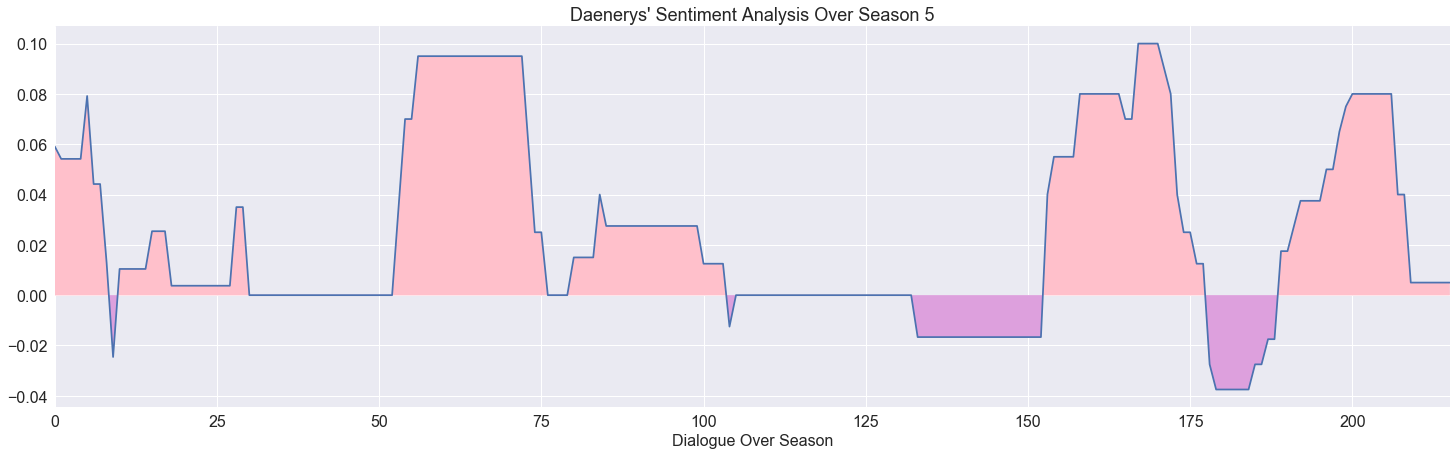

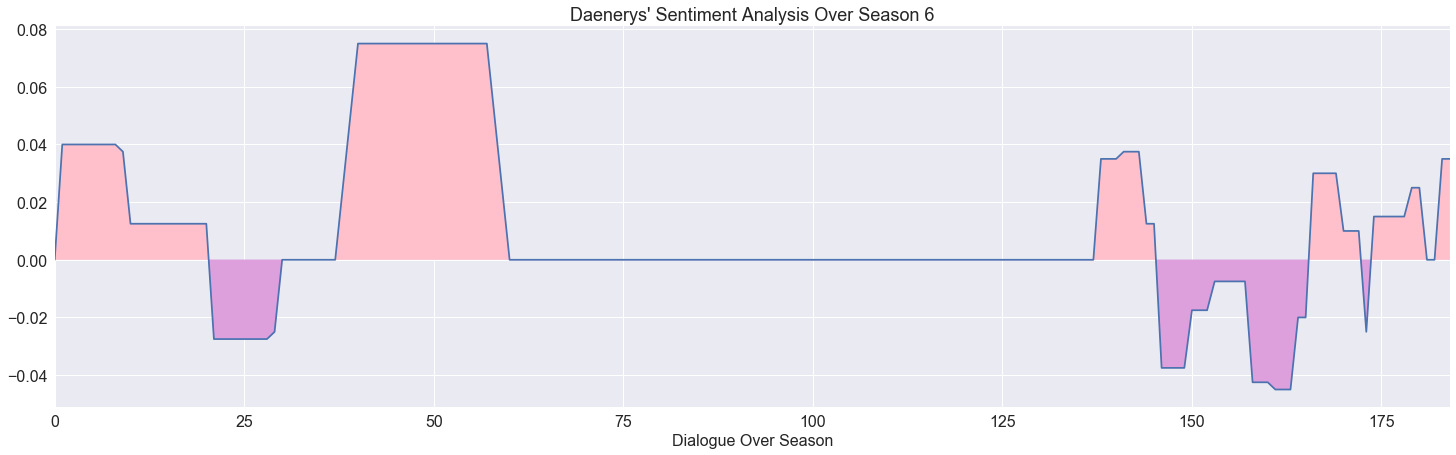

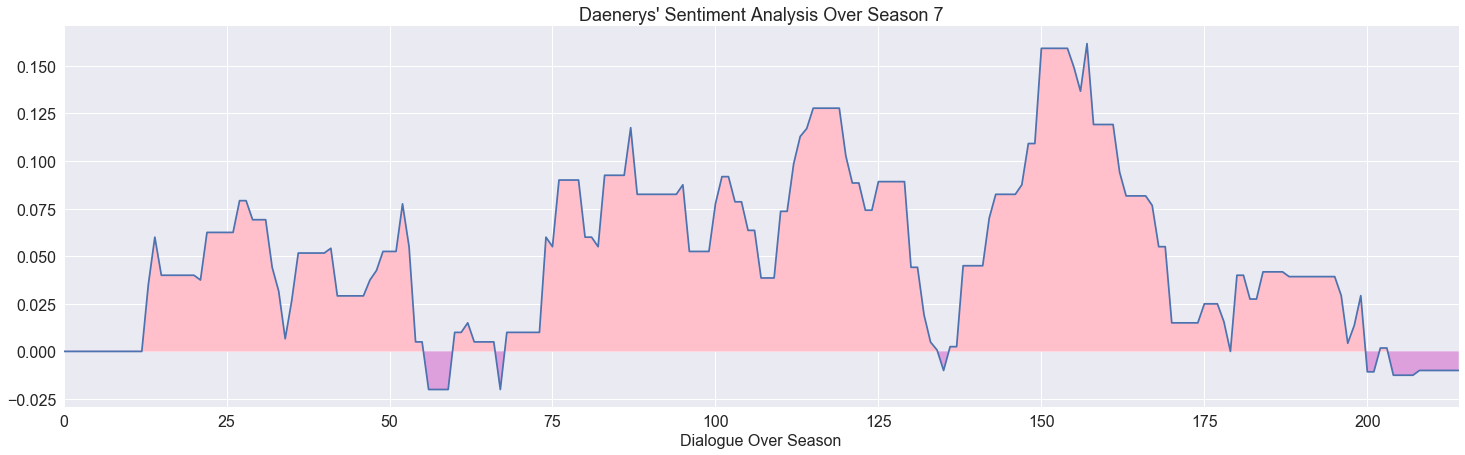

In [77]:
plt.figure(figsize=(16,14))

sentiment_runavg(Daenerys_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Daenerys' Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Daenerys_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Daenerys' Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Daenerys_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Daenerys' Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Daenerys_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Daenerys' Sentiment Analysis Over Season 7", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

### Davos

In [78]:
DavosS5 = season_five_sentiment.loc['Davos']

Davos_Sentiment_S5 = DavosS5.values.tolist()

In [79]:
DavosS6 = season_six_sentiment.loc['Davos']

Davos_Sentiment_S6 = DavosS6.values.tolist()

In [80]:
DavosS7 = season_seven_sentiment.loc['Davos']

Davos_Sentiment_S7 = DavosS7.values.tolist()

In [81]:
Davos_Polarity_S5 = polarity(Davos_Sentiment_S5)
Davos_Polarity_S5

[0.0,
 0.5,
 0.2,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4681818181818182,
 -0.6499999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.35,
 0.0,
 -0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 -0.3888888888888889,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2916666666666667,
 -0.0833

In [82]:
Davos_Polarity_S6= polarity(Davos_Sentiment_S6)

In [83]:
Davos_Polarity_S7 = polarity(Davos_Sentiment_S7)

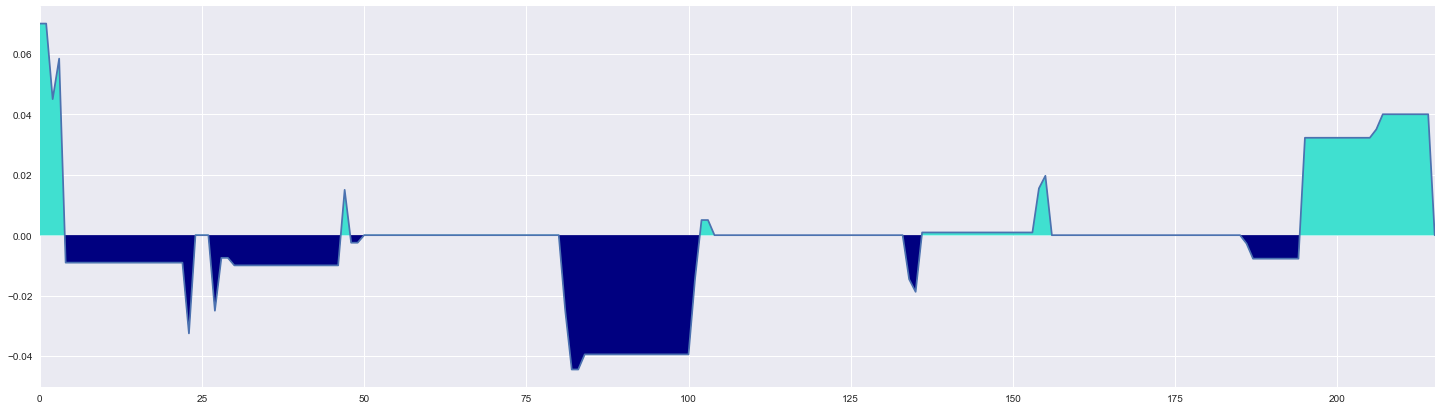

In [84]:
sentiment_runavg(Davos_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

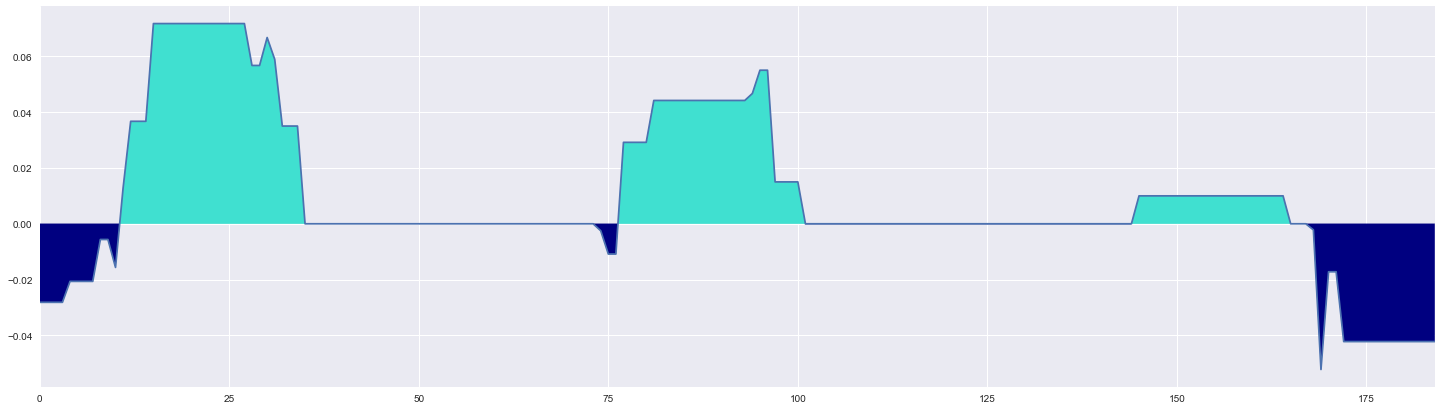

In [85]:
sentiment_runavg(Davos_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

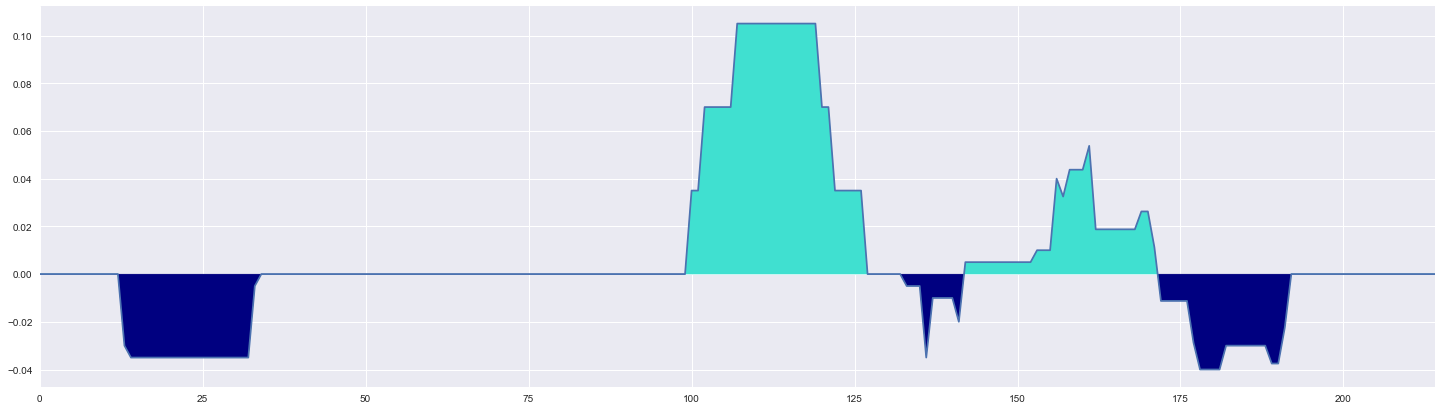

In [86]:
sentiment_runavg(Davos_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Eddard 

In [87]:
EddardS1 = season_one_sentiment.loc['Eddard Stark']

Eddard_Sentiment_S1 = EddardS1.values.tolist()

In [88]:
Eddard_Polarity_S1 = polarity(Eddard_Sentiment_S1)
Eddard_Polarity_S1

[0.0,
 0.25,
 0.25,
 -0.2,
 0.0,
 0.0,
 0.0,
 -0.14444444444444443,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.3,
 0.5,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -0.1875,
 0.0,
 0.0,
 -0.125,
 0.0,
 0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.3125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.7,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.0,
 0.0,
 0.25,
 -0.6,
 -0.2,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.5,
 0.0,
 0.4333333333333333,
 0.15714285714285714,
 0.0,
 0.0,
 0.0,
 -0.2916666666666667,
 0.0,
 0.2857142857142857,
 0.125,
 0.0,
 0.16,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,


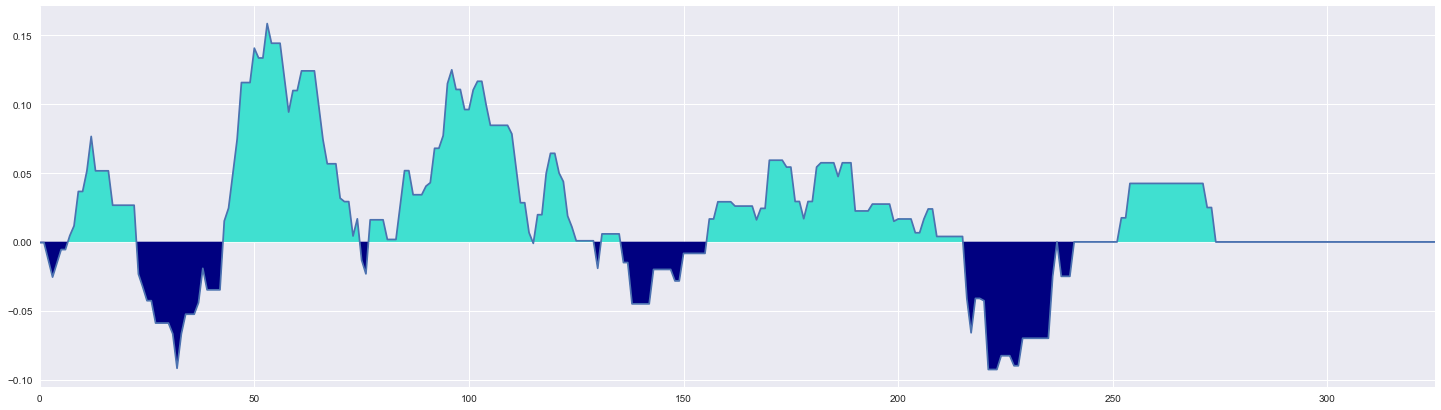

In [89]:
sentiment_runavg(Eddard_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Gilly

In [90]:
GillyS5 = season_five_sentiment.loc['Gilly']

Gilly_Sentiment_S5 = GillyS5.values.tolist()

In [91]:
GillyS6 = season_six_sentiment.loc['Gilly']

Gilly_Sentiment_S6 = GillyS6.values.tolist()

In [92]:
GillyS7 = season_seven_sentiment.loc['Gilly']

Gilly_Sentiment_S7 = GillyS7.values.tolist()

In [93]:
Gilly_Polarity_S5 = polarity(Gilly_Sentiment_S5)
Gilly_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7999999999999999,
 -0.1875,
 0.0,
 0.0,
 

In [94]:
Gilly_Polarity_S6= polarity(Gilly_Sentiment_S6)

In [95]:
Gilly_Polarity_S7 = polarity(Gilly_Sentiment_S7)

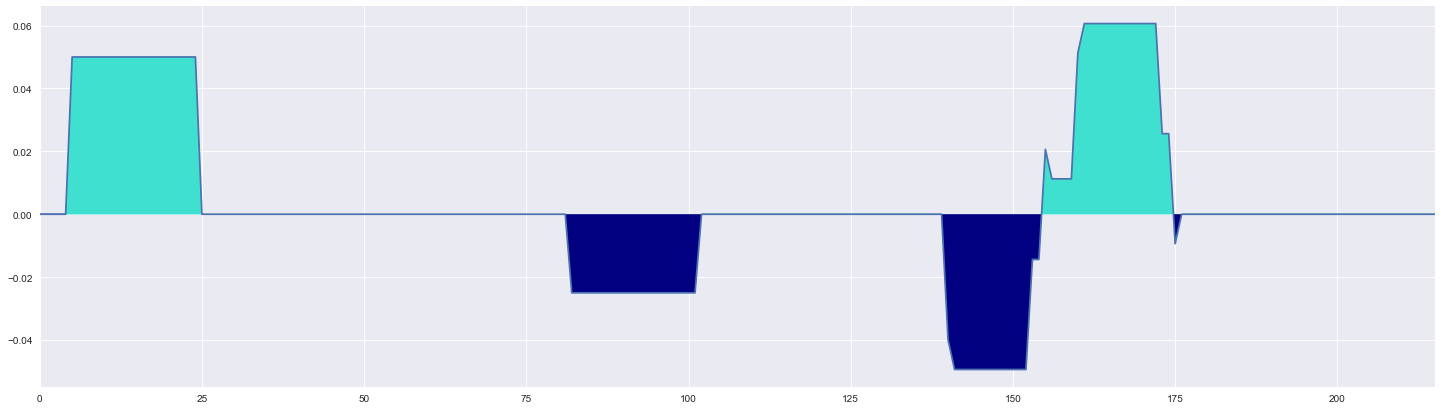

In [96]:
sentiment_runavg(Gilly_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

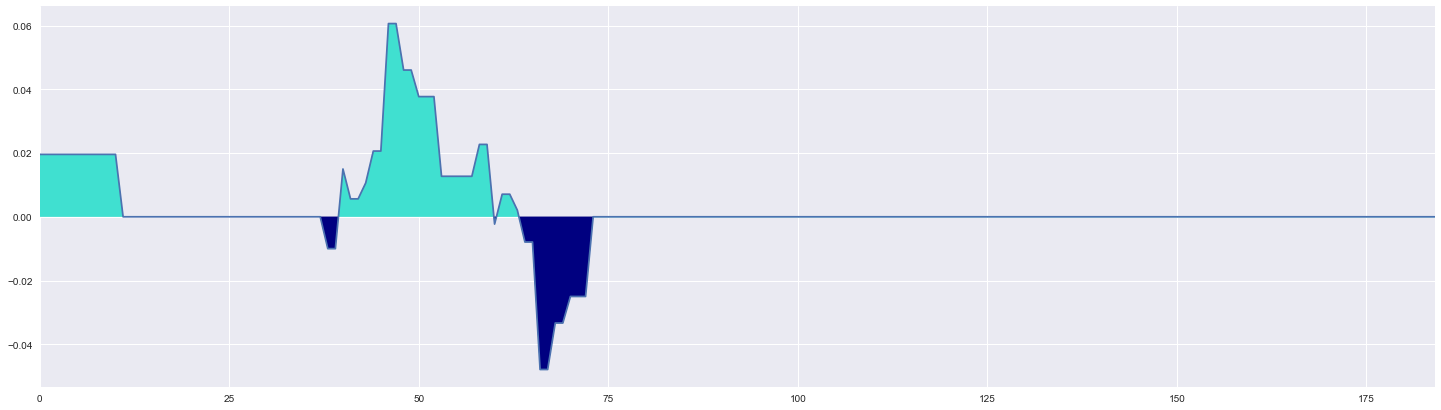

In [97]:
sentiment_runavg(Gilly_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

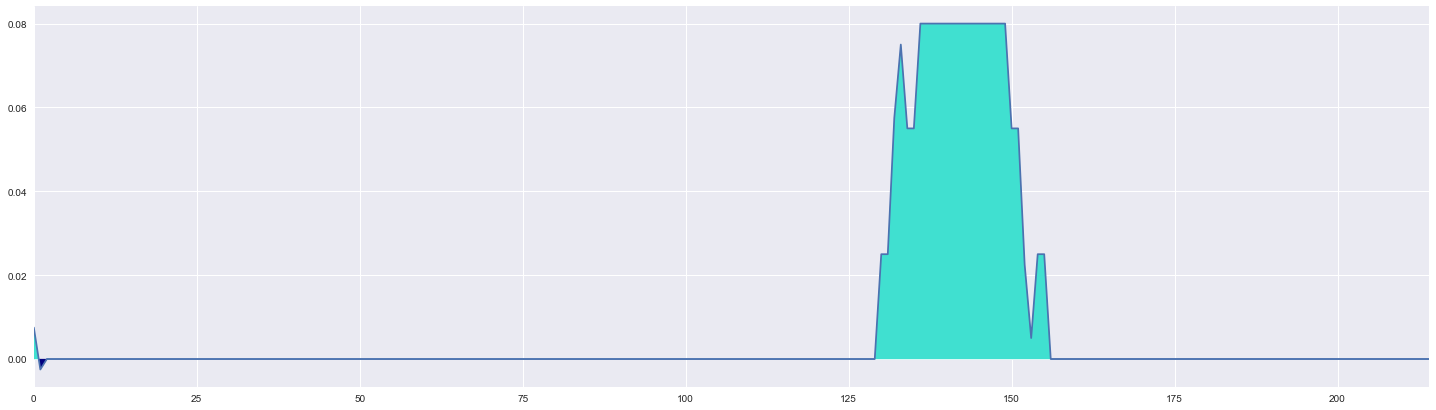

In [98]:
sentiment_runavg(Gilly_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Jaime

In [99]:
JaimeS1 = season_one_sentiment.loc['Jaime Lannister']

Jaime_Sentiment_S1 = JaimeS1.values.tolist()

In [100]:
JaimeS5 = season_five_sentiment.loc['Jaime']

Jaime_Sentiment_S5 = JaimeS5.values.tolist()

In [101]:
JaimeS6 = season_six_sentiment.loc['Jaime']

Jaime_Sentiment_S6 = JaimeS6.values.tolist()

In [102]:
JaimeS7 = season_seven_sentiment.loc['Jaime']

Jaime_Sentiment_S7 = JaimeS7.values.tolist()

In [103]:
Jaime_Polarity_S1 = polarity(Jaime_Sentiment_S1)
Jaime_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3181818181818182,
 0.0,
 0.0,
 -0.625,
 0.2857142857142857,
 0.25,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1875,
 -0.16666666666666666,
 0.7,
 -0.3125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.30000000000000004,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.25,
 0.0,
 0.25,
 -0.2,
 -0.2,
 0.28571428571428

In [104]:
Jaime_Polarity_S5 = polarity(Jaime_Sentiment_S5)

In [105]:
Jaime_Polarity_S6 = polarity(Jaime_Sentiment_S6)

In [106]:
Jaime_Polarity_S7 = polarity(Jaime_Sentiment_S7)

(array([-0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,
         0.15 ,  0.175]), <a list of 10 Text yticklabel objects>)

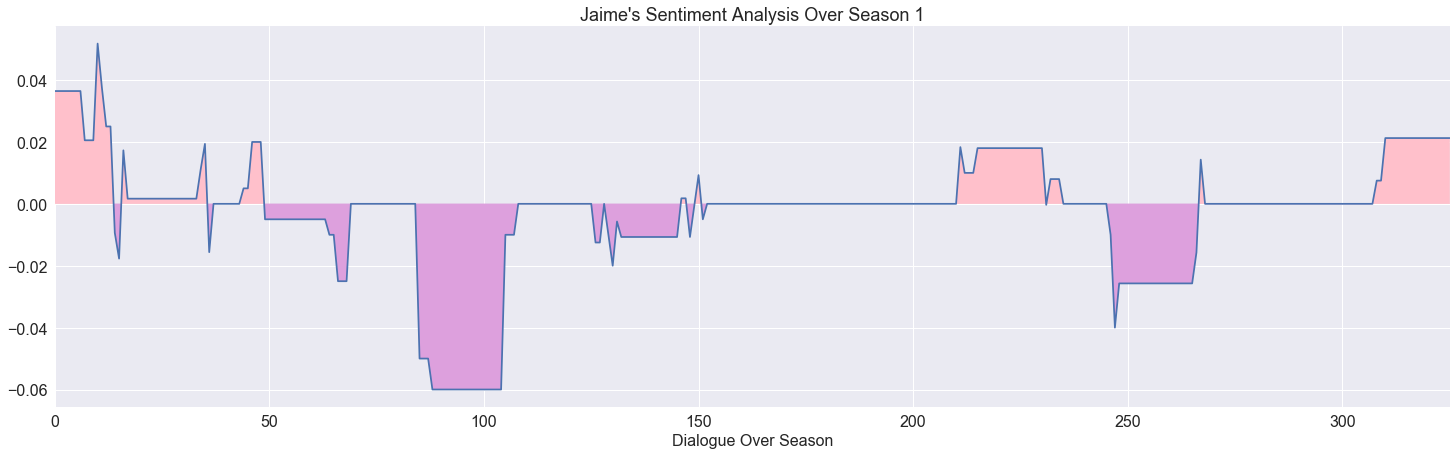

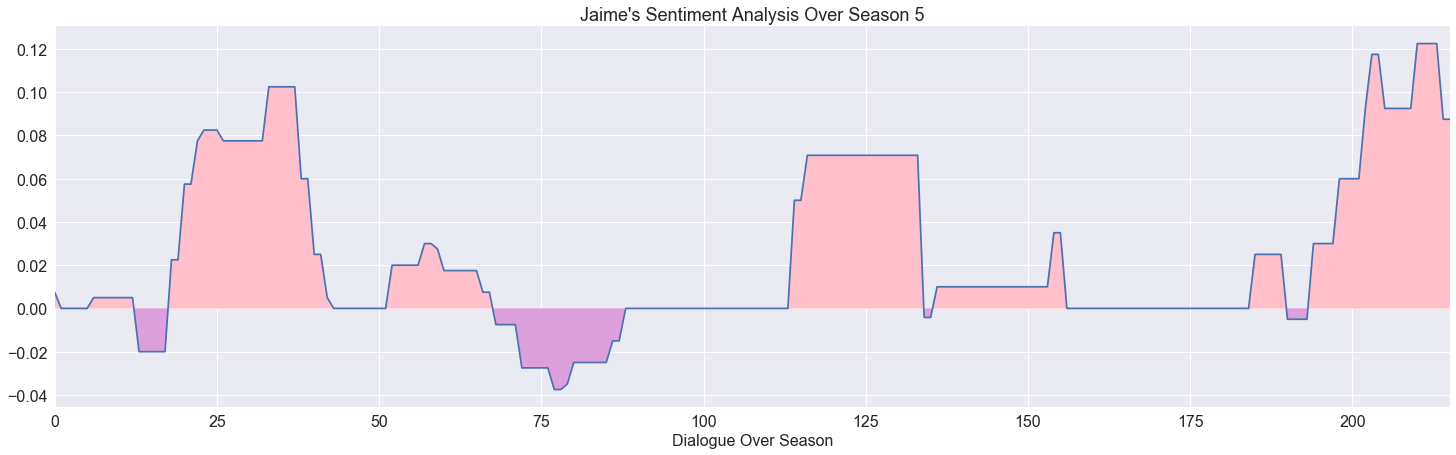

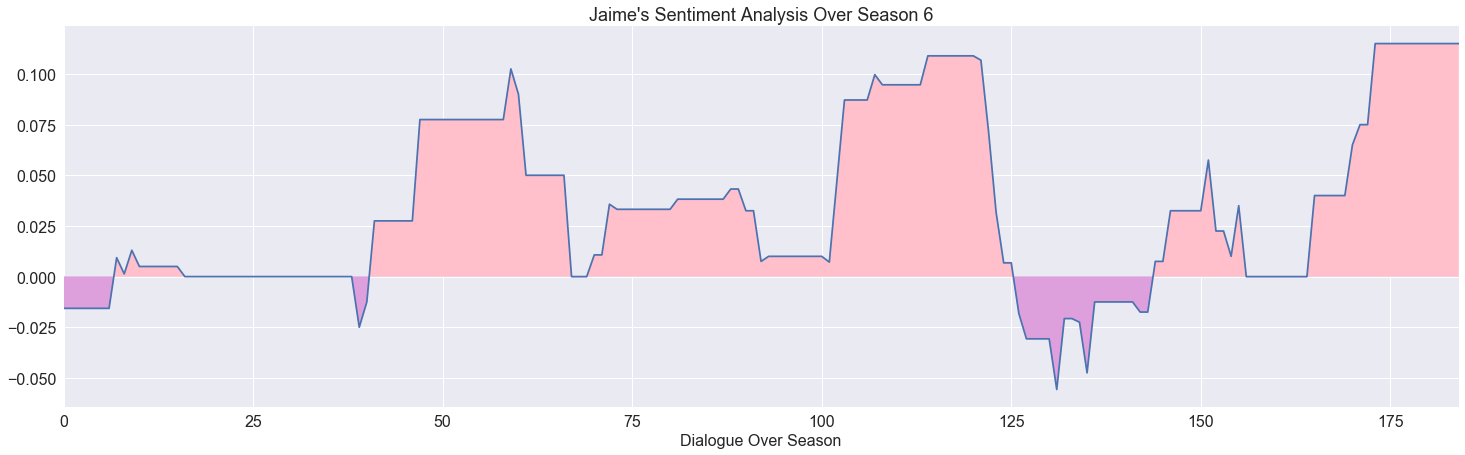

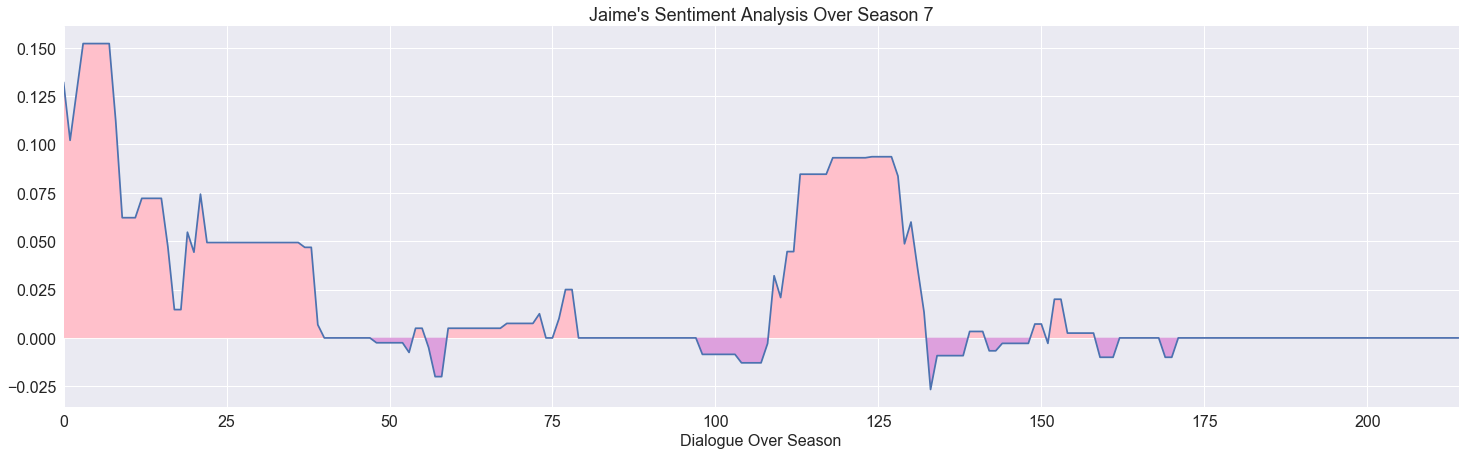

In [107]:
plt.figure(figsize=(16,14))

sentiment_runavg(Jaime_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jaime's Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Jaime_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jaime's Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Jaime_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jaime's Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Jaime_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jaime's Sentiment Analysis Over Season 7", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

### Joffrey

In [108]:
JoffreyS1 = season_one_sentiment.loc['Joffrey Baratheon']

Joffrey_Sentiment_S1 = JoffreyS1.values.tolist()

In [109]:
Joffrey_Polarity_S1 = polarity(Joffrey_Sentiment_S1)
Joffrey_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.2,
 -0.34375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

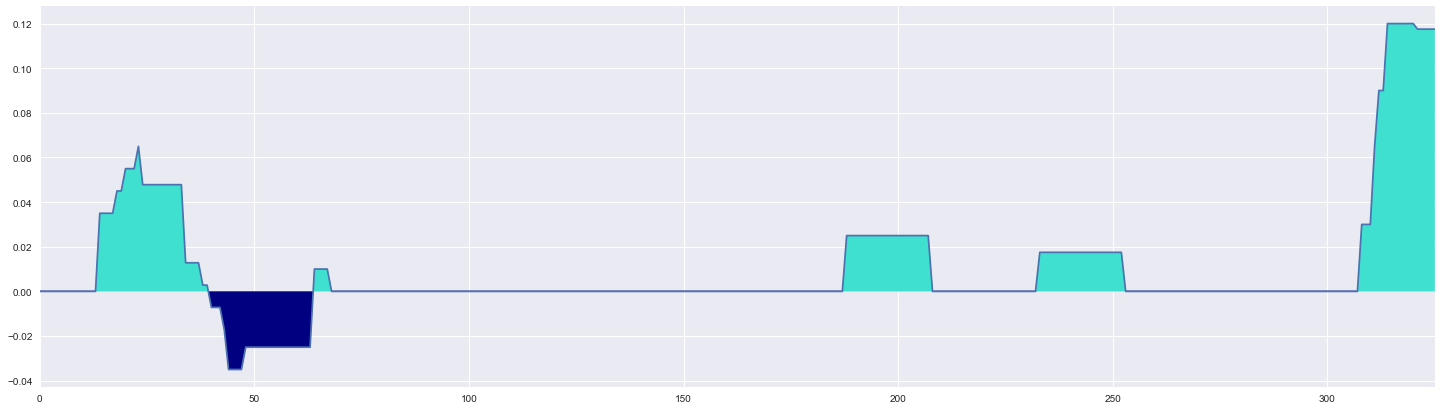

In [110]:
sentiment_runavg(Joffrey_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Jon

In [111]:
JonS1 = season_one_sentiment.loc['Jon Snow']

Jon_Sentiment_S1 = JonS1.values.tolist()

In [112]:
JonS5 = season_five_sentiment.loc['Jon']

Jon_Sentiment_S5 = JonS5.values.tolist()

In [113]:
JonS6 = season_six_sentiment.loc['Jon Snow']

Jon_Sentiment_S6 = JonS6.values.tolist()

In [114]:
JonS7 = season_seven_sentiment.loc['Jon']

Jon_Sentiment_S7 = JonS7.values.tolist()

In [115]:
Jon_Polarity_S1 = polarity(Jon_Sentiment_S1)
Jon_Polarity_S1

[0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.25,
 0.0,
 -0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 1.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.2,
 0.0,
 -0.2,
 0.04999999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.2,
 0.15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.39999999999999997,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [116]:
Jon_Polarity_S5 = polarity(Jon_Sentiment_S5)

In [117]:
Jon_Polarity_S6 = polarity(Jon_Sentiment_S6)

In [118]:
Jon_Polarity_S7 = polarity(Jon_Sentiment_S7)

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ]),
 <a list of 9 Text yticklabel objects>)

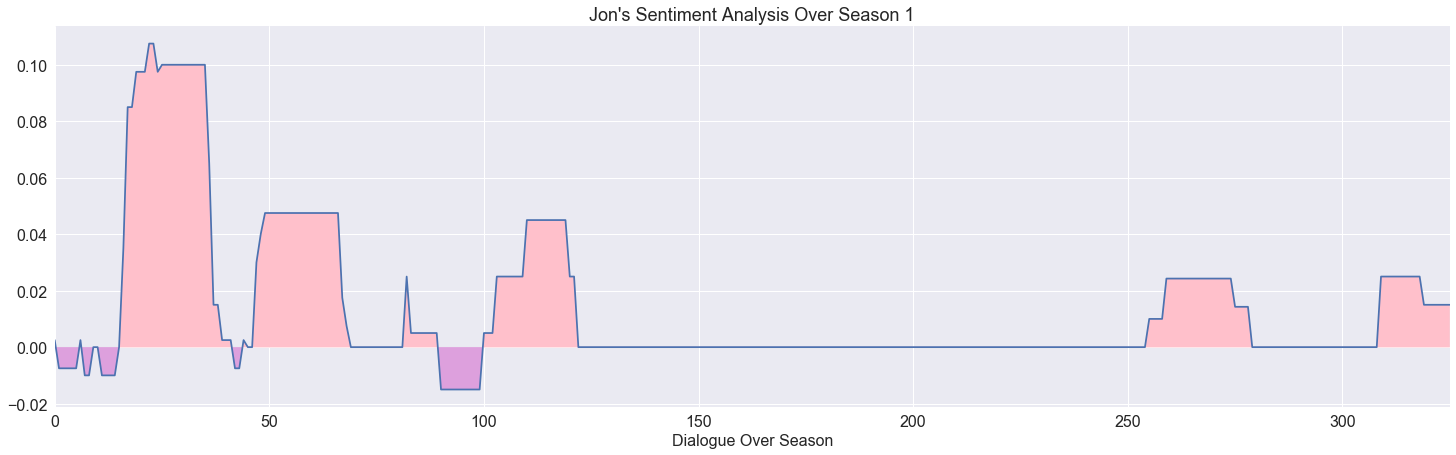

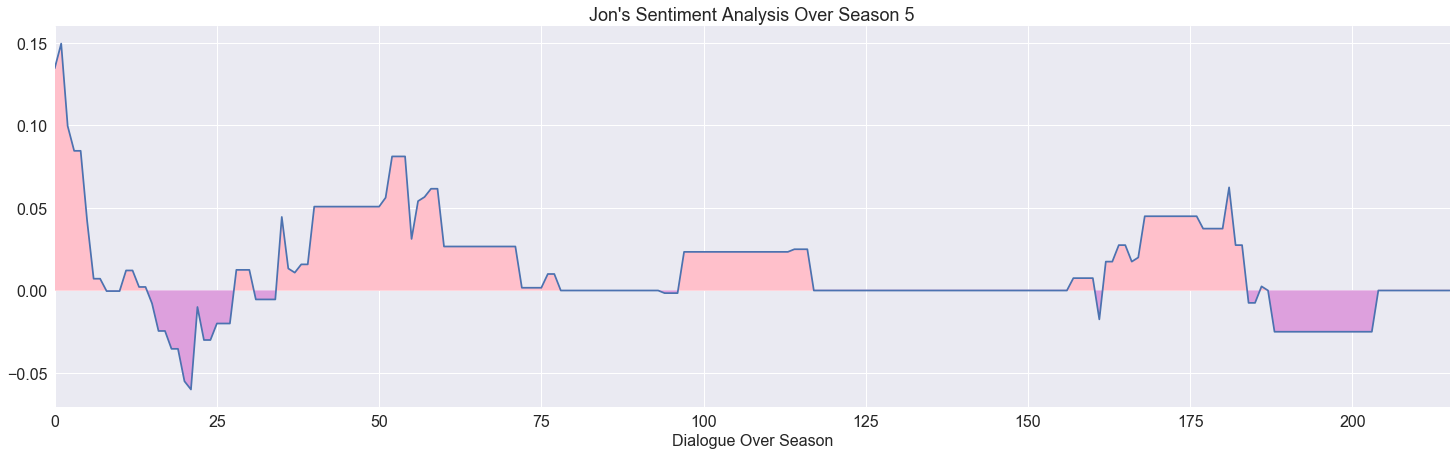

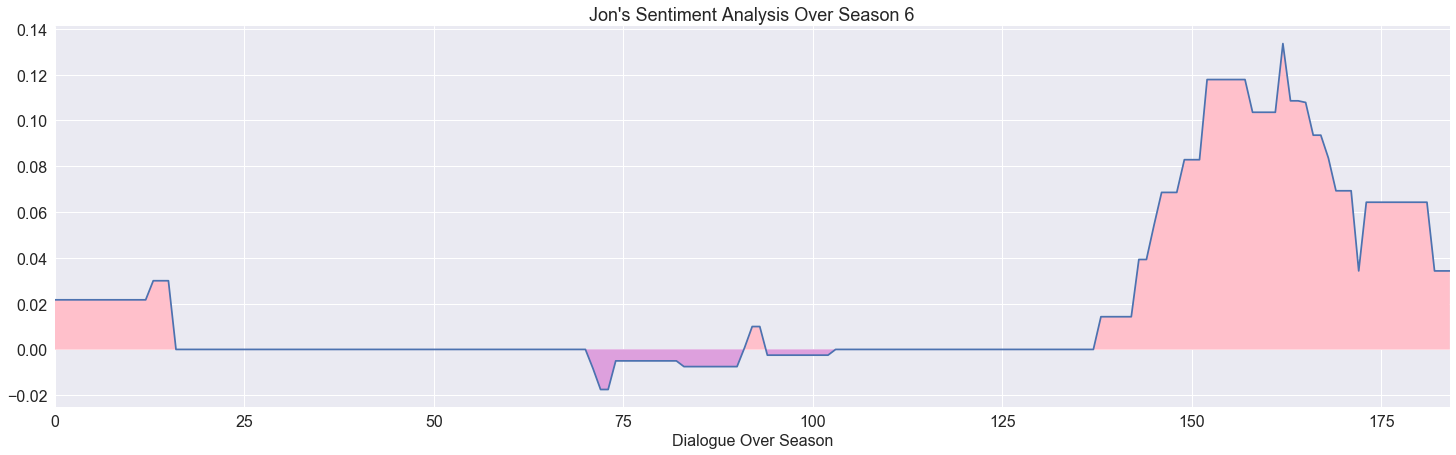

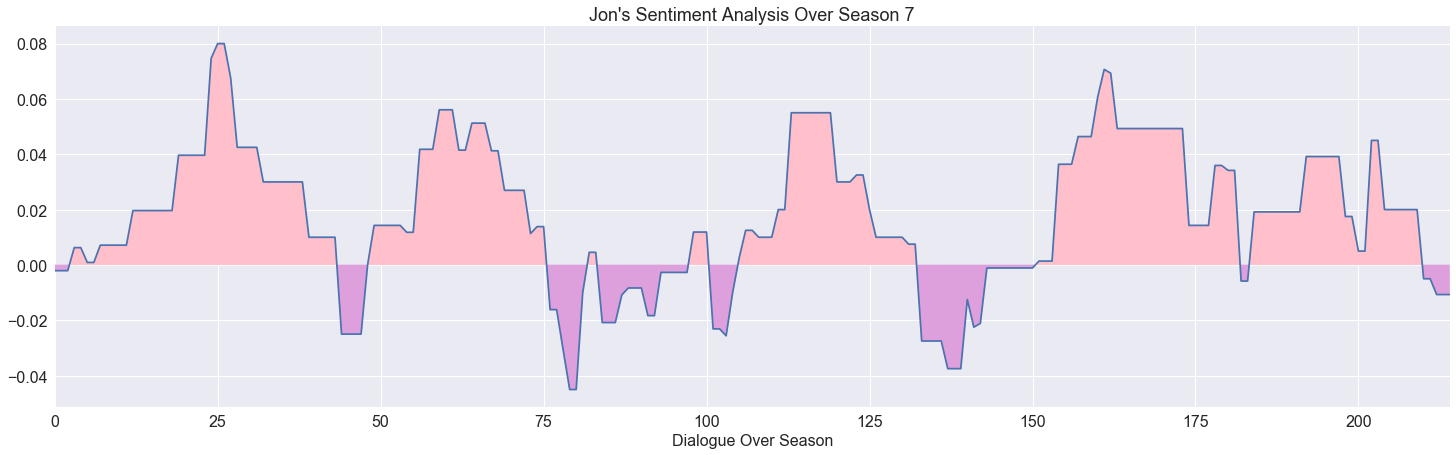

In [119]:
plt.figure(figsize=(16,14))

sentiment_runavg(Jon_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jon's Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Jon_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jon's Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Jon_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jon's Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Jon_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Jon's Sentiment Analysis Over Season 7", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

### Jorah

In [120]:
JorahS1 = season_one_sentiment.loc['Jorah Mormont']

Jorah_Sentiment_S1 = JorahS1.values.tolist()

In [121]:
JorahS5 = season_five_sentiment.loc['Jorah']

Jorah_Sentiment_S5 = JorahS5.values.tolist()

In [122]:
JorahS6 = season_six_sentiment.loc['Jorah']

Jorah_Sentiment_S6 = JorahS6.values.tolist()

In [123]:
JorahS7 = season_seven_sentiment.loc['Jorah']

Jorah_Sentiment_S7 = JorahS7.values.tolist()

In [124]:
Jorah_Polarity_S1 = polarity(Jorah_Sentiment_S1)
Jorah_Polarity_S1

[-0.05681818181818182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.2,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 -0.05,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [125]:
Jorah_Polarity_S5 = polarity(Jorah_Sentiment_S5)

In [126]:
Jorah_Polarity_S6 = polarity(Jorah_Sentiment_S6)

In [127]:
Jorah_Polarity_S7 = polarity(Jorah_Sentiment_S7)

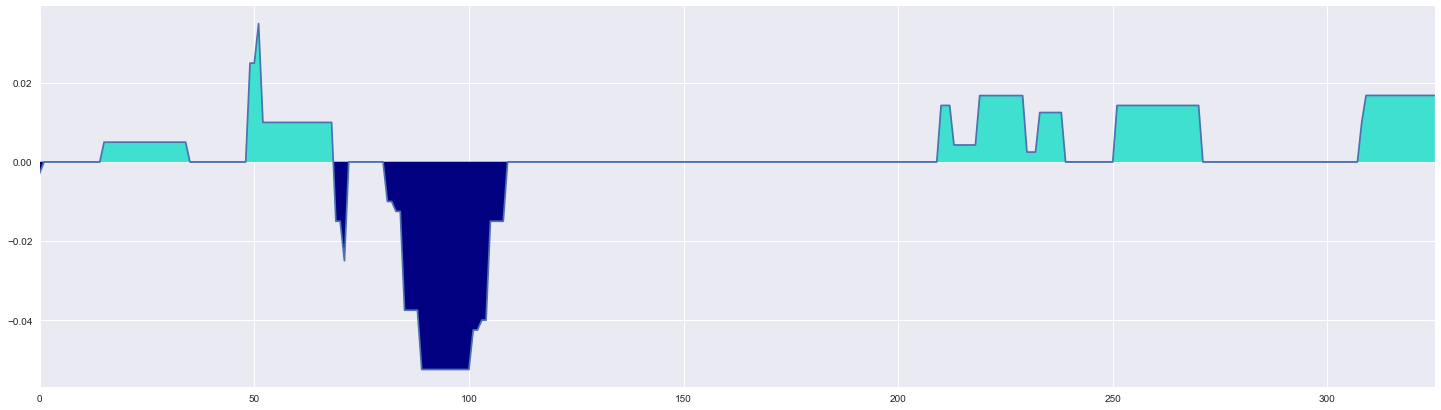

In [128]:
sentiment_runavg(Jorah_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

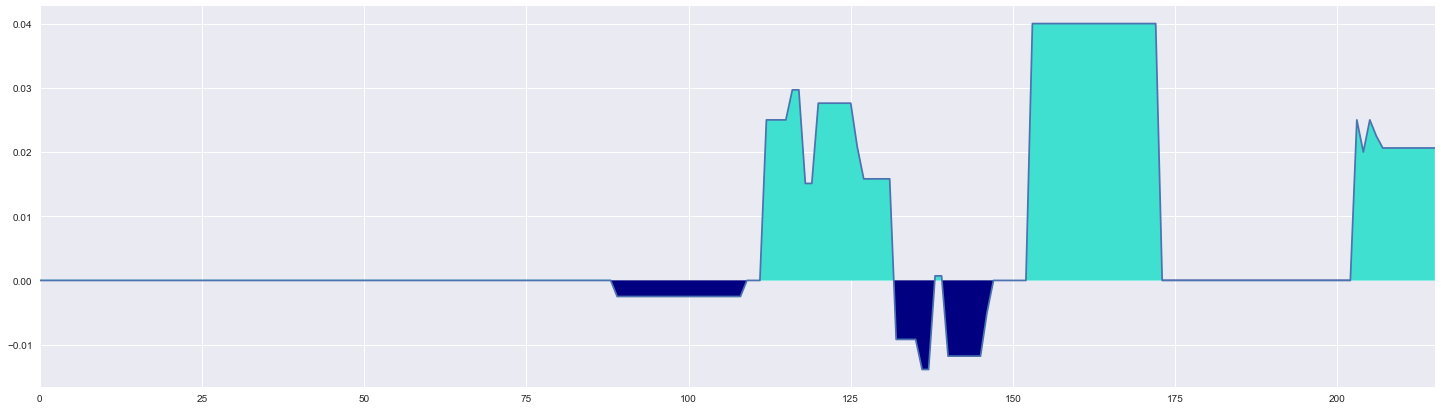

In [129]:
sentiment_runavg(Jorah_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

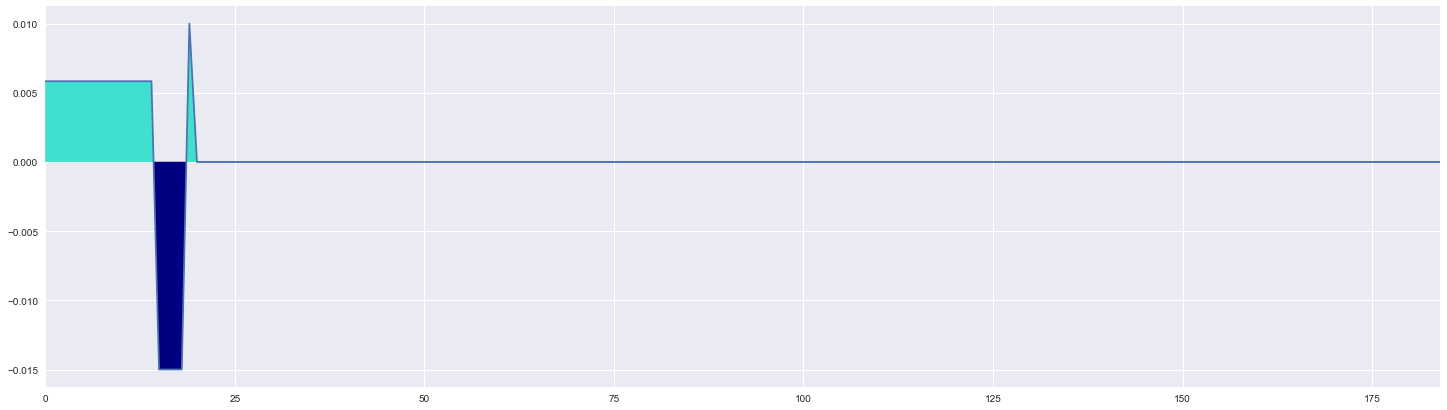

In [130]:
sentiment_runavg(Jorah_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

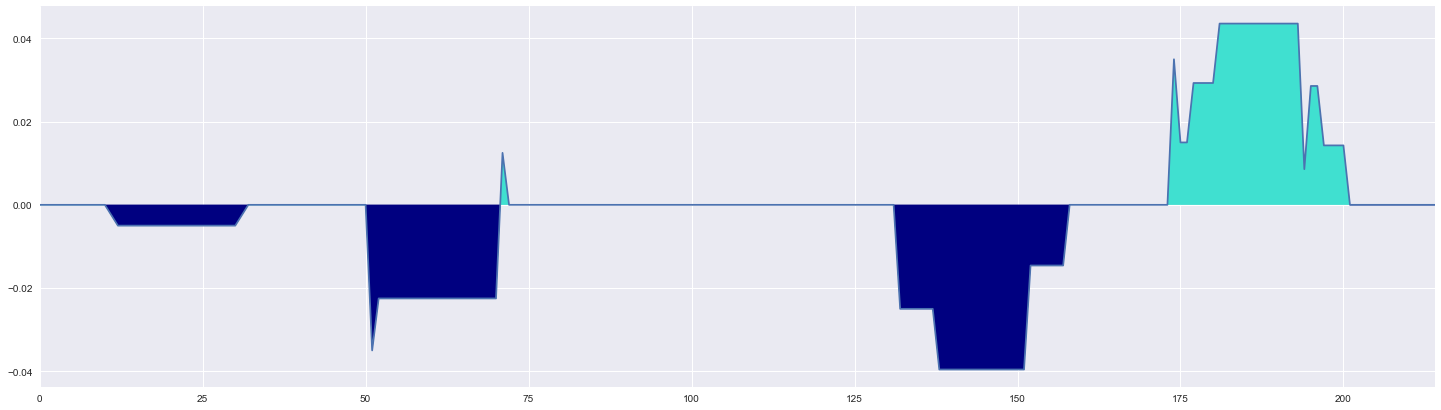

In [131]:
sentiment_runavg(Jorah_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Margaery

In [132]:
MargaeryS5 = season_five_sentiment.loc['Margaery']

Margaery_Sentiment_S5 = MargaeryS5.values.tolist()

In [133]:
MargaeryS6 = season_six_sentiment.loc['Margaery']

Margaery_Sentiment_S6 = MargaeryS6.values.tolist()

In [134]:
Margaery_Polarity_S5 = polarity(Margaery_Sentiment_S5)
Margaery_Polarity_S5

[-0.3,
 0.0,
 0.0,
 -0.6,
 0.0,
 0.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.8,
 0.16,
 1.0,
 0.0,
 0.6,
 0.0,
 0.0,
 0.35,
 0.2,
 0.0,
 -0.225,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.43333333333333335,
 0.0,
 0.0,
 0.0,
 0.

In [135]:
Margaery_Polarity_S6 = polarity(Margaery_Sentiment_S6)

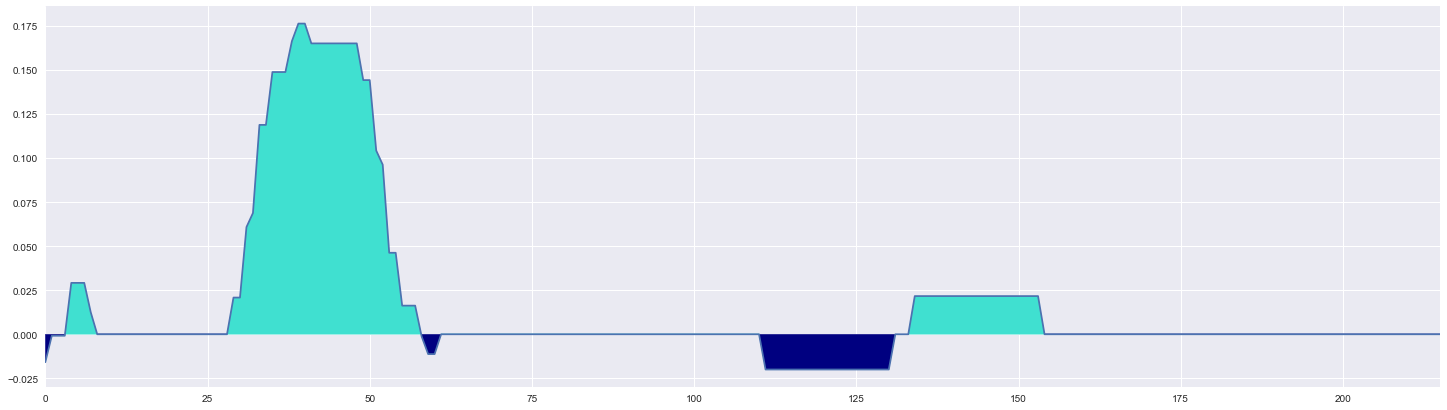

In [136]:
sentiment_runavg(Margaery_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

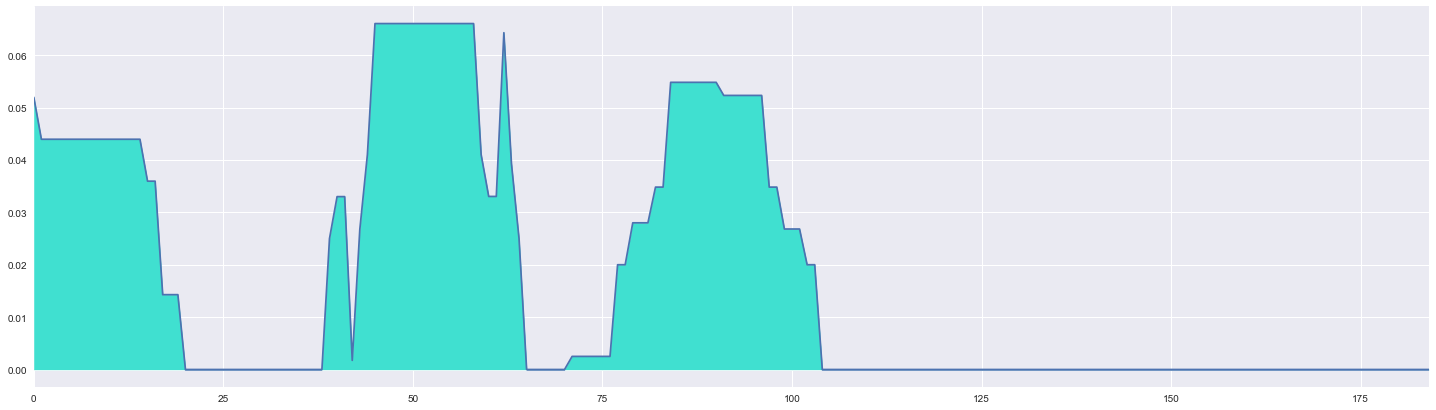

In [137]:
sentiment_runavg(Margaery_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

### Melisandre

In [138]:
MelisandreS5 = season_five_sentiment.loc['Melisandre']

Melisandre_Sentiment_S5 = MelisandreS5.values.tolist()

In [139]:
MelisandreS6 =season_six_sentiment.loc['Melisandre']

Melisandre_Sentiment_S6 = MelisandreS6.values.tolist()

In [140]:
MelisandreS7 = season_seven_sentiment.loc['Melisandre']

Melisandre_Sentiment_S7 = MelisandreS7.values.tolist()

In [141]:
Melisandre_Polarity_S5 = polarity(Melisandre_Sentiment_S5)
Melisandre_Polarity_S5

[0.2,
 0.0,
 0.0,
 0.1,
 0.375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [142]:
Melisandre_Polarity_S6 = polarity(Melisandre_Sentiment_S6)

In [143]:
Melisandre_Polarity_S7 = polarity(Melisandre_Sentiment_S7)

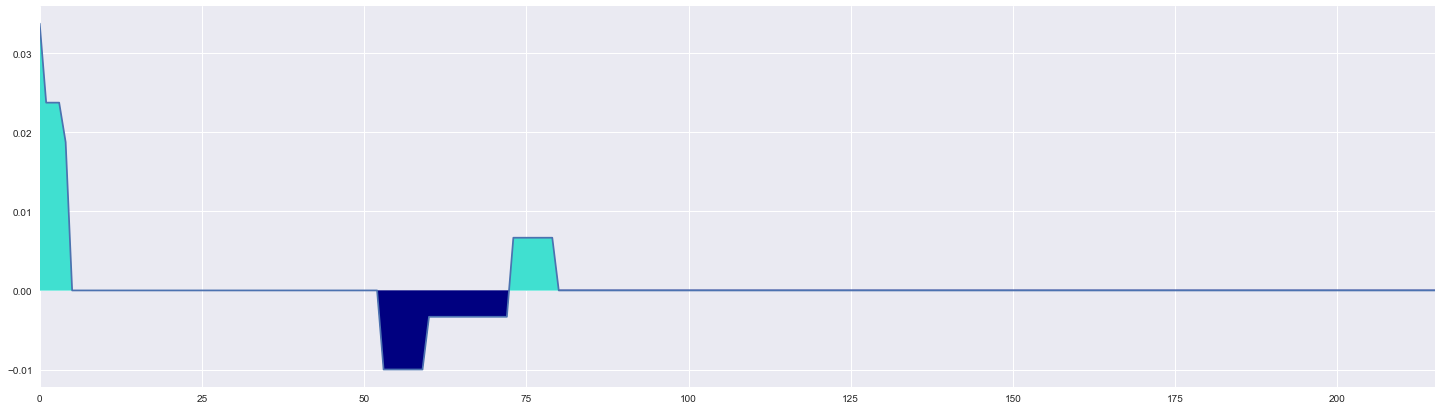

In [144]:
sentiment_runavg(Melisandre_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

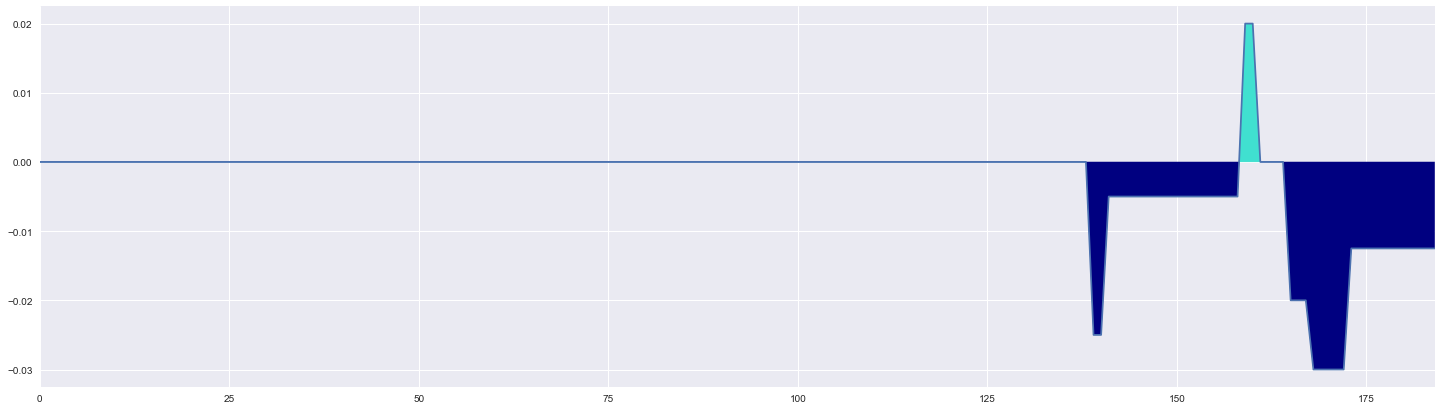

In [145]:
sentiment_runavg(Melisandre_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

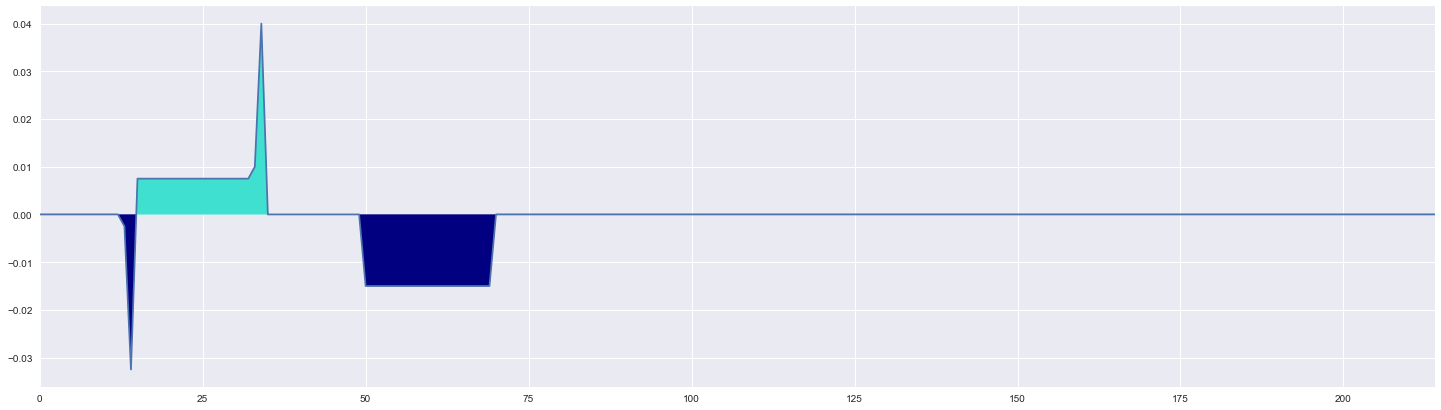

In [146]:
sentiment_runavg(Melisandre_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Missandei

In [147]:
MissandeiS5 = season_five_sentiment.loc['Missandei']

Missandei_Sentiment_S5 = MissandeiS5.values.tolist()

In [148]:
MissandeiS6 =season_six_sentiment.loc['Missandei']

Missandei_Sentiment_S6 = MissandeiS6.values.tolist()

In [149]:
MissandeiS7 = season_seven_sentiment.loc['Missandei']

Missandei_Sentiment_S7 = MissandeiS7.values.tolist()

In [150]:
Missandei_Polarity_S5 = polarity(Missandei_Sentiment_S5)
Missandei_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [151]:
Missandei_Polarity_S6 = polarity(Missandei_Sentiment_S6)

In [152]:
Missandei_Polarity_S7 = polarity(Missandei_Sentiment_S7)

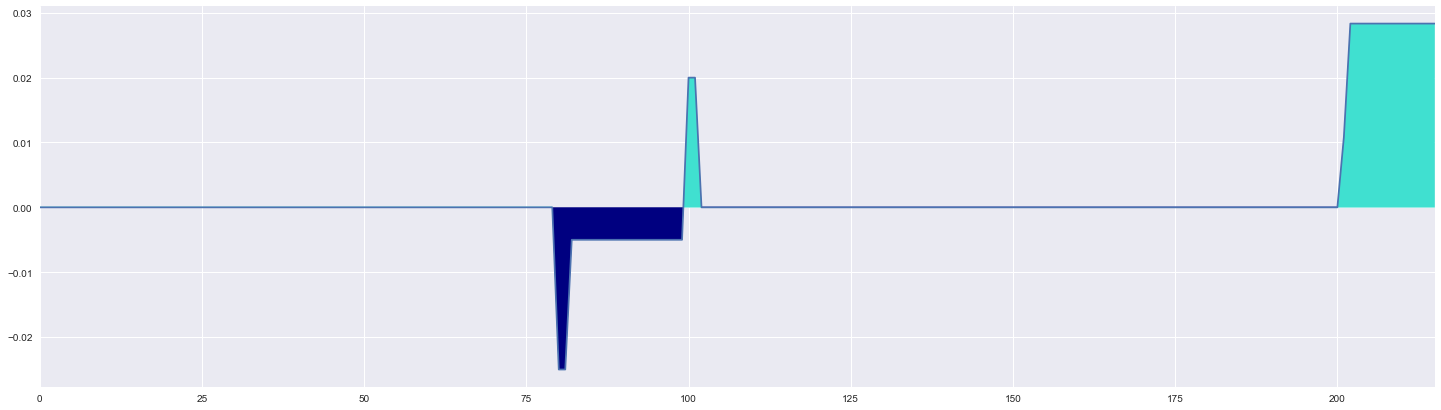

In [153]:
sentiment_runavg(Missandei_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

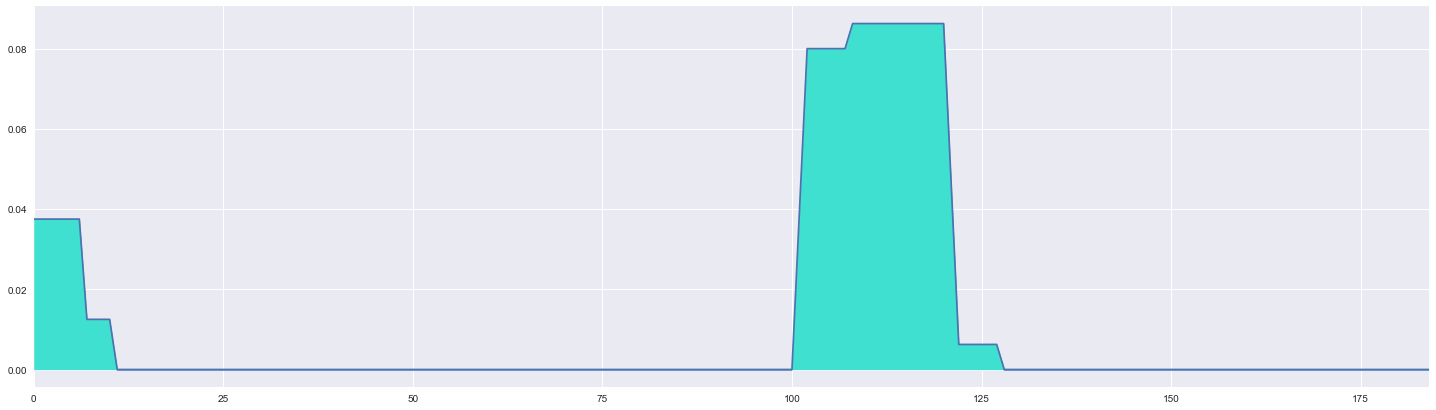

In [154]:
sentiment_runavg(Missandei_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

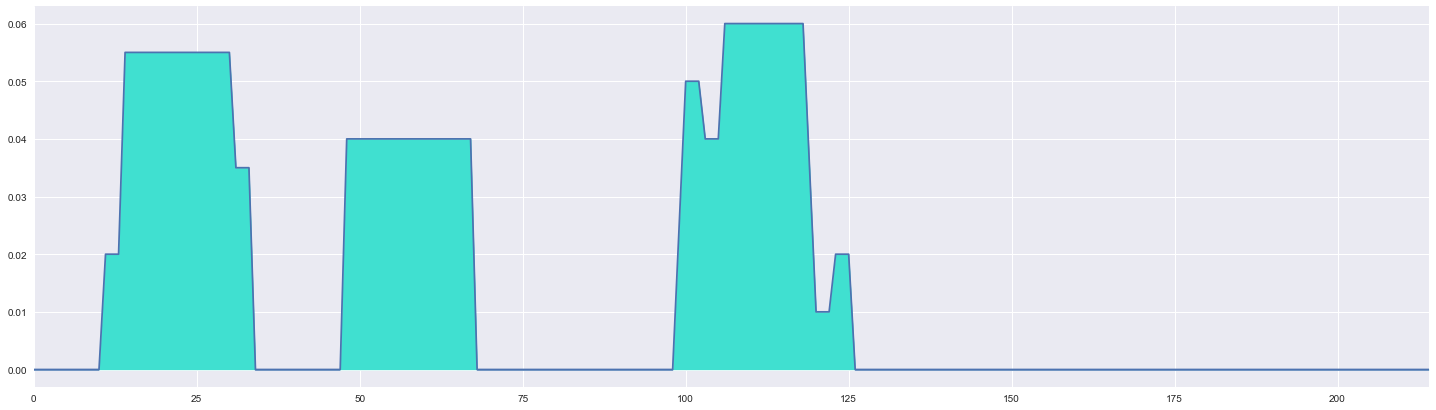

In [155]:
sentiment_runavg(Missandei_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Olenna

In [156]:
OlennaS5 = season_five_sentiment.loc['Olenna']

Olenna_Sentiment_S5 = OlennaS5.values.tolist()

In [157]:
OlennaS6 =season_six_sentiment.loc['Olenna']

Olenna_Sentiment_S6 = OlennaS6.values.tolist()

In [158]:
OlennaS7 = season_seven_sentiment.loc['Olenna']

Olenna_Sentiment_S7 = OlennaS7.values.tolist()

In [159]:
Olenna_Polarity_S5 = polarity(Olenna_Sentiment_S5)
Olenna_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.45,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1666

In [160]:
Olenna_Polarity_S6 = polarity(Olenna_Sentiment_S6)

In [161]:
Olenna_Polarity_S7 = polarity(Olenna_Sentiment_S7)

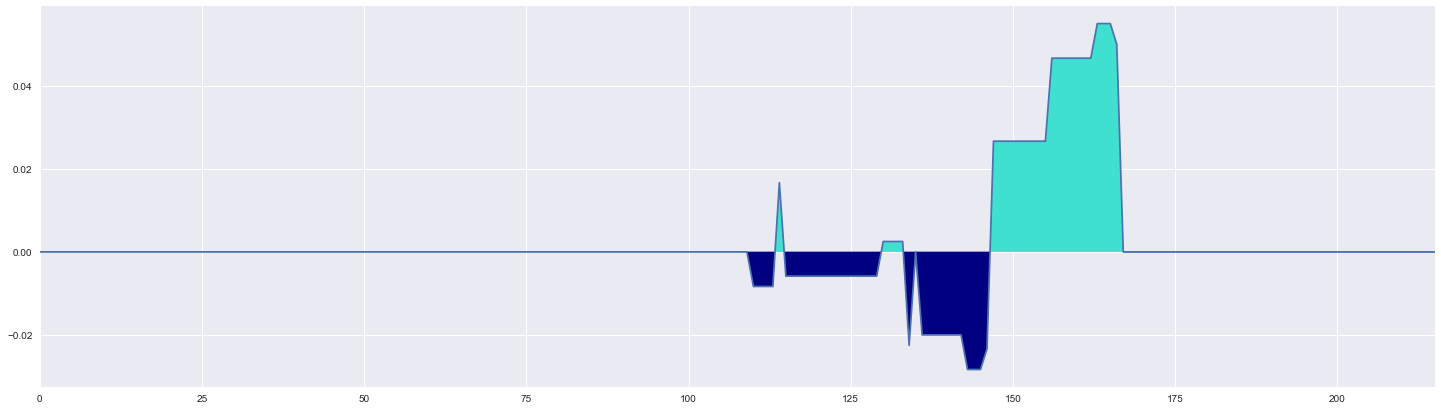

In [162]:
sentiment_runavg(Olenna_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

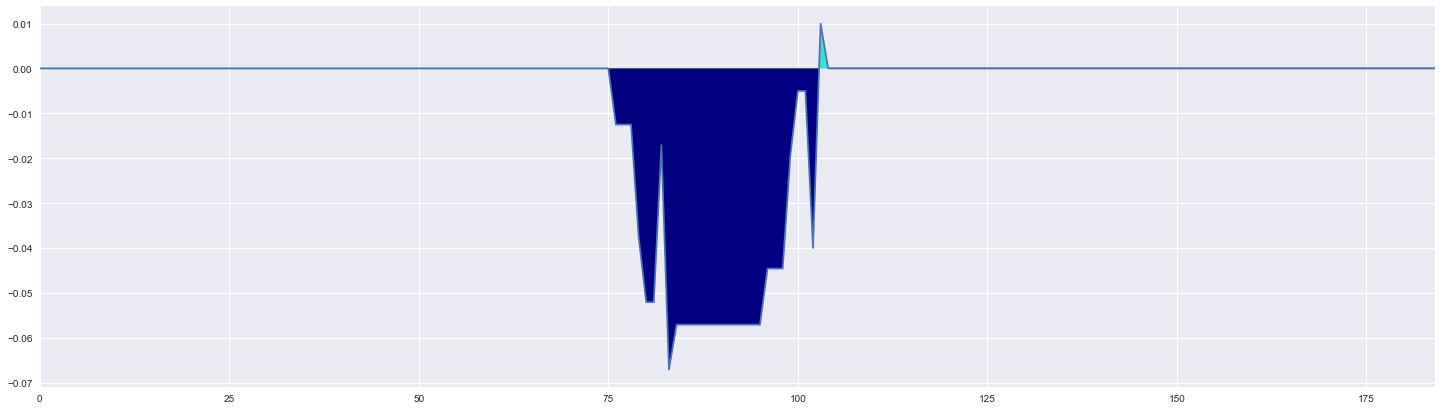

In [163]:
sentiment_runavg(Olenna_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

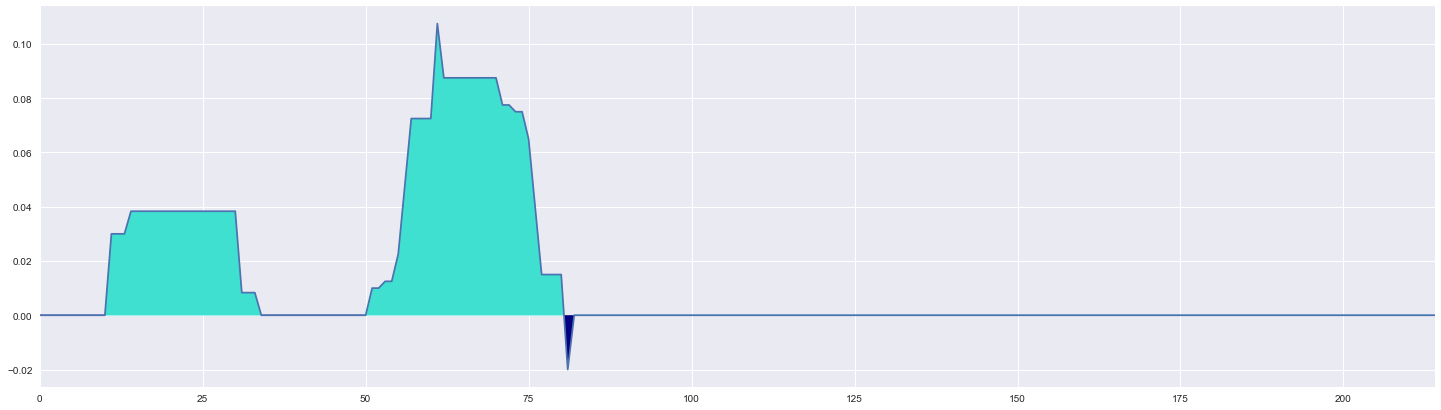

In [164]:
sentiment_runavg(Olenna_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Ramsay

In [165]:
RamsayS5 = season_five_sentiment.loc['Ramsay']

Ramsay_Sentiment_S5 = RamsayS5.values.tolist()

In [166]:
RamsayS6 =season_six_sentiment.loc['Ramsay']

Ramsay_Sentiment_S6 = RamsayS6.values.tolist()

In [167]:
Ramsay_Polarity_S5 = polarity(Ramsay_Sentiment_S5)
Ramsay_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 -0.5,
 0.0,
 1.0,
 0.3333333333333333,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.10000000000000002,
 0.0,
 0.0,
 0.5,
 0.7,
 0.0,
 0.0,
 -0.6999999999999998,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [168]:
Ramsay_Polarity_S6 = polarity(Ramsay_Sentiment_S6)

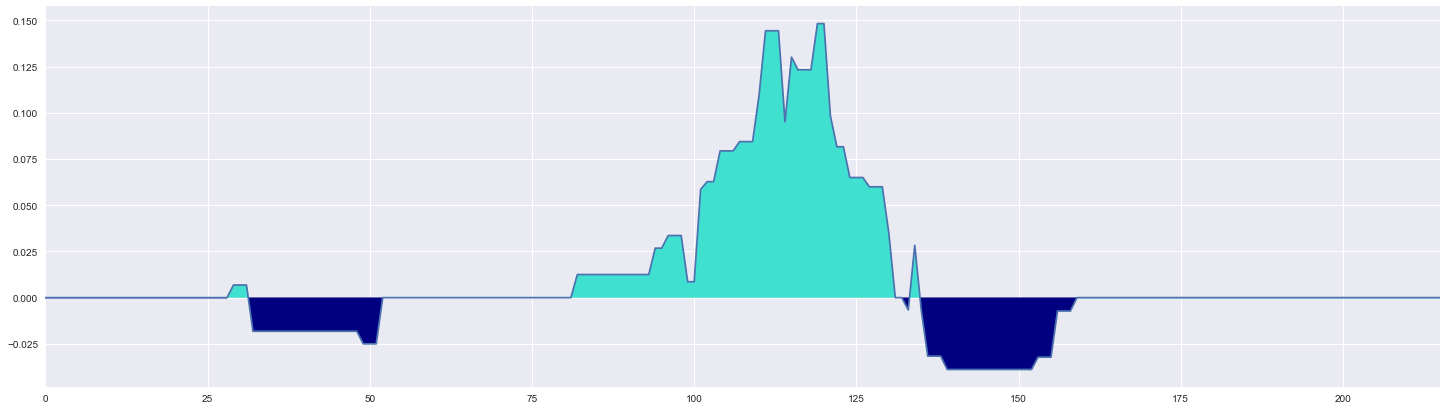

In [169]:
sentiment_runavg(Ramsay_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

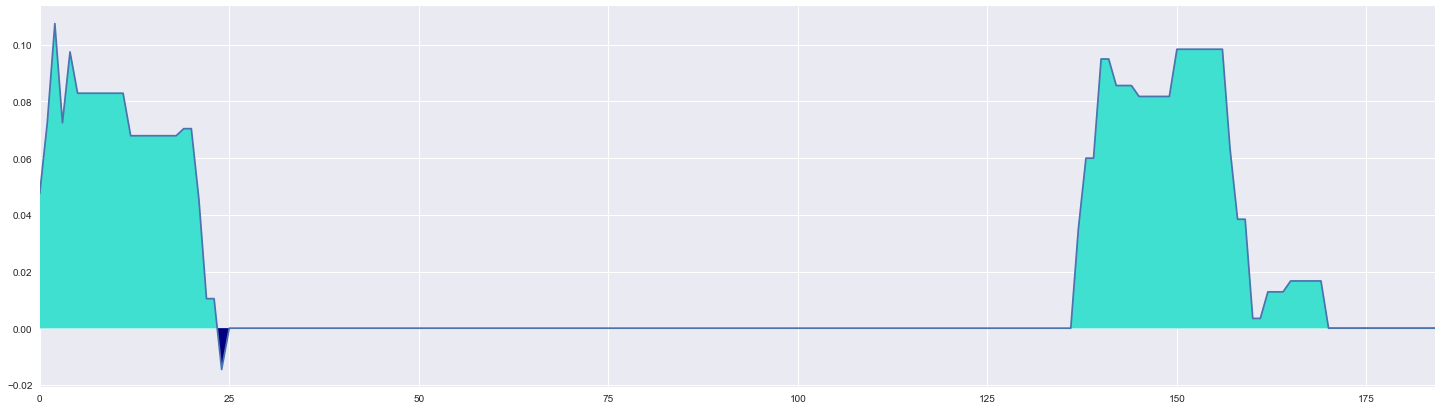

In [170]:
sentiment_runavg(Ramsay_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

### Robb

In [171]:
RobbS1 = season_one_sentiment.loc['Robb Stark']

Robb_Sentiment_S1 = RobbS1.values.tolist()

In [172]:
Robb_Polarity_S1 = polarity(Robb_Sentiment_S1)
Robb_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

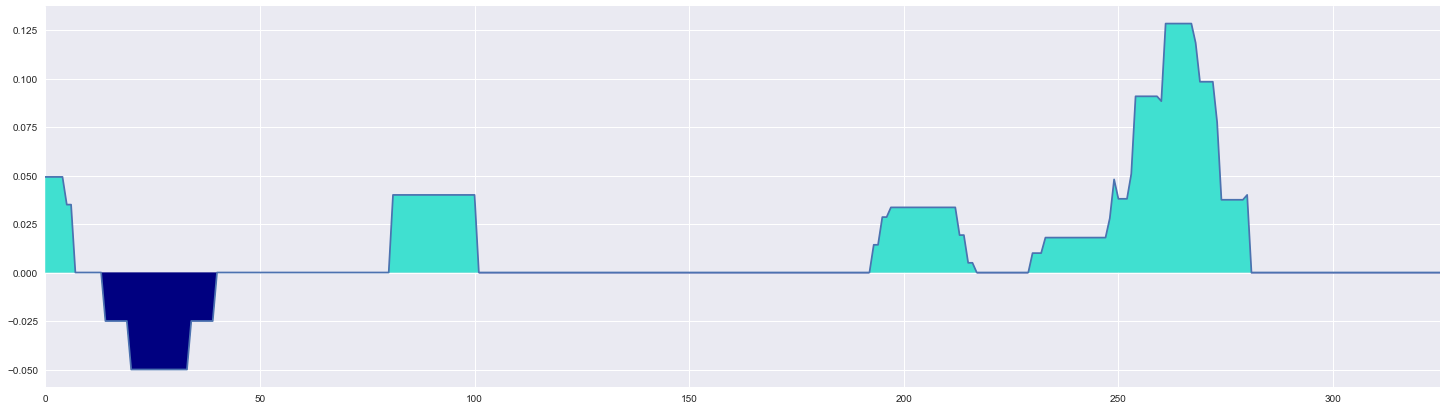

In [173]:
sentiment_runavg(Robb_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Sam

In [174]:
SamS1 = season_one_sentiment.loc['Samwell Tarly']

Sam_Sentiment_S1 = SamS1.values.tolist()

In [175]:
SamS5 = season_five_sentiment.loc['Sam']

Sam_Sentiment_S5 = SamS5.values.tolist()

In [176]:
SamS6 = season_six_sentiment.loc['Sam']

Sam_Sentiment_S6 = SamS6.values.tolist()

In [177]:
SamS7 = season_seven_sentiment.loc['Sam']

Sam_Sentiment_S7 = SamS7.values.tolist()

In [178]:
Sam_Polarity_S1 = polarity(Sam_Sentiment_S1)
Sam_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857142857142857,
 0.2857142857142857,
 0.16,
 0.0,
 0.5,
 -0.34375,
 -0.5,
 0.0,
 -0.2916666666666667,
 -0.3,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [179]:
Sam_Polarity_S5 = polarity(Sam_Sentiment_S5)

In [180]:
Sam_Polarity_S6 = polarity(Sam_Sentiment_S6)

In [181]:
Sam_Polarity_S7 = polarity(Sam_Sentiment_S7)

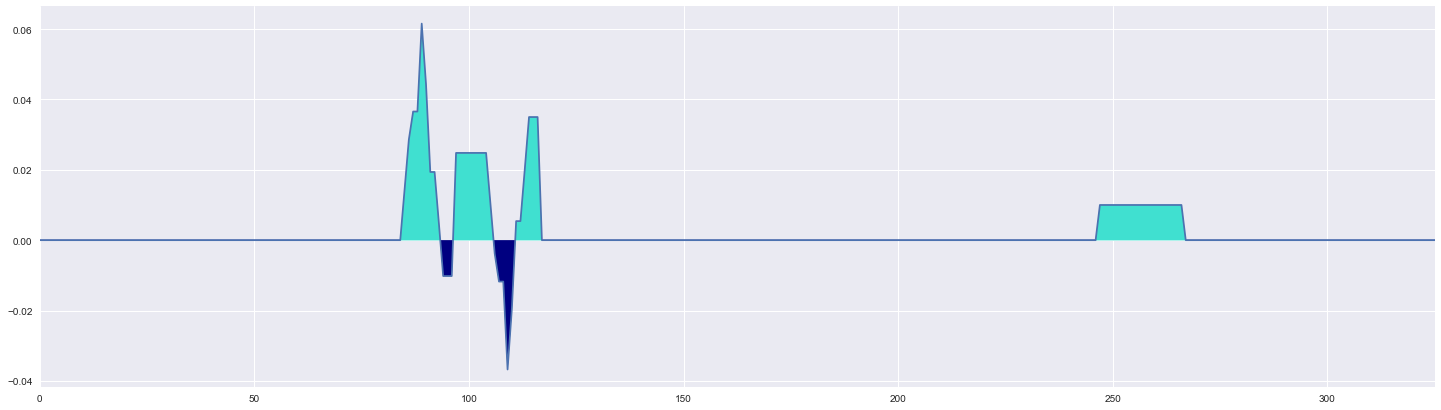

In [182]:
sentiment_runavg(Sam_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

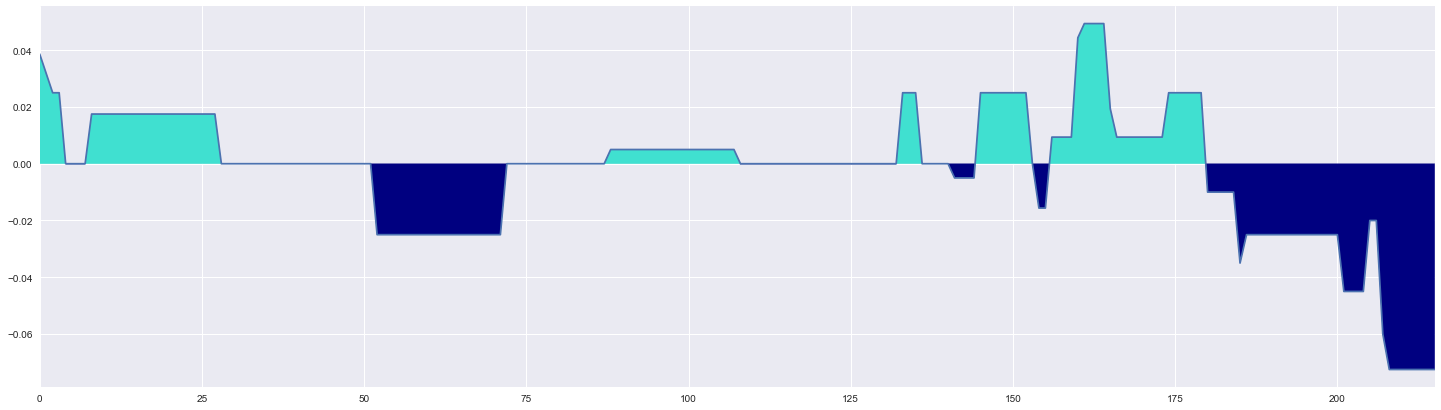

In [183]:
sentiment_runavg(Sam_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

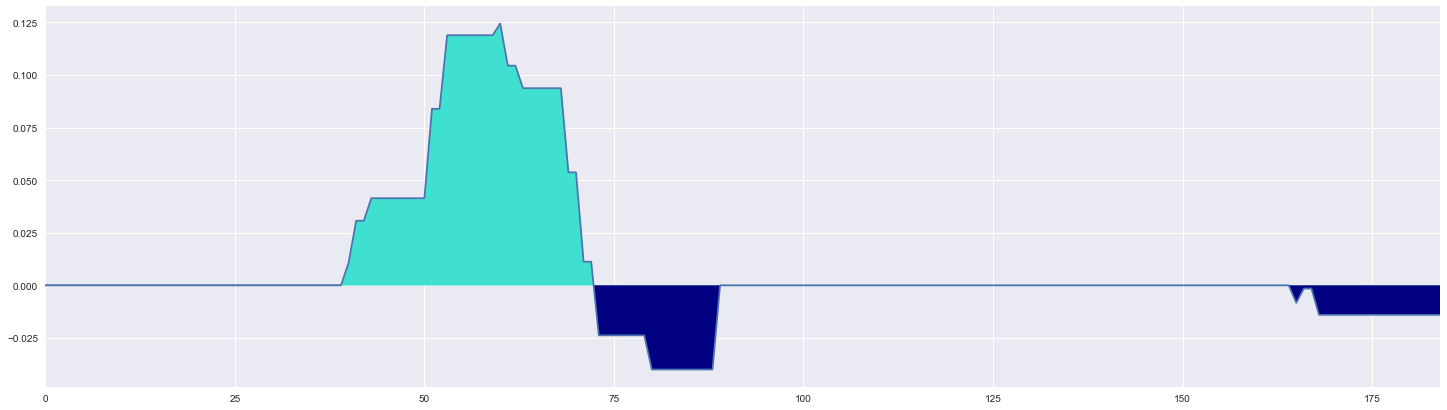

In [184]:
sentiment_runavg(Sam_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

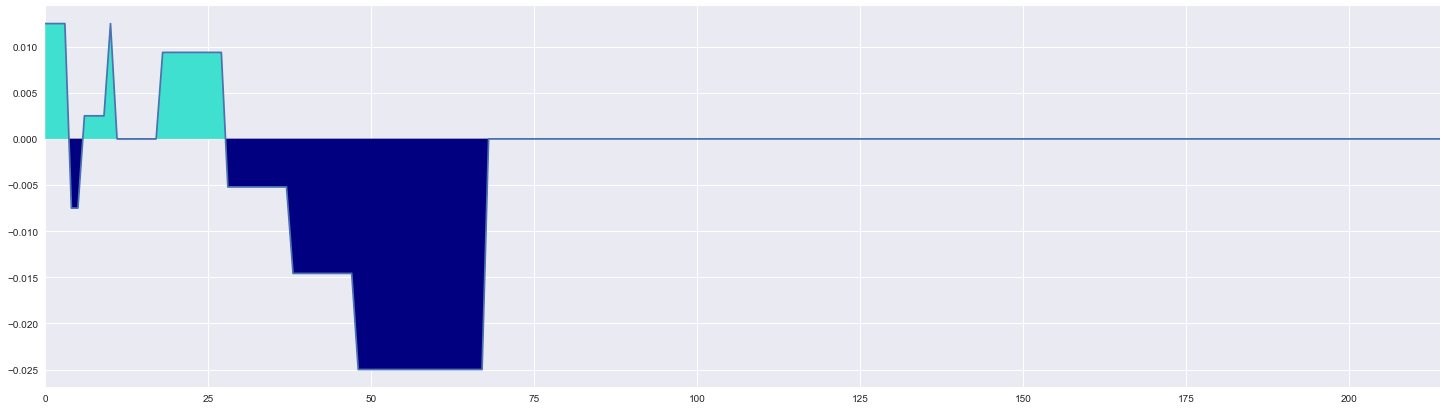

In [185]:
sentiment_runavg(Sam_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Sansa

In [35]:
SansaS1 = season_one_sentiment.loc['Sansa Stark']

Sansa_Sentiment_S1 = SansaS1.values.tolist()

In [36]:
SansaS5 = season_five_sentiment.loc['Sansa']

Sansa_Sentiment_S5 = SansaS5.values.tolist()

In [37]:
SansaS6 = season_six_sentiment.loc['Sansa']

Sansa_Sentiment_S6 = SansaS6.values.tolist()

In [38]:
SansaS7 = season_seven_sentiment.loc['Sansa']

Sansa_Sentiment_S7 = SansaS7.values.tolist()

In [39]:
Sansa_Polarity_S1 = polarity(Sansa_Sentiment_S1)
Sansa_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 -0.8,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.8,
 0.0,
 0.0,
 -1.0,
 -0.625,
 -0.2,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [40]:
Sansa_Polarity_S5 = polarity(Sansa_Sentiment_S5)

In [41]:
Sansa_Polarity_S6 = polarity(Sansa_Sentiment_S6)

In [42]:
Sansa_Polarity_S7 = polarity(Sansa_Sentiment_S7)

(array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 9 Text yticklabel objects>)

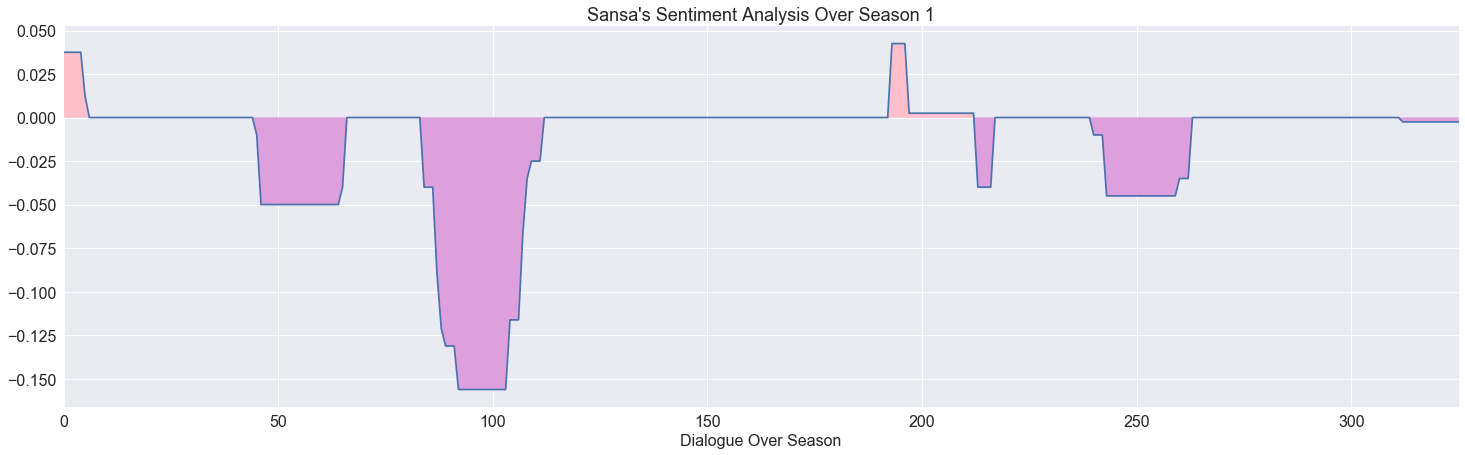

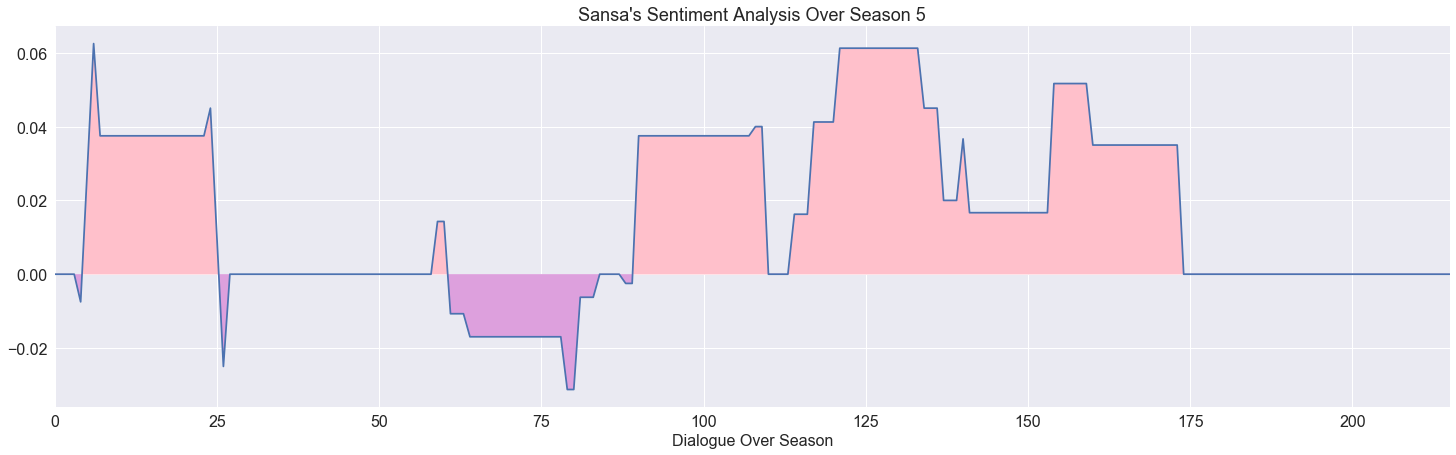

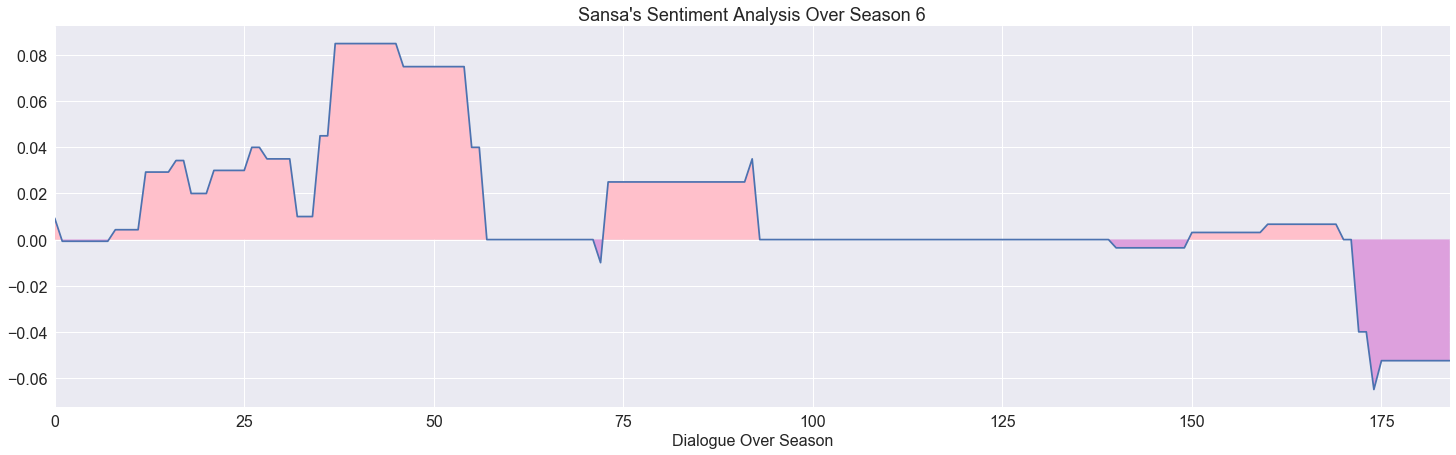

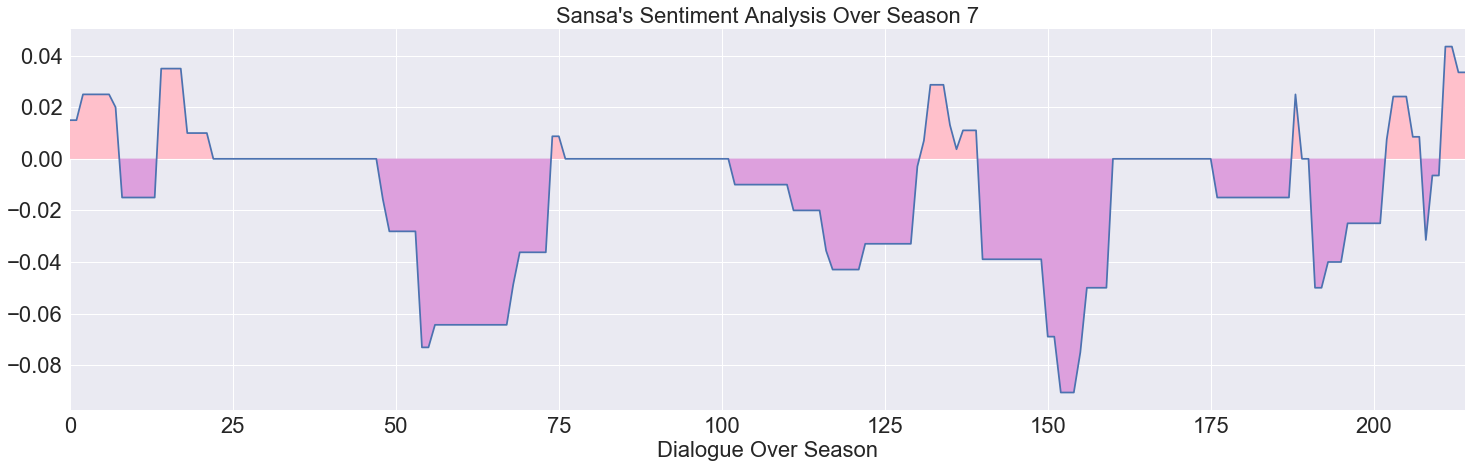

In [43]:
plt.figure(figsize=(16,14))

sentiment_runavg(Sansa_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Sansa's Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Sansa_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Sansa's Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Sansa_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Sansa's Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Sansa_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Sansa's Sentiment Analysis Over Season 7", fontsize=22)
plt.xlabel("Dialogue Over Season", fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

### Shireen

In [195]:
ShireenS5 = season_five_sentiment.loc['Shireen']

Shireen_Sentiment_S5 = ShireenS5.values.tolist()

In [196]:
Shireen_Polarity_S5 = polarity(Shireen_Sentiment_S5)
Shireen_Polarity_S5

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4928571428571428,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

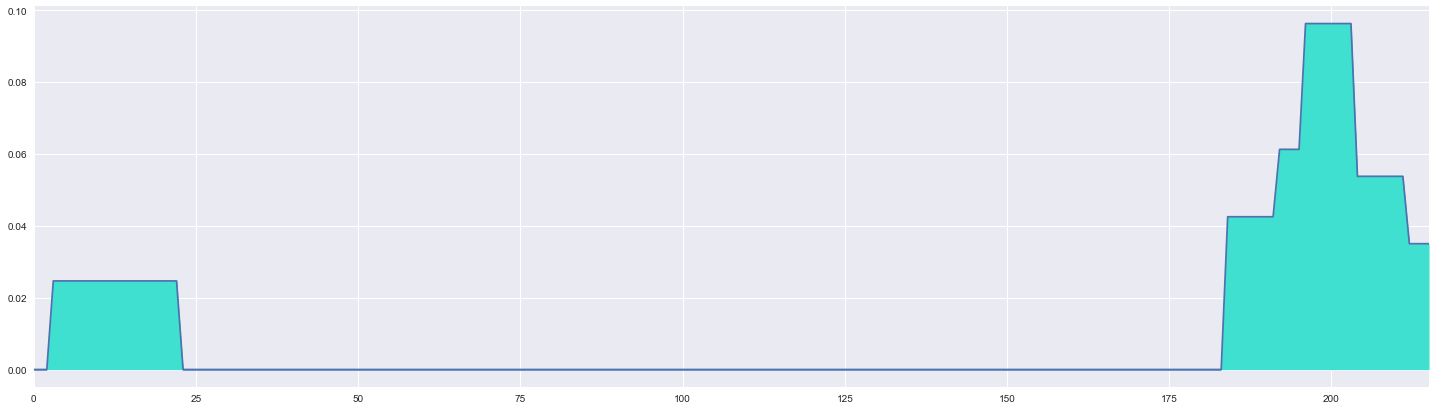

In [197]:
sentiment_runavg(Shireen_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

### Stannis

In [198]:
StannisS5 = season_five_sentiment.loc['Stannis']

Stannis_Sentiment_S5 = StannisS5.values.tolist()

In [199]:
Stannis_Polarity_S5 = polarity(Stannis_Sentiment_S5)
Stannis_Polarity_S5

[0.0,
 0.0,
 0.0,
 -0.5,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.16666666666666669,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,


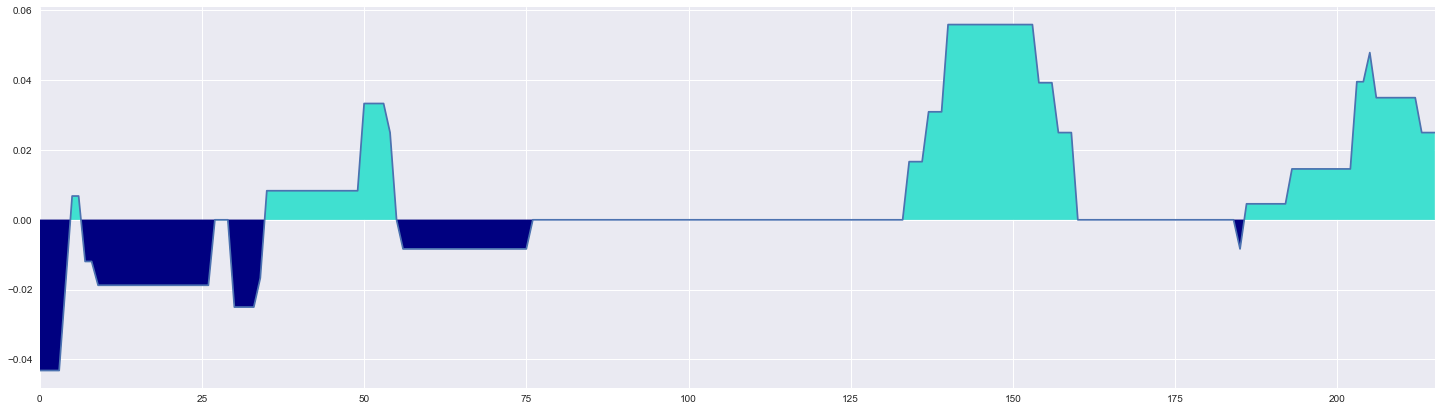

In [200]:
sentiment_runavg(Stannis_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

### Theon

In [201]:
TheonS1 = season_one_sentiment.loc['Theon Greyjoy']

Theon_Sentiment_S1 = TheonS1.values.tolist()

In [202]:
TheonS5 = season_five_sentiment.loc['Theon']

Theon_Sentiment_S5 = TheonS5.values.tolist()

In [203]:
TheonS6 = season_six_sentiment.loc['Theon']

Theon_Sentiment_S6 = TheonS6.values.tolist()

In [204]:
TheonS7 = season_seven_sentiment.loc['Theon']

Theon_Sentiment_S7 = TheonS7.values.tolist()

In [205]:
Theon_Polarity_S1 = polarity(Theon_Sentiment_S1)
Theon_Polarity_S1

[0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [206]:
Theon_Polarity_S5 = polarity(Theon_Sentiment_S5)

In [207]:
Theon_Polarity_S6 = polarity(Theon_Sentiment_S6)

In [208]:
Theon_Polarity_S7 = polarity(Theon_Sentiment_S7)

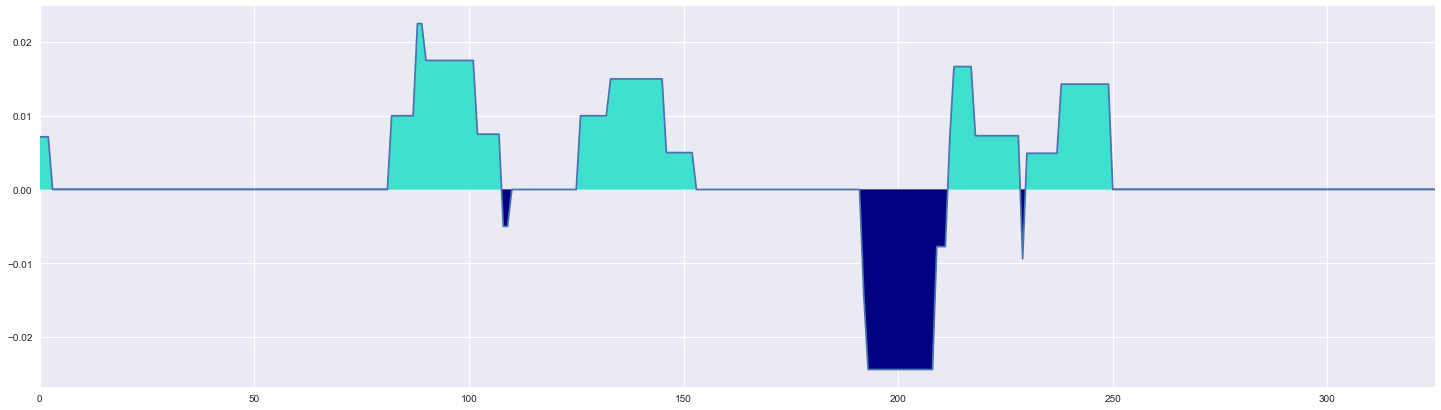

In [209]:
sentiment_runavg(Theon_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

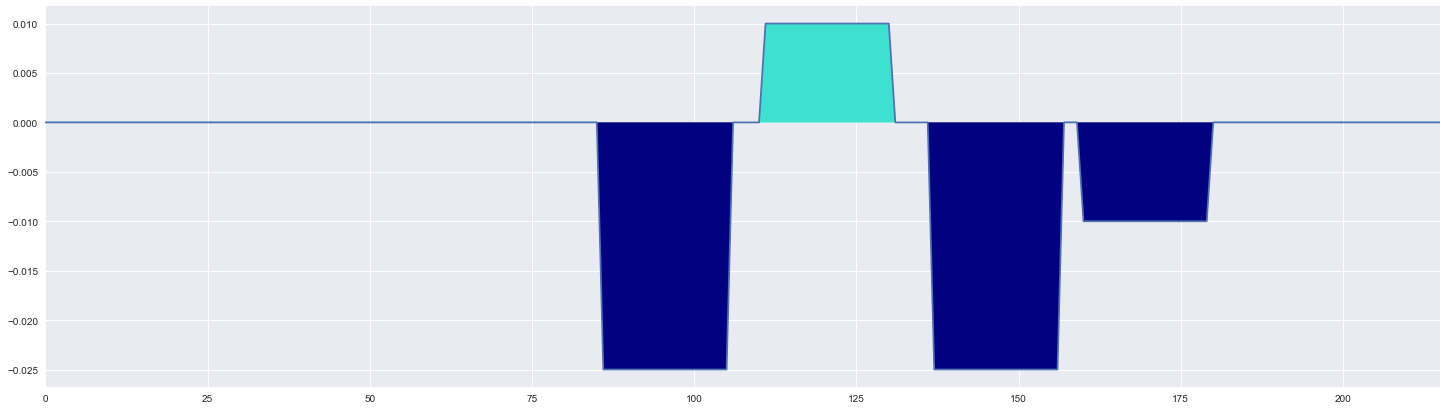

In [210]:
sentiment_runavg(Theon_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

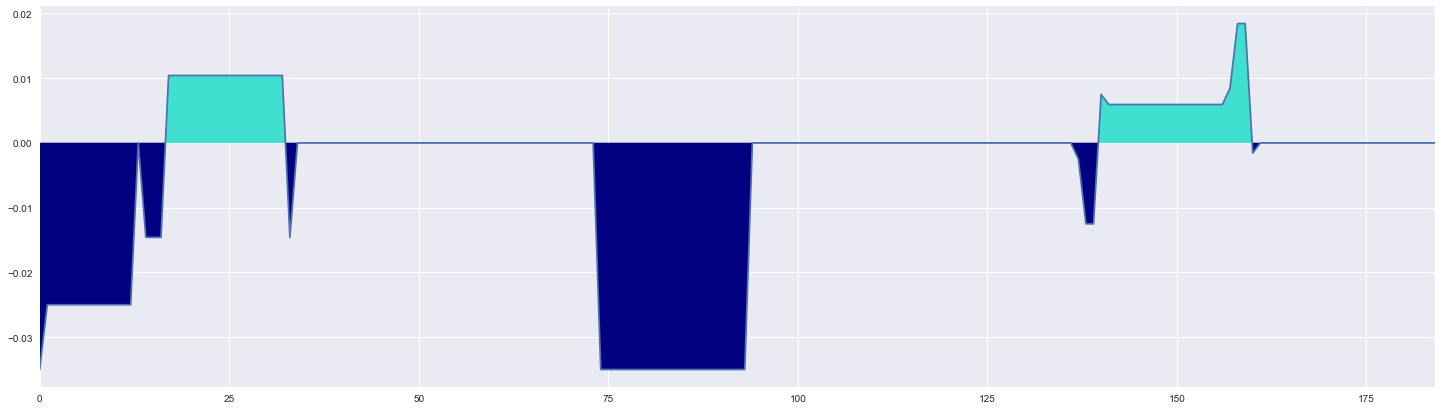

In [211]:
sentiment_runavg(Theon_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

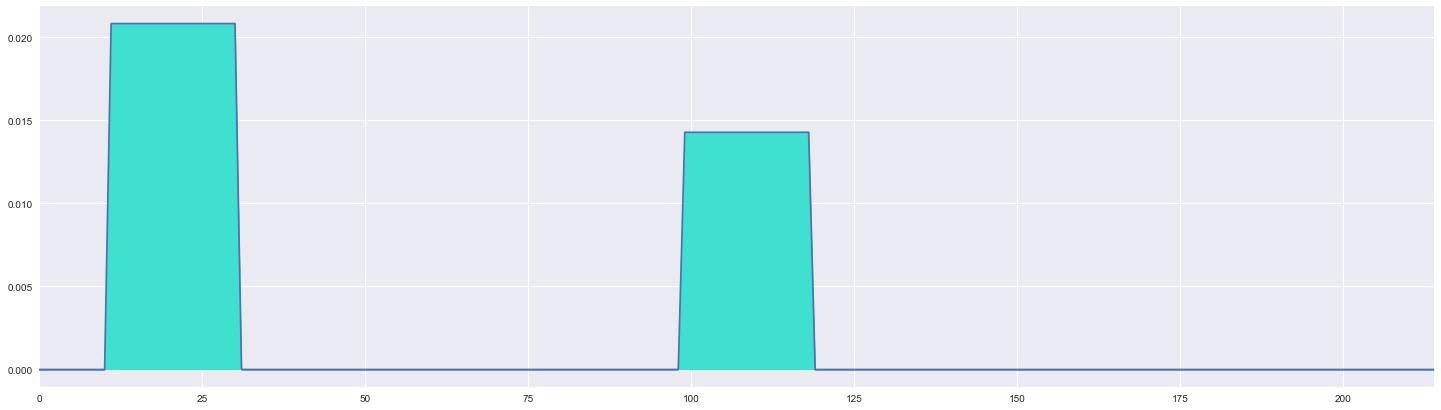

In [212]:
sentiment_runavg(Theon_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

### Tyrion

In [213]:
TyrionS1 = season_one_sentiment.loc['Tyrion Lannister']

Tyrion_Sentiment_S1 = TyrionS1.values.tolist()

In [214]:
TyrionS5 = season_five_sentiment.loc['Tyrion']

Tyrion_Sentiment_S5 = TyrionS5.values.tolist()

In [215]:
TyrionS6 = season_six_sentiment.loc['Tyrion']

Tyrion_Sentiment_S6 = TyrionS6.values.tolist()

In [216]:
TyrionS7 = season_seven_sentiment.loc['Tyrion']

Tyrion_Sentiment_S7 = TyrionS7.values.tolist()

In [217]:
Tyrion_Polarity_S1 = polarity(Tyrion_Sentiment_S1)
Tyrion_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.16666666666666666,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.7,
 0.05,
 0.13636363636363635,
 0.21428571428571427,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 5.551115123125783e-17,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.125,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 0.0,
 -0.6,
 0.0,
 0.0,
 0.4375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21111111111111114,
 0.0,
 0.0,
 0.35,
 -0.1,
 0.6499999999999999,
 -0.30000000000000004,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.0,
 0.4166666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [218]:
Tyrion_Polarity_S5 = polarity(Tyrion_Sentiment_S5)

In [219]:
Tyrion_Polarity_S6 = polarity(Tyrion_Sentiment_S6)

In [220]:
Tyrion_Polarity_S7 = polarity(Tyrion_Sentiment_S7)

(array([-0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
         0.1  ,  0.125,  0.15 ]), <a list of 11 Text yticklabel objects>)

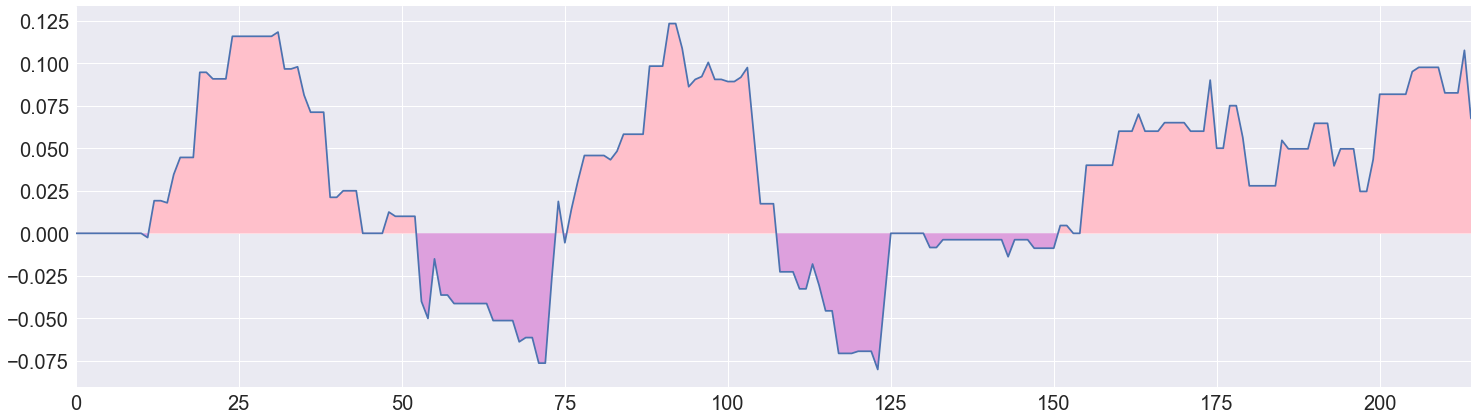

In [221]:
plt.figure(figsize=(16,14))
sentiment_runavg(Tyrion_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
         0.1  ,  0.125,  0.15 ]), <a list of 11 Text yticklabel objects>)

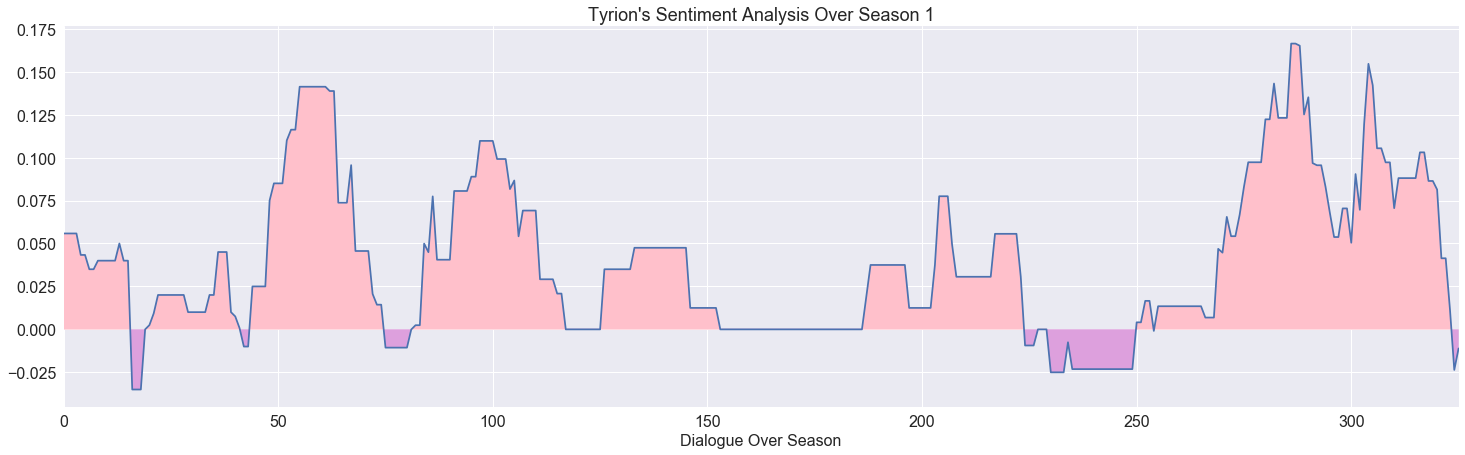

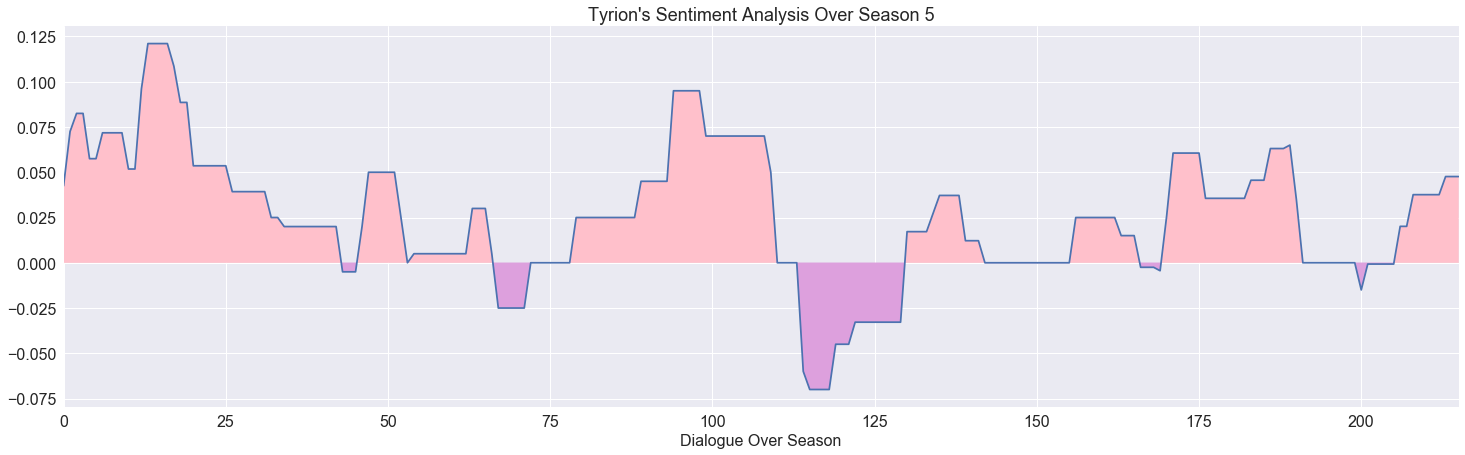

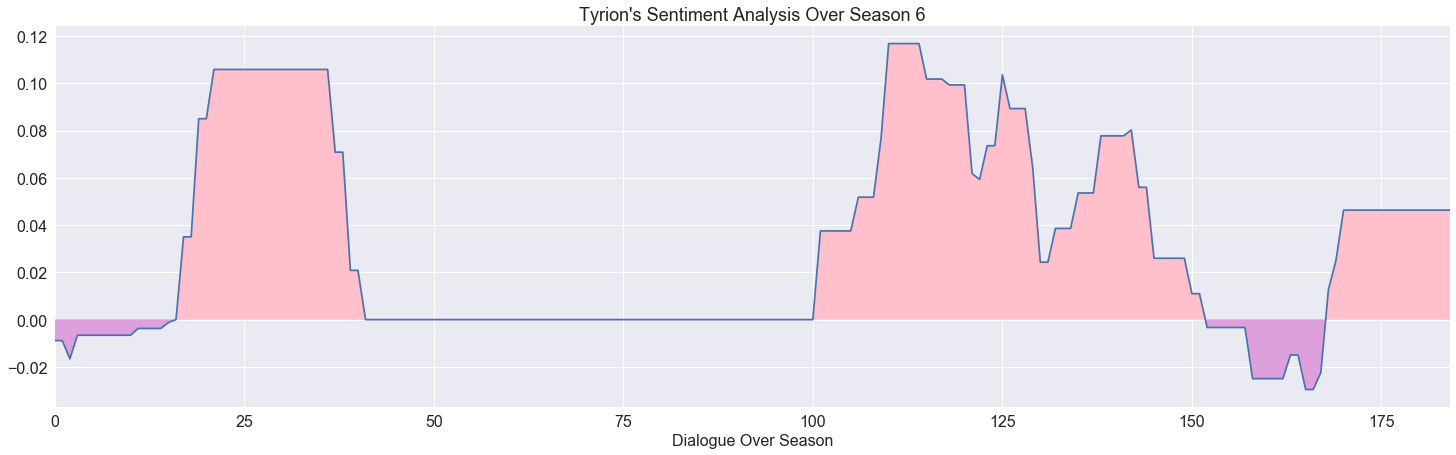

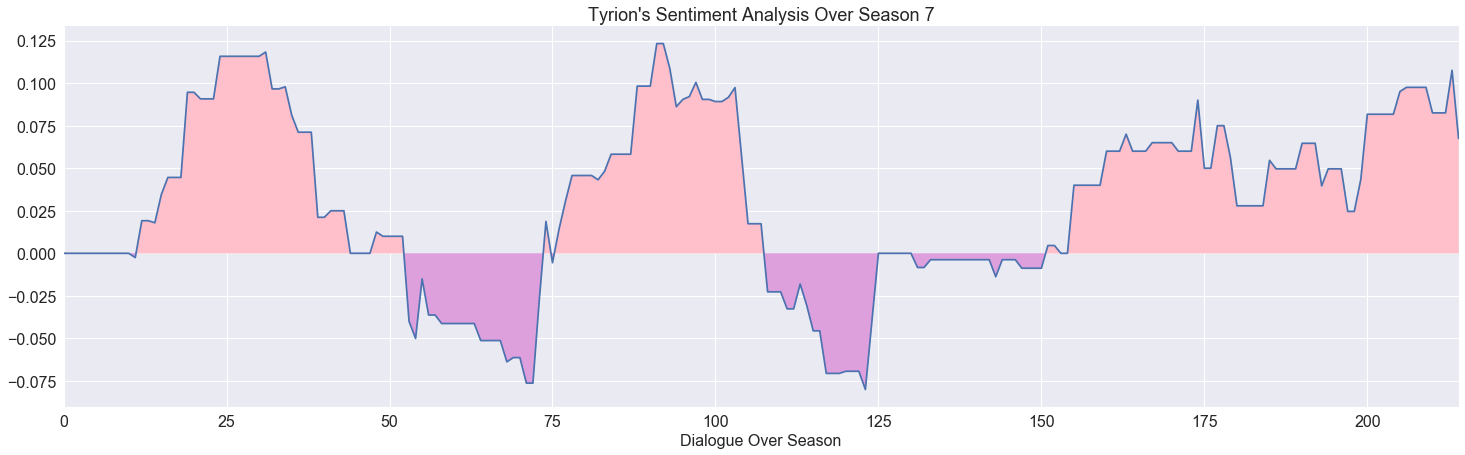

In [222]:
plt.figure(figsize=(16,14))

sentiment_runavg(Tyrion_Polarity_S1, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Tyrion's Sentiment Analysis Over Season 1", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Tyrion_Polarity_S5, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Tyrion's Sentiment Analysis Over Season 5", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Tyrion_Polarity_S6, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Tyrion's Sentiment Analysis Over Season 6", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sentiment_runavg(Tyrion_Polarity_S7, runavg=20, color_pos='pink', color_neg='plum')
plt.title("Tyrion's Sentiment Analysis Over Season 7", fontsize=18)
plt.xlabel("Dialogue Over Season", fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

### Tywin

In [223]:
TywinS1 = season_one_sentiment.loc['Tywin Lannister']

Tywin_Sentiment_S1 = TywinS1.values.tolist()

In [224]:
Tywin_Polarity_S1 = polarity(Tywin_Sentiment_S1)
Tywin_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

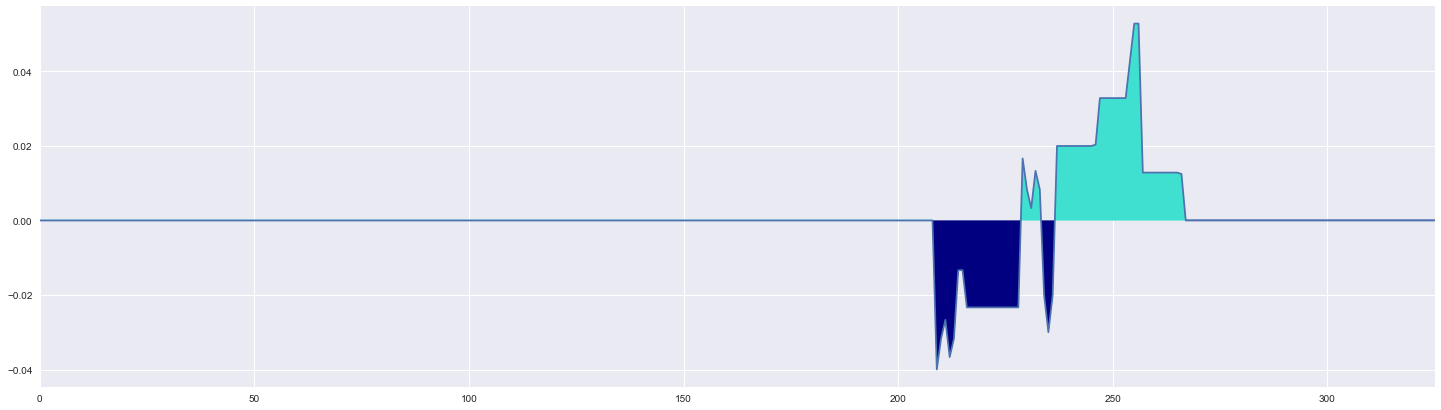

In [225]:
sentiment_runavg(Tywin_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

### Varys

In [226]:
VarysS1 = season_one_sentiment.loc['Varys']

Varys_Sentiment_S1 = VarysS1.values.tolist()

In [227]:
VarysS5 = season_five_sentiment.loc['Varys']

Varys_Sentiment_S5 = VarysS5.values.tolist()

In [228]:
VarysS6 = season_six_sentiment.loc['Varys']

Varys_Sentiment_S6 = VarysS6.values.tolist()

In [229]:
VarysS7 = season_seven_sentiment.loc['Varys']

Varys_Sentiment_S7 = VarysS7.values.tolist()

In [230]:
Varys_Polarity_S1 = polarity(Varys_Sentiment_S1)
Varys_Polarity_S1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.5,
 -0.2,
 -0.2,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 -0.5,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 -0.1619047619047619,

In [231]:
Varys_Polarity_S5 = polarity(Varys_Sentiment_S5)

In [232]:
Varys_Polarity_S6 = polarity(Varys_Sentiment_S6)

In [233]:
Varys_Polarity_S7 = polarity(Varys_Sentiment_S7)

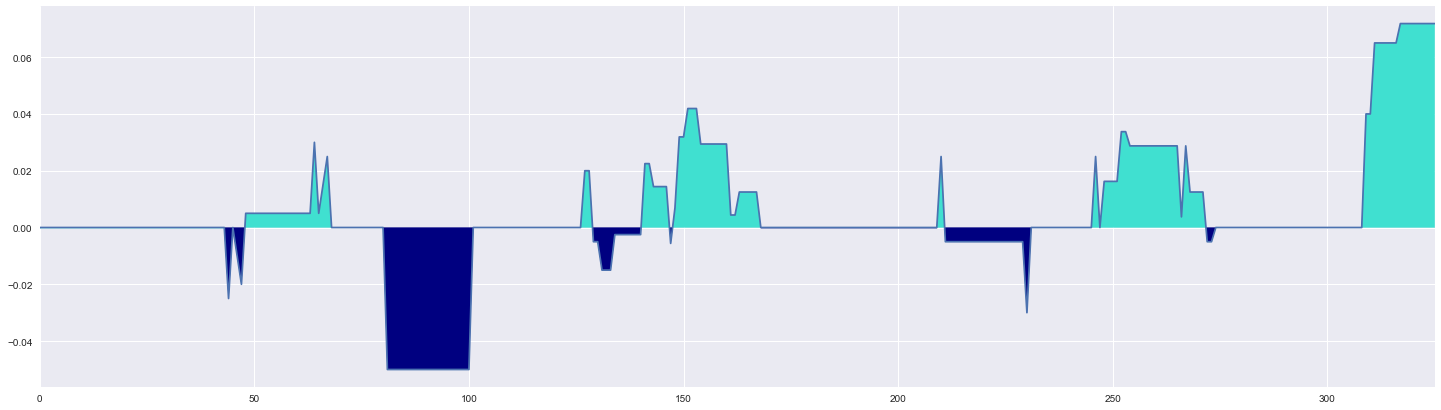

In [234]:
sentiment_runavg(Varys_Polarity_S1, runavg=20, color_pos='turquoise', color_neg='navy')

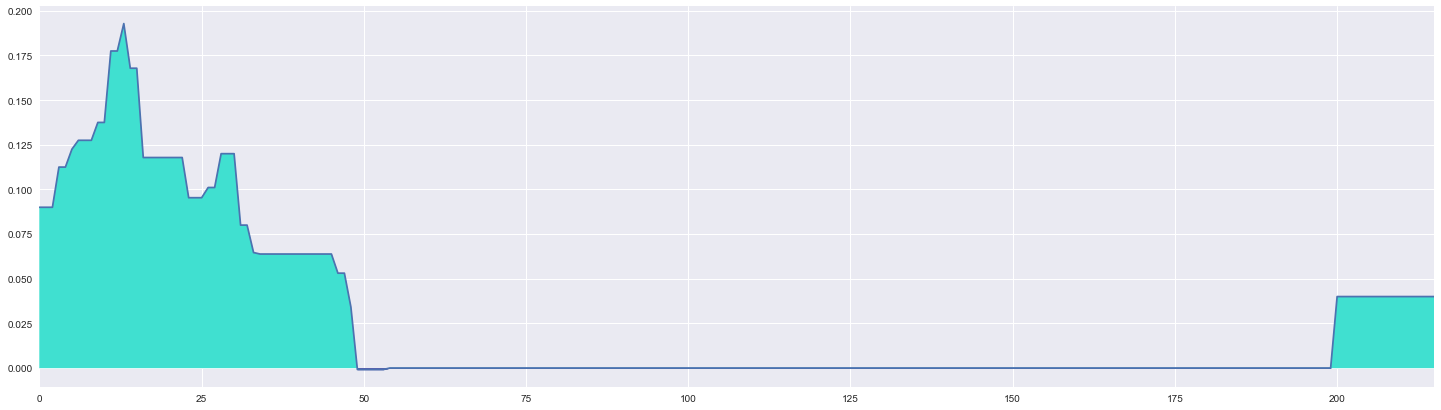

In [235]:
sentiment_runavg(Varys_Polarity_S5, runavg=20, color_pos='turquoise', color_neg='navy')

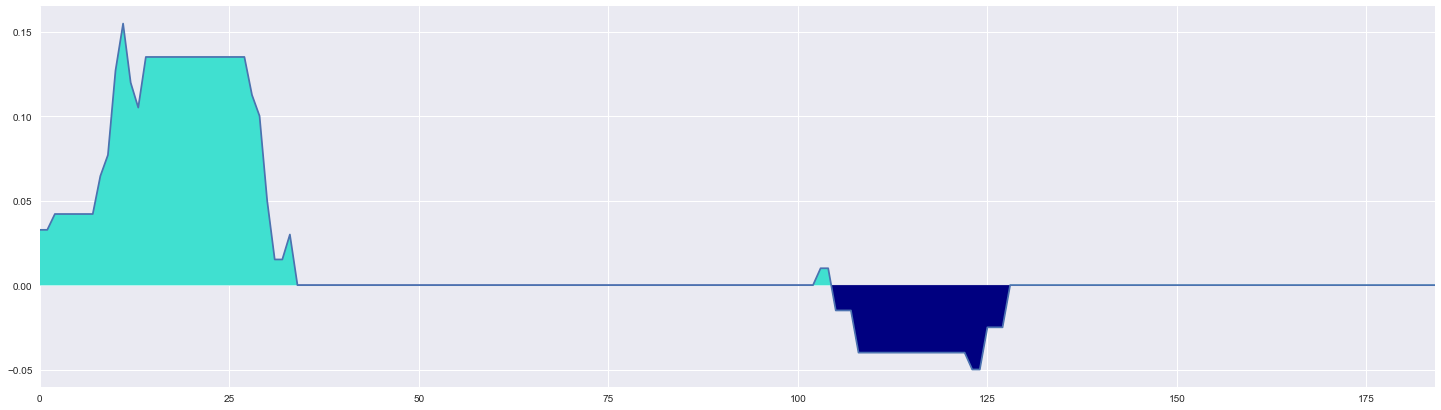

In [236]:
sentiment_runavg(Varys_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

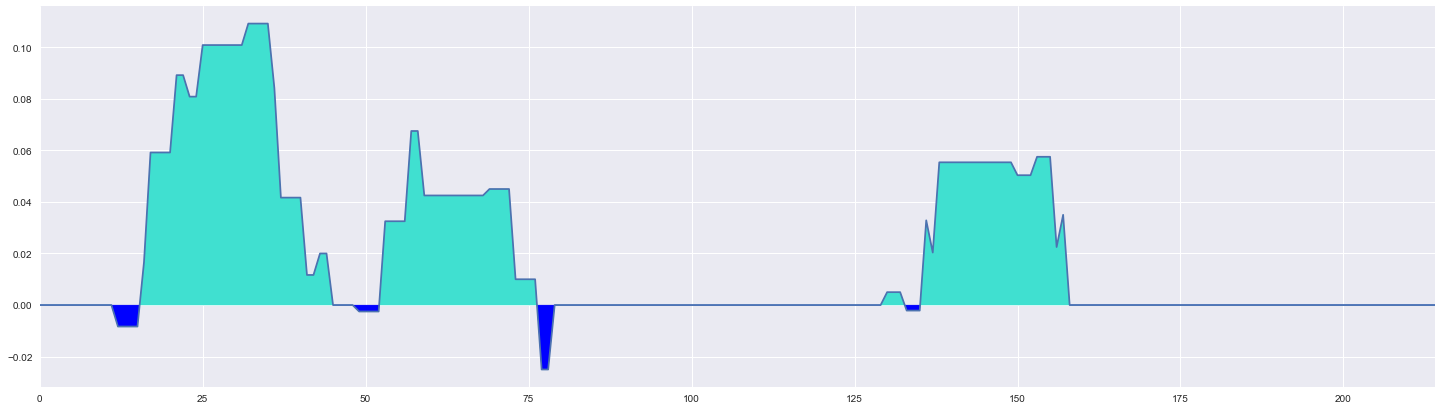

In [237]:
sentiment_runavg(Varys_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='blue')

### Yara

In [238]:
YaraS6 = season_six_sentiment.loc['Yara']

Yara_Sentiment_S6 = YaraS6.values.tolist()

In [239]:
YaraS7 = season_seven_sentiment.loc['Yara']

Yara_Sentiment_S7 = YaraS7.values.tolist()

In [240]:
Yara_Polarity_S6 = polarity(Yara_Sentiment_S6)

In [241]:
Yara_Polarity_S7 = polarity(Yara_Sentiment_S7)

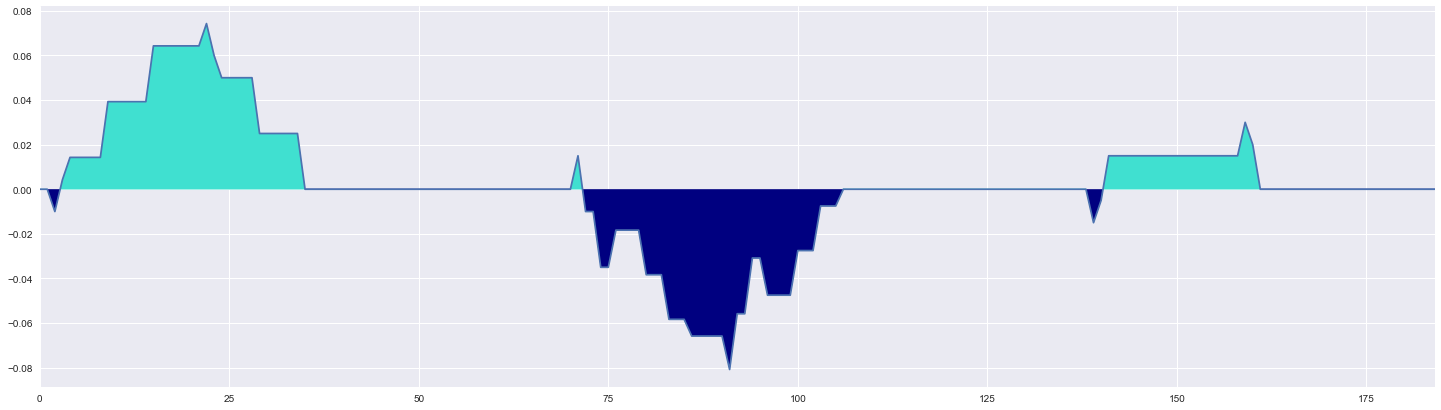

In [242]:
sentiment_runavg(Yara_Polarity_S6, runavg=20, color_pos='turquoise', color_neg='navy')

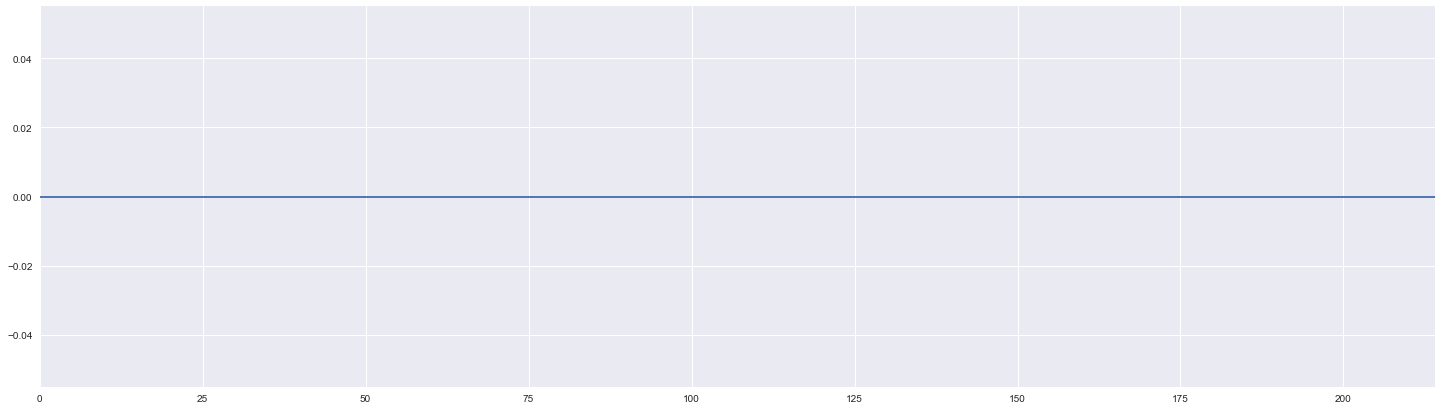

In [243]:
sentiment_runavg(Yara_Polarity_S7, runavg=20, color_pos='turquoise', color_neg='navy')

## Word2Vec by Character and by Season

In [244]:
season_one.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344
Arya Stark,arya,thats jaime lannister,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,watch,shut,think,know end use,sansa keep sewing needles,,stop,nymeria,youve got go,go,,thats true,thats happened,liar,liar,liar liar liar,lady wasnt,0,0,0,0,0,0,0,0,0,0,0,0,0,im practicing,prince,hound whatever prince tells,youre liar,go away,mine,wasnt playing,called needle,stick em pointy end,trying learn,hate,,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lm boy,arry,want,lt gift,,0,0,0,0,0,0,0,0,0,0,0,0,0
Assassin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,youre supposed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Benjen Stark,dead yet,got bigger,well youre always welcome wall,jon jon,wall isnt going anywhere,dont understand youd giving,might knew meant,feast like bear trap,course,two still missing,maybe,robb boy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,im first ranger,kind dont want believe,youre going,nights watch joke,hope weve provided good stories tell youre bac...,call like,know brother told nothing someone says word re...,youre right,enjoy capital brother,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bran Stark,true saw white walkers,lying,go,please father,saw king,hes coming right,,come,ten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,maybe,though,id rather dead,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,youre afraid,youve lived beyond wall,thats grandfather lord rickard,rickon,,many times l told,saw,0,0,0,0,0,0,0,0,0,0,0
Catelyn Stark,gods grow fast,many times told,want promise,dyou know,always look feet lie,wheres arya,grace,queen,stupidest prince ever lived,hush,hed leave home,sansa sansa,im sure grim kings landing,hear,wont let take,ill say listen fat man taking husband anywhere,stops eating time drink,sent eyrie,shes fled capital,lysas head would spike right wrong people foun...,murdered last hand,spent half life fighting roberts wars,0,0,0,0,0,0,0,0,0,0,0,would dressed grace,never knew,grateful cersei baratheon,youve said,want leave,years ago rode robert baratheon,thats men always say honor calls,talk poole,take care,hes wrong,,someone tried kill twice,dont know,dont trust raven carry words,,must,large party attracts unwanted attention,prayed seven month,0,0,0,0,0,0,0,0,0,0,0,0,nine years since ive set foot capital,would,instructed,dare bring,know coming kings landing,lord varys,know coming,know whose dagger,ned,proof,petyr promised help us find truth,wont forget,...,ls somewhere talk,lm sure give many sons,quite ill lord,lord l walder frey,lm sure reasons walder frey,ask open gates lord son bannermen may cross tr...,lf could climb battlements would see men outsi...,swore oath father,dont,lord walder granted crossing,less keep hold crossing would pursue,taking son olyvar personal squire,arya marry son waldron come age,fighting done marry one daughters,l,one consent,want cross,,lt sword l want,ta

In [245]:
season_five.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234
Aemon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anyone wish speak candidates cast tokens th lo...,anyone else,theres one else begin voting,samwell tarly,time,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alliser,men need firm hand,soldiers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cant argue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,int,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,man says saw uncle hardhome last full moon,could,,0,0,0,0,0,0,0,0,0,0,0,0,0
Announcer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,queen first contest,meereenese champion,westerosi knight,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Areo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,prince wish disturbed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,youll find soon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,hes statue,thank bringing,valar dohaeris,hello,jaqen hghar gave,please,wait,said jaqen hghar,well,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ive sweeping floor days,didnt come sweep floors,said could apprentice,want serve,one manyfaced god,taking,,moment perks,ow,told im gets hit,youre find,stands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,serve,,see,arya,best city,would captain make wager first place,captain dies thin man pays family lot money,many faced god,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,oysters clams cockels,,tomorrow,0,0,0,0,0,0,0,0,0,0,0,0,0,first person list know,cant hear,know,know,youre one,,friend,youre looks jaqen drank potion seemingly dead ...,whats happening,0,0,0,0,0,0,0


In [246]:
season_six.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203
Aeron,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,listen waves,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aeron,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,speak presence drowned god,let fish eat scales eyes,dead may never die rises harder stronger,dead may never die,stole best ships,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,aye,aye,aye,aye,aye,aye,aye,dead may never die,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,hail king joffrey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,king north,long may reign,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alliser Thorne,know youre jon snow dead nights watchman,alliser thorne,youre right,weve committed treason us jon snow lord comman...,ser davos cause fight anointed knights davos,0,fight cowards,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arthur,0,0,0,0,0,0,0,0,0,0,prince wanted us ned,wish good fortune wars come arthur,better qyburn,ones seen qyburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [247]:
season_seven.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
All,stand together,aye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arya,people ask happened tell north remembers,thats pretty song,dont want steal food,kings landing,bad,riverlands,oh couldnt,youre long way home,boy girl,,really good,im going kill queen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,hello hot pie,mmm,didnt,big lady,found,got ale,kings landing,heard cerseis queen,hmm,cersei would,would go,,youre lying,thanks pie,thanks,take care hot pie,nymeria arya,come,thats,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,lady,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,father used watch us,one time boys shooting arrows ser rodrick,looked hes standing right smiling,thats pretty handwriting,father charged treason,,would let kill betrayed family,stupid enough believe,standing crowd near baelors statue,wanted,didnt betray,training,oh dont know,guess well never know,dont know yet,youre scared arent,sometimes fear makes unfortunate things,youre looking,theyre,faces,braavos training faceless man,back braavos got first face game used play,feel jon king,ou want asking,wanted people younger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Baelish,ive heard beat hound single combat,want happy,happy,lady,lady,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sorry died,forgive,even thank,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,command suits,know cersei better anyone,meant say sansa,one two things happen,dont fight north south,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,dont know,question loyalty,youre lady winterfell,aryas like,thinks,perhaps lady brienne could help,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Benjen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ride pass,theres time,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beric,seems like good place spend night,seems deserted,think ended,girl died fathers arms,doesnt matter,aye,thank clegane,youre right,think dont ask,dont know,dont know wants,aye,believe clegane,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fighting great war,dont much look like,father,course,north didnt raise dead,wants alive,dont know,think time,life,enemy always wins,maybe dont need understand,aye thoros,lord light show us way,lord light come us darkness night dark full te...,,lord brought back,ive waiting end long time,well meet clegane,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [248]:
# Getting Character Dialogue into String Format

def text(character):
    character_text = []
    for word in character:
        if len(word)>=1:
            if word != '0':
                character_text.append(word)
    return character_text

def string(character_word):
    character_string = []
    for words in character_word:
        character_string.append(' '.join(character_word))
    return character_string     

### Arya 

In [249]:
AryaS1 = season_one.loc['Arya Stark']
AryaS1_Text = AryaS1.values.tolist()

AryaS1_Words = text(AryaS1_Text)
AryaS1_String = string(AryaS1_Words) 

In [250]:
AryaS5 = season_five.loc['Arya']
AryaS5_Text = AryaS5.values.tolist()

AryaS5_Words = text(AryaS5_Text)
AryaS5_String = string(AryaS5_Words) 

In [251]:
AryaS6 = season_six.loc['Arya']
AryaS6_Text = AryaS6.values.tolist()

AryaS6_Words = text(AryaS6_Text)
AryaS6_String = string(AryaS6_Words) 

In [252]:
AryaS7 = season_seven.loc['Arya']
AryaS7_Text = AryaS7.values.tolist()

AryaS7_Words = text(AryaS7_Text)
AryaS7_String = string(AryaS7_Words) 

In [253]:
Arya_Words_Total = AryaS1_String + AryaS5_String + AryaS6_String + AryaS7_String

### Baelish

In [254]:
BaelishS1 = season_one.loc['Petyr Baelish']
BaelishS1_Text = BaelishS1.values.tolist()

BaelishS1_Words = text(BaelishS1_Text)
BaelishS1_String = string(BaelishS1_Words) 

In [255]:
BaelishS5 = season_five.loc['Baelish']
BaelishS5_Text = BaelishS5.values.tolist()

BaelishS5_Words = text(BaelishS5_Text)
BaelishS5_String = string(BaelishS5_Words) 

In [256]:
BaelishS6 = season_six.loc['Littlefinger']
BaelishS6_Text = BaelishS6.values.tolist()

BaelishS6_Words = text(BaelishS6_Text)
BaelishS6_String = string(BaelishS6_Words) 

In [257]:
BaelishS7 = season_seven.loc['Baelish']
BaelishS7_Text = BaelishS7.values.tolist()

BaelishS7_Words = text(BaelishS7_Text)
BaelishS7_String = string(BaelishS7_Words) 

In [258]:
Baelish_Words_Total = BaelishS1_String + BaelishS5_String + BaelishS6_String + BaelishS7_String

### Brienne

In [259]:
BrienneS5 = season_five.loc['Brienne']
BrienneS5_Text = BrienneS5.values.tolist()

BrienneS5_Words = text(BrienneS5_Text)
BrienneS5_String = string(BrienneS5_Words) 

In [260]:
BrienneS6 = season_six.loc['Brienne']
BrienneS6_Text = BrienneS6.values.tolist()

BrienneS6_Words = text(BrienneS6_Text)
BrienneS6_String = string(BrienneS6_Words) 

In [261]:
BrienneS7 = season_seven.loc['Brienne']
BrienneS7_Text = BrienneS7.values.tolist()

BrienneS7_Words = text(BrienneS7_Text)
BrienneS7_String = string(BrienneS7_Words) 

In [262]:
Brienne_Words_Total = BrienneS5_String + BrienneS6_String + BrienneS7_String

### Catelyn

In [263]:
CatelynS1 = season_one.loc['Catelyn Stark']
CatelynS1_Text = CatelynS1.values.tolist()

CatelynS1_Words = text(CatelynS1_Text)
CatelynS1_String = string(CatelynS1_Words) 

In [264]:
Catelyn_Words_Total = CatelynS1_String

### Cersei

In [265]:
CerseiS1 = season_one.loc['Cersei Baratheon']
CerseiS1_Text = CerseiS1.values.tolist()

CerseiS1_Words = text(CerseiS1_Text)
CerseiS1_String = string(CerseiS1_Words) 

In [266]:
CerseiS5 = season_five.loc['Cersei']
CerseiS5_Text = CerseiS5.values.tolist()

CerseiS5_Words = text(CerseiS5_Text)
CerseiS5_String = string(CerseiS5_Words) 

In [267]:
CerseiS6 = season_six.loc['Cersei']
CerseiS6_Text = CerseiS6.values.tolist()

CerseiS6_Words = text(CerseiS6_Text)
CerseiS6_String = string(CerseiS6_Words) 

In [268]:
CerseiS7 = season_seven.loc['Cersei']
CerseiS7_Text = CerseiS7.values.tolist()

CerseiS7_Words = text(CerseiS7_Text)
CerseiS7_String = string(CerseiS7_Words) 

In [269]:
Cersei_Words_Total = CerseiS1_String + CerseiS5_String + CerseiS6_String + CerseiS7_String

### Daenerys

In [270]:
DaenerysS1 = season_one.loc['Daenerys Targaryen']
DaenerysS1_Text = DaenerysS1.values.tolist()

DaenerysS1_Words = text(DaenerysS1_Text)
DaenerysS1_String = string(DaenerysS1_Words) 

In [271]:
DaenerysS5 = season_five.loc['Daenerys']
DaenerysS5_Text = DaenerysS5.values.tolist()

DaenerysS5_Words = text(DaenerysS5_Text)
DaenerysS5_String = string(DaenerysS5_Words) 

In [272]:
DaenerysS6 = season_six.loc['Daenerys']
DaenerysS6_Text = DaenerysS6.values.tolist()

DaenerysS6_Words = text(DaenerysS6_Text)
DaenerysS6_String = string(DaenerysS6_Words) 

In [273]:
DaenerysS7 = season_seven.loc['Daenerys']
DaenerysS7_Text = DaenerysS7.values.tolist()

DaenerysS7_Words = text(DaenerysS7_Text)
DaenerysS7_String = string(DaenerysS7_Words) 

In [274]:
Daenerys_Words_Total = DaenerysS1_String + DaenerysS5_String + DaenerysS6_String + DaenerysS7_String

### Davos

In [275]:
DavosS5 = season_five.loc['Davos']
DavosS5_Text = DavosS5.values.tolist()

DavosS5_Words = text(DavosS5_Text)
DavosS5_String = string(DavosS5_Words) 

In [276]:
DavosS6 = season_six.loc['Davos']
DavosS6_Text = DavosS6.values.tolist()

DavosS6_Words = text(DavosS6_Text)
DavosS6_String = string(DavosS6_Words) 

In [277]:
DavosS7 = season_seven.loc['Davos']
DavosS7_Text = DavosS7.values.tolist()

DavosS7_Words = text(DavosS7_Text)
DavosS7_String = string(DavosS7_Words) 

In [278]:
Davos_Words_Total = DavosS5_String + DavosS6_String + DavosS7_String

### Eddard

In [279]:
EddardS1 = season_one.loc['Eddard Stark']
EddardS1_Text = EddardS1.values.tolist()

EddardS1_Words = text(EddardS1_Text)
EddardS1_String = string(EddardS1_Words) 

In [280]:
Eddard_Words_Total = EddardS1_String

### Gilly

In [281]:
GillyS5 = season_five.loc['Gilly']
GillyS5_Text = GillyS5.values.tolist()

GillyS5_Words = text(GillyS5_Text)
GillyS5_String = string(GillyS5_Words) 

In [282]:
GillyS6 = season_six.loc['Gilly']
GillyS6_Text = GillyS6.values.tolist()

GillyS6_Words = text(GillyS6_Text)
GillyS6_String = string(GillyS6_Words) 

In [283]:
GillyS7 = season_seven.loc['Gilly']
GillyS7_Text = GillyS7.values.tolist()

GillyS7_Words = text(GillyS7_Text)
GillyS7_String = string(GillyS7_Words) 

In [284]:
Gilly_Words_Total = GillyS5_String + GillyS6_String + GillyS7_String

### Jaime

In [285]:
JaimeS1 = season_one.loc['Jaime Lannister']
JaimeS1_Text = JaimeS1.values.tolist()

JaimeS1_Words = text(JaimeS1_Text)
JaimeS1_String = string(JaimeS1_Words) 

In [286]:
JaimeS5 = season_five.loc['Jaime']
JaimeS5_Text = JaimeS5.values.tolist()

JaimeS5_Words = text(JaimeS5_Text)
JaimeS5_String = string(JaimeS5_Words) 

In [287]:
JaimeS6 = season_six.loc['Jaime']
JaimeS6_Text = JaimeS6.values.tolist()

JaimeS6_Words = text(JaimeS6_Text)
JaimeS6_String = string(JaimeS6_Words) 

In [288]:
JaimeS7 = season_seven.loc['Jaime']
JaimeS7_Text = JaimeS7.values.tolist()

JaimeS7_Words = text(JaimeS7_Text)
JaimeS7_String = string(JaimeS7_Words) 

In [289]:
Jaime_Words_Total = JaimeS1_String + JaimeS5_String + JaimeS6_String + JaimeS7_String

### Joffrey

In [290]:
JoffreyS1 = season_one.loc['Joffrey Baratheon']
JoffreyS1_Text = JoffreyS1.values.tolist()

JoffreyS1_Words = text(JoffreyS1_Text)
JoffreyS1_String = string(JoffreyS1_Words) 

In [291]:
Joffrey_Words_Total = JoffreyS1_String

### Jorah

In [292]:
JorahS1 = season_one.loc['Jorah Mormont']
JorahS1_Text = JorahS1.values.tolist()

JorahS1_Words = text(JorahS1_Text)
JorahS1_String = string(JorahS1_Words) 

In [293]:
JorahS5 = season_five.loc['Jorah']
JorahS5_Text = JorahS5.values.tolist()

JorahS5_Words = text(JorahS5_Text)
JorahS5_String = string(JorahS5_Words) 

In [294]:
JorahS6 = season_six.loc['Jorah']
JorahS6_Text = JorahS6.values.tolist()

JorahS6_Words = text(JorahS6_Text)
JorahS6_String = string(JorahS6_Words) 

In [295]:
JorahS7 = season_seven.loc['Jorah']
JorahS7_Text = JorahS7.values.tolist()

JorahS7_Words = text(JorahS7_Text)
JorahS7_String = string(JorahS7_Words) 

In [296]:
Jorah_Words_Total = JorahS1_String + JorahS5_String + JorahS6_String + JorahS7_String

### Jon

In [297]:
JonS1 = season_one.loc['Jon Snow']
JonS1_Text = JonS1.values.tolist()

JonS1_Words = text(JonS1_Text)
JonS1_String = string(JonS1_Words) 

In [298]:
JonS5 = season_five.loc['Jon']
JonS5_Text = JonS5.values.tolist()

JonS5_Words = text(JonS5_Text)
JonS5_String = string(JonS5_Words) 

In [299]:
JonS6 = season_six.loc['Jon Snow']
JonS6_Text = JonS6.values.tolist()

JonS6_Words = text(JonS6_Text)
JonS6_String = string(JonS6_Words) 

In [300]:
JonS7 = season_seven.loc['Jon']
JonS7_Text = JonS7.values.tolist()

JonS7_Words = text(JonS7_Text)
JonS7_String = string(JonS7_Words) 

In [301]:
Jon_Words_Total = JonS1_String + JonS5_String + JonS6_String + JonS7_String

### Margaery

In [302]:
MargaeryS5 = season_five.loc['Margaery']
MargaeryS5_Text = MargaeryS5.values.tolist()

MargaeryS5_Words = text(MargaeryS5_Text)
MargaeryS5_String = string(MargaeryS5_Words) 

In [303]:
MargaeryS6 = season_six.loc['Margaery']
MargaeryS6_Text = MargaeryS6.values.tolist()

MargaeryS6_Words = text(MargaeryS6_Text)
MargaeryS6_String = string(MargaeryS6_Words) 

In [304]:
Margaery_Words_Total = MargaeryS5_String + MargaeryS6_String 

### Melisandre

In [305]:
MelisandreS5 = season_five.loc['Melisandre']
MelisandreS5_Text = MelisandreS5.values.tolist()

MelisandreS5_Words = text(MelisandreS5_Text)
MelisandreS5_String = string(MelisandreS5_Words) 

In [306]:
MelisandreS6 = season_six.loc['Melisandre']
MelisandreS6_Text = MelisandreS6.values.tolist()

MelisandreS6_Words = text(MelisandreS6_Text)
MelisandreS6_String = string(MelisandreS6_Words) 

In [307]:
MelisandreS7 = season_seven.loc['Melisandre']
MelisandreS7_Text = MelisandreS7.values.tolist()

MelisandreS7_Words = text(MelisandreS7_Text)
MelisandreS7_String = string(MelisandreS7_Words) 

In [308]:
Melisandre_Words_Total = MelisandreS5_String + MelisandreS6_String + MelisandreS7_String

### Missandei

In [309]:
MissandeiS5 = season_five.loc['Missandei']
MissandeiS5_Text = MissandeiS5.values.tolist()

MissandeiS5_Words = text(MissandeiS5_Text)
MissandeiS5_String = string(MissandeiS5_Words) 

In [310]:
MissandeiS6 = season_six.loc['Missandei']
MissandeiS6_Text = MissandeiS6.values.tolist()

MissandeiS6_Words = text(MissandeiS6_Text)
MissandeiS6_String = string(MissandeiS6_Words) 

In [311]:
MissandeiS7 = season_seven.loc['Missandei']
MissandeiS7_Text = MissandeiS7.values.tolist()

MissandeiS7_Words = text(MissandeiS7_Text)
MissandeiS7_String = string(MissandeiS7_Words) 

In [312]:
Missandei_Words_Total = MissandeiS5_String + MissandeiS6_String + MissandeiS7_String

### Olenna

In [313]:
OlennaS5 = season_five.loc['Olenna']
OlennaS5_Text = OlennaS5.values.tolist()

OlennaS5_Words = text(OlennaS5_Text)
OlennaS5_String = string(OlennaS5_Words) 

In [314]:
OlennaS6 = season_six.loc['Olenna']
OlennaS6_Text = OlennaS6.values.tolist()

OlennaS6_Words = text(OlennaS6_Text)
OlennaS6_String = string(OlennaS6_Words) 

In [315]:
OlennaS7 = season_seven.loc['Olenna']
OlennaS7_Text = OlennaS7.values.tolist()

OlennaS7_Words = text(OlennaS7_Text)
OlennaS7_String = string(OlennaS7_Words) 

In [316]:
Olenna_Words_Total = OlennaS5_String + OlennaS6_String + OlennaS7_String

### Ramsay

In [317]:
RamsayS5 = season_five.loc['Ramsay']
RamsayS5_Text = RamsayS5.values.tolist()

RamsayS5_Words = text(RamsayS5_Text)
RamsayS5_String = string(RamsayS5_Words) 

In [318]:
RamsayS6 = season_six.loc['Ramsay']
RamsayS6_Text = RamsayS6.values.tolist()

RamsayS6_Words = text(RamsayS6_Text)
RamsayS6_String = string(RamsayS6_Words) 

In [319]:
Ramsay_Words_Total = RamsayS5_String + RamsayS6_String 

### Robb

In [320]:
RobbS1 = season_one.loc['Robb Stark']
RobbS1_Text = RobbS1.values.tolist()

RobbS1_Words = text(RobbS1_Text)
RobbS1_String = string(RobbS1_Words) 

In [321]:
Robb_Words_Total = RobbS1_String

### Sam

In [322]:
SamS1 = season_one.loc['Samwell Tarly']
SamS1_Text = SamS1.values.tolist()

SamS1_Words = text(SamS1_Text)
SamS1_String = string(SamS1_Words) 

In [323]:
SamS5 = season_five.loc['Sam']
SamS5_Text = SamS5.values.tolist()

SamS5_Words = text(SamS5_Text)
SamS5_String = string(SamS5_Words) 

In [324]:
SamS6 = season_six.loc['Sam']
SamS6_Text = SamS6.values.tolist()

SamS6_Words = text(SamS6_Text)
SamS6_String = string(SamS6_Words) 

In [325]:
SamS7 = season_seven.loc['Sam']
SamS7_Text = SamS7.values.tolist()

SamS7_Words = text(SamS7_Text)
SamS7_String = string(SamS7_Words) 

In [326]:
Sam_Words_Total = SamS1_String + SamS5_String + SamS6_String + SamS7_String

### Sansa

In [327]:
SansaS1 = season_one.loc['Sansa Stark']
SansaS1_Text = SansaS1.values.tolist()

SansaS1_Words = text(SansaS1_Text)
SansaS1_String = string(SansaS1_Words) 

In [328]:
SansaS5 = season_five.loc['Sansa']
SansaS5_Text = SansaS5.values.tolist()

SansaS5_Words = text(SansaS5_Text)
SansaS5_String = string(SansaS5_Words) 

In [329]:
SansaS6 = season_six.loc['Sansa']
SansaS6_Text = SansaS6.values.tolist()

SansaS6_Words = text(SansaS6_Text)
SansaS6_String = string(SansaS6_Words) 

In [330]:
SansaS7 = season_seven.loc['Sansa']
SansaS7_Text = SansaS7.values.tolist()

SansaS7_Words = text(SansaS7_Text)
SansaS7_String = string(SansaS7_Words) 

In [331]:
Sansa_Words_Total = SansaS1_String + SansaS5_String + SansaS6_String + SansaS7_String

### Shireen

In [332]:
ShireenS5 = season_five.loc['Shireen']
ShireenS5_Text = ShireenS5.values.tolist()

ShireenS5_Words = text(ShireenS5_Text)
ShireenS5_String = string(ShireenS5_Words) 

In [333]:
Shireen_Words_Total = ShireenS5_String

### Stannis 

In [334]:
StannisS5 = season_five.loc['Stannis']
StannisS5_Text = StannisS5.values.tolist()

StannisS5_Words = text(StannisS5_Text)
StannisS5_String = string(StannisS5_Words) 

In [335]:
Stannis_Words_Total = StannisS5_String

### Theon

In [336]:
TheonS1 = season_one.loc['Theon Greyjoy']
TheonS1_Text = TheonS1.values.tolist()

TheonS1_Words = text(TheonS1_Text)
TheonS1_String = string(TheonS1_Words) 

In [337]:
TheonS5 = season_five.loc['Theon']
TheonS5_Text = TheonS5.values.tolist()

TheonS5_Words = text(TheonS5_Text)
TheonS5_String = string(TheonS5_Words) 

In [338]:
TheonS6 = season_six.loc['Theon']
TheonS6_Text = TheonS6.values.tolist()

TheonS6_Words = text(TheonS6_Text)
TheonS6_String = string(TheonS6_Words) 

In [339]:
TheonS7 = season_seven.loc['Theon']
TheonS7_Text = TheonS7.values.tolist()

TheonS7_Words = text(TheonS7_Text)
TheonS7_String = string(TheonS7_Words) 

In [340]:
Theon_Words_Total = TheonS1_String + TheonS5_String + TheonS6_String + TheonS7_String

### Tyrion

In [341]:
TyrionS1 = season_one.loc['Tyrion Lannister']
TyrionS1_Text = TyrionS1.values.tolist()

TyrionS1_Words = text(TyrionS1_Text)
TyrionS1_String = string(TyrionS1_Words) 

In [342]:
TyrionS5 = season_five.loc['Tyrion']
TyrionS5_Text = TyrionS5.values.tolist()

TyrionS5_Words = text(TyrionS5_Text)
TyrionS5_String = string(TyrionS5_Words) 

In [343]:
TyrionS6 = season_six.loc['Tyrion']
TyrionS6_Text = TyrionS6.values.tolist()

TyrionS6_Words = text(TyrionS6_Text)
TyrionS6_String = string(TyrionS6_Words) 

In [344]:
TyrionS7 = season_seven.loc['Tyrion']
TyrionS7_Text = TyrionS7.values.tolist()

TyrionS7_Words = text(TyrionS7_Text)
TyrionS7_String = string(TyrionS7_Words) 

In [345]:
Tyrion_Words_Total = TyrionS1_String + TyrionS5_String + TyrionS6_String + TyrionS7_String

### Tywin

In [346]:
TywinS1 = season_one.loc['Tywin Lannister']
TywinS1_Text = TywinS1.values.tolist()

TywinS1_Words = text(TywinS1_Text)
TywinS1_String = string(TywinS1_Words) 

In [347]:
Tywin_Words_Total = TywinS1_String

### Varys

In [348]:
VarysS1 = season_one.loc['Varys']
VarysS1_Text = VarysS1.values.tolist()

VarysS1_Words = text(VarysS1_Text)
VarysS1_String = string(VarysS1_Words) 

In [349]:
VarysS5 = season_five.loc['Varys']
VarysS5_Text = VarysS5.values.tolist()

VarysS5_Words = text(VarysS5_Text)
VarysS5_String = string(VarysS5_Words) 

In [350]:
VarysS6 = season_six.loc['Varys']
VarysS6_Text = VarysS6.values.tolist()

VarysS6_Words = text(VarysS6_Text)
VarysS6_String = string(VarysS6_Words) 

In [351]:
VarysS7 = season_seven.loc['Varys']
VarysS7_Text = VarysS7.values.tolist()

VarysS7_Words = text(VarysS7_Text)
VarysS7_String = string(VarysS7_Words) 

In [352]:
Varys_Words_Total = VarysS1_String + VarysS5_String + VarysS6_String + VarysS7_String

### Yara

In [353]:
YaraS6 = season_six.loc['Yara']
YaraS6_Text = YaraS6.values.tolist()

YaraS6_Words = text(YaraS6_Text)
YaraS6_String = string(YaraS6_Words) 

In [354]:
YaraS7 = season_seven.loc['Yara']
YaraS7_Text = YaraS7.values.tolist()

YaraS7_Words = text(YaraS7_Text)
YaraS7_String = string(YaraS7_Words) 

In [355]:
Yara_Words_Total = YaraS6_String + YaraS7_String